## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,0.85,12.233545,19.097736,243,2961.898193
1,5.808,2.496,-0.073,0.392,-0.139,2.674,1.00,14.964220,17.704655,248,2218.239746
2,5.796,2.546,0.030,0.501,-0.030,2.734,1.00,15.329449,17.559893,240,2220.297119
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.97,15.392742,20.676994,244,3033.770752
4,6.059,2.643,0.122,0.647,-0.386,2.809,1.00,17.944009,21.851387,243,3003.818848


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.981961,1.863184,-0.327942,-0.063369,-1.015971,2.086126,0.808738,13.045021,17.907784,240.572816,3008.938899
std,1.264300,1.198731,0.866380,0.795365,0.799205,1.067542,0.276653,6.609366,7.523377,9.358442,876.023529
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,0.090000,1.293138,2.733019,194.000000,815.342712
25%,4.677000,1.584500,-0.554000,-0.386500,-1.609000,1.758000,0.745000,8.206727,11.615798,236.500000,2464.687256
50%,5.342000,2.294000,-0.051000,0.182000,-0.844000,2.442000,0.960000,13.072916,18.269344,243.000000,2994.793701
75%,5.875000,2.663000,0.207000,0.495000,-0.364000,2.809000,1.000000,17.432255,22.751595,247.000000,3464.970947
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.000000,28.916548,36.355442,253.000000,6230.940918


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_Gs_cub_m"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  \

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,0.85,12.233545,19.097736,243,2961.898193
1,1.00,14.964220,17.704655,248,2218.239746
2,1.00,15.329449,17.559893,240,2220.297119
3,0.97,15.392742,20.676994,244,3033.770752
4,1.00,17.944009,21.851387,243,3003.818848


In [11]:
# Columns in "y" data collections
y.head()

,ln_Gs_cub_m
0,4.771
1,5.808
2,5.796
3,5.826
4,6.059


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8552709903539062, 0.9261955254521471, 0.9288133117445216]
    Mean: 0.903
    Std: 0.034

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.35592755 0.33057486 0.41148015]
    Mean: 0.366
    Std: 0.034

 --------------------
Mean absolute error (MAE): 

    Scores: [0.25830358077457966, 0.2752223789551679, 0.35402946494607357]
    Mean: 0.296
    Std: 0.042

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.9130074454039081                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.24554592996534758                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.27944380367938704                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 148          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7641657082879392                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.9130074454039081
Gamma: 0.24554592996534758
Learning_rate: 0.27944380367938704
Max_depth: 2
N_estimators: 148
Subsample: 0.7641657082879392


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:3.36269	validation_1-rmse:3.65215
[1]	validation_0-rmse:2.49303	validation_1-rmse:2.72951
[2]	validation_0-rmse:1.83691	validation_1-rmse:2.06140
[3]	validation_0-rmse:1.36043	validation_1-rmse:1.54341
[4]	validation_0-rmse:1.02745	validation_1-rmse:1.18160
[5]	validation_0-rmse:0.77864	validation_1-rmse:0.93115
[6]	validation_0-rmse:0.60310	validation_1-rmse:0.72953
[7]	validation_0-rmse:0.47566	validation_1-rmse:0.59218
[8]	validation_0-rmse:0.39003	validation_1-rmse:0.50098
[9]	validation_0-rmse:0.33512	validation_1-rmse:0.44207


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.30310	validation_1-rmse:0.40863
[11]	validation_0-rmse:0.27593	validation_1-rmse:0.39435
[12]	validation_0-rmse:0.26540	validation_1-rmse:0.39076
[13]	validation_0-rmse:0.25567	validation_1-rmse:0.38259
[14]	validation_0-rmse:0.25089	validation_1-rmse:0.37376
[15]	validation_0-rmse:0.24879	validation_1-rmse:0.37213
[16]	validation_0-rmse:0.23899	validation_1-rmse:0.37604
[17]	validation_0-rmse:0.23883	validation_1-rmse:0.37597
[18]	validation_0-rmse:0.23869	validation_1-rmse:0.37590
[19]	validation_0-rmse:0.23862	validation_1-rmse:0.37590
[20]	validation_0-rmse:0.23502	validation_1-rmse:0.37583
[21]	validation_0-rmse:0.22983	validation_1-rmse:0.37224
[22]	validation_0-rmse:0.22996	validation_1-rmse:0.37206
[23]	validation_0-rmse:0.23017	validation_1-rmse:0.37201
[24]	validation_0-rmse:0.22760	validation_1-rmse:0.36787
[25]	validation_0-rmse:0.22746	validation_1-rmse:0.36786
[26]	validation_0-rmse:0.22287	validation_1-rmse:0.37230
[27]	validation_0-rmse:0.22290	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.44367	validation_1-rmse:3.19797
[1]	validation_0-rmse:2.52321	validation_1-rmse:2.27660
[2]	validation_0-rmse:1.85541	validation_1-rmse:1.62455
[3]	validation_0-rmse:1.36812	validation_1-rmse:1.16372
[4]	validation_0-rmse:1.02581	validation_1-rmse:0.84021
[5]	validation_0-rmse:0.77179	validation_1-rmse:0.64022
[6]	validation_0-rmse:0.59395	validation_1-rmse:0.50916
[7]	validation_0-rmse:0.47241	validation_1-rmse:0.43430
[8]	validation_0-rmse:0.38670	validation_1-rmse:0.38742
[9]	validation_0-rmse:0.33067	validation_1-rmse:0.37638
[10]	validation_0-rmse:0.29212	validation_1-rmse:0.38171
[11]	validation_0-rmse:0.26681	validation_1-rmse:0.38222
[12]	validation_0-rmse:0.25336	validation_1-rmse:0.37516
[13]	validation_0-rmse:0.24309	validation_1-rmse:0.37473
[14]	validation_0-rmse:0.23638	validation_1-rmse:0.37327
[15]	validation_0-rmse:0.22840	validation_1-rmse:0.37521
[16]	validation_0-rmse:0.22756	validation_1-rmse:0.37712
[17]	validation_0-rmse:0.22746	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.46714	validation_1-rmse:3.11009
[1]	validation_0-rmse:2.55036	validation_1-rmse:2.32699
[2]	validation_0-rmse:1.88440	validation_1-rmse:1.74227
[3]	validation_0-rmse:1.39150	validation_1-rmse:1.29030
[4]	validation_0-rmse:1.03621	validation_1-rmse:0.98139
[5]	validation_0-rmse:0.78357	validation_1-rmse:0.77153
[6]	validation_0-rmse:0.60538	validation_1-rmse:0.65359
[7]	validation_0-rmse:0.47466	validation_1-rmse:0.56824
[8]	validation_0-rmse:0.38228	validation_1-rmse:0.50609
[9]	validation_0-rmse:0.31767	validation_1-rmse:0.46549
[10]	validation_0-rmse:0.27987	validation_1-rmse:0.44129
[11]	validation_0-rmse:0.25941	validation_1-rmse:0.43584
[12]	validation_0-rmse:0.23923	validation_1-rmse:0.42166
[13]	validation_0-rmse:0.23394	validation_1-rmse:0.41857
[14]	validation_0-rmse:0.22686	validation_1-rmse:0.41693
[15]	validation_0-rmse:0.22483	validation_1-rmse:0.41555
[16]	validation_0-rmse:0.21628	validation_1-rmse:0.41630
[17]	validation_0-rmse:0.21254	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.42531	validation_1-rmse:3.27261
[1]	validation_0-rmse:2.51929	validation_1-rmse:2.41214
[2]	validation_0-rmse:1.86400	validation_1-rmse:1.77151
[3]	validation_0-rmse:1.38692	validation_1-rmse:1.31702
[4]	validation_0-rmse:1.03495	validation_1-rmse:0.98267
[5]	validation_0-rmse:0.78511	validation_1-rmse:0.76337
[6]	validation_0-rmse:0.59169	validation_1-rmse:0.61210
[7]	validation_0-rmse:0.45828	validation_1-rmse:0.50646
[8]	validation_0-rmse:0.36962	validation_1-rmse:0.45211
[9]	validation_0-rmse:0.30741	validation_1-rmse:0.42228
[10]	validation_0-rmse:0.26654	validation_1-rmse:0.41284
[11]	validation_0-rmse:0.24481	validation_1-rmse:0.41095
[12]	validation_0-rmse:0.23102	validation_1-rmse:0.40669
[13]	validation_0-rmse:0.22174	validation_1-rmse:0.39856
[14]	validation_0-rmse:0.21544	validation_1-rmse:0.39486
[15]	validation_0-rmse:0.21288	validation_1-rmse:0.39728
[16]	validation_0-rmse:0.21123	validation_1-rmse:0.39972
[17]	validation_0-rmse:0.20388	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.43754	validation_1-rmse:3.30101
[1]	validation_0-rmse:2.52582	validation_1-rmse:2.46364
[2]	validation_0-rmse:1.87281	validation_1-rmse:1.80771
[3]	validation_0-rmse:1.39164	validation_1-rmse:1.33989
[4]	validation_0-rmse:1.03060	validation_1-rmse:0.98855
[5]	validation_0-rmse:0.80315	validation_1-rmse:0.75904
[6]	validation_0-rmse:0.60685	validation_1-rmse:0.56443
[7]	validation_0-rmse:0.48250	validation_1-rmse:0.46418
[8]	validation_0-rmse:0.39375	validation_1-rmse:0.39616
[9]	validation_0-rmse:0.32632	validation_1-rmse:0.33890
[10]	validation_0-rmse:0.28605	validation_1-rmse:0.31869
[11]	validation_0-rmse:0.26645	validation_1-rmse:0.30700
[12]	validation_0-rmse:0.25228	validation_1-rmse:0.29283
[13]	validation_0-rmse:0.24345	validation_1-rmse:0.29275
[14]	validation_0-rmse:0.23566	validation_1-rmse:0.29346
[15]	validation_0-rmse:0.23442	validation_1-rmse:0.29126
[16]	validation_0-rmse:0.23242	validation_1-rmse:0.28688
[17]	validation_0-rmse:0.23254	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.38740	validation_1-rmse:3.44448
[1]	validation_0-rmse:2.50322	validation_1-rmse:2.55427
[2]	validation_0-rmse:1.84083	validation_1-rmse:1.84336
[3]	validation_0-rmse:1.35346	validation_1-rmse:1.34261
[4]	validation_0-rmse:1.00869	validation_1-rmse:1.00550
[5]	validation_0-rmse:0.76895	validation_1-rmse:0.77311
[6]	validation_0-rmse:0.59713	validation_1-rmse:0.60398
[7]	validation_0-rmse:0.47425	validation_1-rmse:0.50297
[8]	validation_0-rmse:0.38552	validation_1-rmse:0.42223
[9]	validation_0-rmse:0.33570	validation_1-rmse:0.38031
[10]	validation_0-rmse:0.29588	validation_1-rmse:0.35169
[11]	validation_0-rmse:0.26519	validation_1-rmse:0.34186
[12]	validation_0-rmse:0.24977	validation_1-rmse:0.32798
[13]	validation_0-rmse:0.23910	validation_1-rmse:0.32404
[14]	validation_0-rmse:0.23618	validation_1-rmse:0.32048
[15]	validation_0-rmse:0.23224	validation_1-rmse:0.31677
[16]	validation_0-rmse:0.22461	validation_1-rmse:0.31774
[17]	validation_0-rmse:0.22118	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.39599	validation_1-rmse:1.24639
[4]	validation_0-rmse:1.03685	validation_1-rmse:0.91908
[5]	validation_0-rmse:0.77971	validation_1-rmse:0.69453
[6]	validation_0-rmse:0.59311	validation_1-rmse:0.56363
[7]	validation_0-rmse:0.46526	validation_1-rmse:0.47912
[8]	validation_0-rmse:0.37776	validation_1-rmse:0.42451
[9]	validation_0-rmse:0.32040	validation_1-rmse:0.39399
[10]	validation_0-rmse:0.28333	validation_1-rmse:0.38070
[11]	validation_0-rmse:0.25570	validation_1-rmse:0.37811
[12]	validation_0-rmse:0.23997	validation_1-rmse:0.37474
[13]	validation_0-rmse:0.23179	validation_1-rmse:0.37300
[14]	validation_0-rmse:0.22858	validation_1-rmse:0.37142
[15]	validation_0-rmse:0.22538	validation_1-rmse:0.36887
[16]	validation_0-rmse:0.22397	validation_1-rmse:0.36839
[17]	validation_0-rmse:0.22397	validation_1-rmse:0.36839
[18]	validation_0-rmse:0.22093	validation_1-rmse:0.36707
[19]	validation_0-rmse:0.22095	validation_1-rmse:0.36706
[20]	validation_0-rmse:0.22096	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.04945	validation_1-rmse:0.93318
[5]	validation_0-rmse:0.79119	validation_1-rmse:0.71539
[6]	validation_0-rmse:0.61417	validation_1-rmse:0.56628
[7]	validation_0-rmse:0.48751	validation_1-rmse:0.46559
[8]	validation_0-rmse:0.39652	validation_1-rmse:0.39988
[9]	validation_0-rmse:0.33184	validation_1-rmse:0.36342
[10]	validation_0-rmse:0.28702	validation_1-rmse:0.35119
[11]	validation_0-rmse:0.26283	validation_1-rmse:0.34105
[12]	validation_0-rmse:0.24757	validation_1-rmse:0.33577
[13]	validation_0-rmse:0.23691	validation_1-rmse:0.33306
[14]	validation_0-rmse:0.22884	validation_1-rmse:0.33011
[15]	validation_0-rmse:0.22005	validation_1-rmse:0.34094
[16]	validation_0-rmse:0.21174	validation_1-rmse:0.33552
[17]	validation_0-rmse:0.21066	validation_1-rmse:0.33555
[18]	validation_0-rmse:0.21039	validation_1-rmse:0.33574
[19]	validation_0-rmse:0.21030	validation_1-rmse:0.33605
[20]	validation_0-rmse:0.21031	validation_1-rmse:0.33615
[21]	validation_0-rmse:0.21041	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.45828	validation_1-rmse:2.72267
[2]	validation_0-rmse:1.81589	validation_1-rmse:2.08793
[3]	validation_0-rmse:1.34761	validation_1-rmse:1.58789
[4]	validation_0-rmse:1.01103	validation_1-rmse:1.24353
[5]	validation_0-rmse:0.77585	validation_1-rmse:1.00151
[6]	validation_0-rmse:0.60395	validation_1-rmse:0.81062
[7]	validation_0-rmse:0.48032	validation_1-rmse:0.68100
[8]	validation_0-rmse:0.39490	validation_1-rmse:0.58168
[9]	validation_0-rmse:0.33809	validation_1-rmse:0.51636
[10]	validation_0-rmse:0.29954	validation_1-rmse:0.47650
[11]	validation_0-rmse:0.27321	validation_1-rmse:0.45417
[12]	validation_0-rmse:0.25663	validation_1-rmse:0.42990
[13]	validation_0-rmse:0.24417	validation_1-rmse:0.41031
[14]	validation_0-rmse:0.24234	validation_1-rmse:0.40716
[15]	validation_0-rmse:0.23262	validation_1-rmse:0.38856
[16]	validation_0-rmse:0.23154	validation_1-rmse:0.38605
[17]	validation_0-rmse:0.23046	validation_1-rmse:0.38288
[18]	validation_0-rmse:0.23105	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.47842	validation_1-rmse:2.62436
[2]	validation_0-rmse:1.83247	validation_1-rmse:1.93774
[3]	validation_0-rmse:1.36440	validation_1-rmse:1.41618
[4]	validation_0-rmse:1.02018	validation_1-rmse:1.02974
[5]	validation_0-rmse:0.77900	validation_1-rmse:0.75844
[6]	validation_0-rmse:0.59612	validation_1-rmse:0.55836
[7]	validation_0-rmse:0.46459	validation_1-rmse:0.42378
[8]	validation_0-rmse:0.37849	validation_1-rmse:0.34923
[9]	validation_0-rmse:0.32100	validation_1-rmse:0.31155
[10]	validation_0-rmse:0.28280	validation_1-rmse:0.28721
[11]	validation_0-rmse:0.26513	validation_1-rmse:0.28222
[12]	validation_0-rmse:0.25029	validation_1-rmse:0.28503
[13]	validation_0-rmse:0.24325	validation_1-rmse:0.28772
[14]	validation_0-rmse:0.24045	validation_1-rmse:0.29044
[15]	validation_0-rmse:0.23876	validation_1-rmse:0.29369
[16]	validation_0-rmse:0.23383	validation_1-rmse:0.30261
[17]	validation_0-rmse:0.22808	validation_1-rmse:0.30365
[18]	validation_0-rmse:0.22585	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37578	validation_1-rmse:1.48698
[4]	validation_0-rmse:1.02766	validation_1-rmse:1.12114
[5]	validation_0-rmse:0.78441	validation_1-rmse:0.87625
[6]	validation_0-rmse:0.60077	validation_1-rmse:0.69221
[7]	validation_0-rmse:0.47405	validation_1-rmse:0.57747
[8]	validation_0-rmse:0.37907	validation_1-rmse:0.48606
[9]	validation_0-rmse:0.32326	validation_1-rmse:0.44083
[10]	validation_0-rmse:0.28086	validation_1-rmse:0.40385
[11]	validation_0-rmse:0.25648	validation_1-rmse:0.38721
[12]	validation_0-rmse:0.24331	validation_1-rmse:0.37322
[13]	validation_0-rmse:0.23181	validation_1-rmse:0.36552
[14]	validation_0-rmse:0.21984	validation_1-rmse:0.37265
[15]	validation_0-rmse:0.21569	validation_1-rmse:0.37617
[16]	validation_0-rmse:0.21265	validation_1-rmse:0.36838
[17]	validation_0-rmse:0.21259	validation_1-rmse:0.36808
[18]	validation_0-rmse:0.21237	validation_1-rmse:0.36684
[19]	validation_0-rmse:0.21237	validation_1-rmse:0.36685
[20]	validation_0-rmse:0.20657	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.44033	validation_1-rmse:3.26432
[1]	validation_0-rmse:2.53837	validation_1-rmse:2.44671
[2]	validation_0-rmse:1.88421	validation_1-rmse:1.84159
[3]	validation_0-rmse:1.38437	validation_1-rmse:1.35130
[4]	validation_0-rmse:1.03543	validation_1-rmse:1.00936
[5]	validation_0-rmse:0.78552	validation_1-rmse:0.78868
[6]	validation_0-rmse:0.59968	validation_1-rmse:0.62093
[7]	validation_0-rmse:0.47215	validation_1-rmse:0.51842
[8]	validation_0-rmse:0.38507	validation_1-rmse:0.46113
[9]	validation_0-rmse:0.32338	validation_1-rmse:0.42558
[10]	validation_0-rmse:0.28817	validation_1-rmse:0.37716
[11]	validation_0-rmse:0.26158	validation_1-rmse:0.35538
[12]	validation_0-rmse:0.24665	validation_1-rmse:0.34345
[13]	validation_0-rmse:0.24063	validation_1-rmse:0.33178
[14]	validation_0-rmse:0.23368	validation_1-rmse:0.33151
[15]	validation_0-rmse:0.22657	validation_1-rmse:0.31392
[16]	validation_0-rmse:0.22603	validation_1-rmse:0.31241
[17]	validation_0-rmse:0.22226	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.85721	validation_1-rmse:1.82579
[3]	validation_0-rmse:1.37668	validation_1-rmse:1.34500
[4]	validation_0-rmse:1.03021	validation_1-rmse:1.00960
[5]	validation_0-rmse:0.77999	validation_1-rmse:0.75430
[6]	validation_0-rmse:0.60085	validation_1-rmse:0.58190
[7]	validation_0-rmse:0.47192	validation_1-rmse:0.46889
[8]	validation_0-rmse:0.38526	validation_1-rmse:0.39774
[9]	validation_0-rmse:0.32960	validation_1-rmse:0.35072
[10]	validation_0-rmse:0.28870	validation_1-rmse:0.31024
[11]	validation_0-rmse:0.27090	validation_1-rmse:0.30071
[12]	validation_0-rmse:0.25746	validation_1-rmse:0.28952
[13]	validation_0-rmse:0.24931	validation_1-rmse:0.27959
[14]	validation_0-rmse:0.24190	validation_1-rmse:0.26816
[15]	validation_0-rmse:0.24038	validation_1-rmse:0.26657
[16]	validation_0-rmse:0.23900	validation_1-rmse:0.26500
[17]	validation_0-rmse:0.23241	validation_1-rmse:0.26663
[18]	validation_0-rmse:0.23017	validation_1-rmse:0.26161
[19]	validation_0-rmse:0.23011	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.99861	validation_1-rmse:1.04207
[5]	validation_0-rmse:0.76407	validation_1-rmse:0.80597
[6]	validation_0-rmse:0.59015	validation_1-rmse:0.63668
[7]	validation_0-rmse:0.47305	validation_1-rmse:0.52597
[8]	validation_0-rmse:0.38927	validation_1-rmse:0.44466
[9]	validation_0-rmse:0.32902	validation_1-rmse:0.39258
[10]	validation_0-rmse:0.28717	validation_1-rmse:0.35833
[11]	validation_0-rmse:0.26414	validation_1-rmse:0.34883
[12]	validation_0-rmse:0.24824	validation_1-rmse:0.33058
[13]	validation_0-rmse:0.23885	validation_1-rmse:0.33224
[14]	validation_0-rmse:0.23329	validation_1-rmse:0.32727
[15]	validation_0-rmse:0.22942	validation_1-rmse:0.31849
[16]	validation_0-rmse:0.22866	validation_1-rmse:0.32027
[17]	validation_0-rmse:0.21628	validation_1-rmse:0.32716
[18]	validation_0-rmse:0.21604	validation_1-rmse:0.32881
[19]	validation_0-rmse:0.20810	validation_1-rmse:0.32555
[20]	validation_0-rmse:0.20836	validation_1-rmse:0.32421
[21]	validation_0-rmse:0.20815	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.82718	validation_1-rmse:2.03991
[3]	validation_0-rmse:1.34982	validation_1-rmse:1.55622
[4]	validation_0-rmse:1.00890	validation_1-rmse:1.20294
[5]	validation_0-rmse:0.76386	validation_1-rmse:0.93949
[6]	validation_0-rmse:0.57773	validation_1-rmse:0.75604
[7]	validation_0-rmse:0.44572	validation_1-rmse:0.63090
[8]	validation_0-rmse:0.35985	validation_1-rmse:0.56055
[9]	validation_0-rmse:0.30460	validation_1-rmse:0.51593
[10]	validation_0-rmse:0.26394	validation_1-rmse:0.48510
[11]	validation_0-rmse:0.23613	validation_1-rmse:0.47365
[12]	validation_0-rmse:0.22422	validation_1-rmse:0.46771
[13]	validation_0-rmse:0.21850	validation_1-rmse:0.46493
[14]	validation_0-rmse:0.21371	validation_1-rmse:0.46261
[15]	validation_0-rmse:0.21167	validation_1-rmse:0.46163
[16]	validation_0-rmse:0.20692	validation_1-rmse:0.45506
[17]	validation_0-rmse:0.20623	validation_1-rmse:0.45490
[18]	validation_0-rmse:0.20571	validation_1-rmse:0.45489
[19]	validation_0-rmse:0.20569	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37718	validation_1-rmse:1.49658
[4]	validation_0-rmse:1.01935	validation_1-rmse:1.11012
[5]	validation_0-rmse:0.76898	validation_1-rmse:0.84535
[6]	validation_0-rmse:0.60221	validation_1-rmse:0.67325
[7]	validation_0-rmse:0.48355	validation_1-rmse:0.55248
[8]	validation_0-rmse:0.40009	validation_1-rmse:0.45457
[9]	validation_0-rmse:0.35393	validation_1-rmse:0.39260
[10]	validation_0-rmse:0.32026	validation_1-rmse:0.36314
[11]	validation_0-rmse:0.29200	validation_1-rmse:0.34456
[12]	validation_0-rmse:0.27676	validation_1-rmse:0.32799
[13]	validation_0-rmse:0.27182	validation_1-rmse:0.31825
[14]	validation_0-rmse:0.26733	validation_1-rmse:0.31261
[15]	validation_0-rmse:0.25973	validation_1-rmse:0.31018
[16]	validation_0-rmse:0.25567	validation_1-rmse:0.30481
[17]	validation_0-rmse:0.25483	validation_1-rmse:0.30228
[18]	validation_0-rmse:0.25428	validation_1-rmse:0.30017
[19]	validation_0-rmse:0.24092	validation_1-rmse:0.30120
[20]	validation_0-rmse:0.24070	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.39529	validation_1-rmse:1.26345
[4]	validation_0-rmse:1.04100	validation_1-rmse:0.97573
[5]	validation_0-rmse:0.79304	validation_1-rmse:0.74939
[6]	validation_0-rmse:0.61223	validation_1-rmse:0.61940
[7]	validation_0-rmse:0.48166	validation_1-rmse:0.52440
[8]	validation_0-rmse:0.39382	validation_1-rmse:0.48510
[9]	validation_0-rmse:0.32944	validation_1-rmse:0.45914
[10]	validation_0-rmse:0.29018	validation_1-rmse:0.44730
[11]	validation_0-rmse:0.26085	validation_1-rmse:0.42164
[12]	validation_0-rmse:0.24678	validation_1-rmse:0.41545
[13]	validation_0-rmse:0.23835	validation_1-rmse:0.41290
[14]	validation_0-rmse:0.23593	validation_1-rmse:0.41523
[15]	validation_0-rmse:0.23004	validation_1-rmse:0.41489
[16]	validation_0-rmse:0.22534	validation_1-rmse:0.42892
[17]	validation_0-rmse:0.21530	validation_1-rmse:0.41065
[18]	validation_0-rmse:0.20810	validation_1-rmse:0.41919
[19]	validation_0-rmse:0.20772	validation_1-rmse:0.42216
[20]	validation_0-rmse:0.20778	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.02506	validation_1-rmse:1.18346
[5]	validation_0-rmse:0.77813	validation_1-rmse:0.95367
[6]	validation_0-rmse:0.59932	validation_1-rmse:0.77766
[7]	validation_0-rmse:0.46810	validation_1-rmse:0.64950
[8]	validation_0-rmse:0.37669	validation_1-rmse:0.55810
[9]	validation_0-rmse:0.31794	validation_1-rmse:0.51304
[10]	validation_0-rmse:0.28123	validation_1-rmse:0.47878
[11]	validation_0-rmse:0.25896	validation_1-rmse:0.45502
[12]	validation_0-rmse:0.24539	validation_1-rmse:0.44167
[13]	validation_0-rmse:0.23879	validation_1-rmse:0.43796
[14]	validation_0-rmse:0.23355	validation_1-rmse:0.43503
[15]	validation_0-rmse:0.22961	validation_1-rmse:0.42477
[16]	validation_0-rmse:0.22108	validation_1-rmse:0.43262
[17]	validation_0-rmse:0.22037	validation_1-rmse:0.43249
[18]	validation_0-rmse:0.21992	validation_1-rmse:0.43259
[19]	validation_0-rmse:0.21997	validation_1-rmse:0.43254
[20]	validation_0-rmse:0.21995	validation_1-rmse:0.43256
[21]	validation_0-rmse:0.22001	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.40168	validation_1-rmse:3.48421
[1]	validation_0-rmse:2.48039	validation_1-rmse:2.60900
[2]	validation_0-rmse:1.83415	validation_1-rmse:1.96635
[3]	validation_0-rmse:1.35829	validation_1-rmse:1.47965
[4]	validation_0-rmse:1.01891	validation_1-rmse:1.13635
[5]	validation_0-rmse:0.76968	validation_1-rmse:0.88463
[6]	validation_0-rmse:0.59648	validation_1-rmse:0.72541
[7]	validation_0-rmse:0.47324	validation_1-rmse:0.60282
[8]	validation_0-rmse:0.38256	validation_1-rmse:0.51772
[9]	validation_0-rmse:0.32523	validation_1-rmse:0.46339
[10]	validation_0-rmse:0.28907	validation_1-rmse:0.43096
[11]	validation_0-rmse:0.27268	validation_1-rmse:0.41344
[12]	validation_0-rmse:0.24620	validation_1-rmse:0.39946
[13]	validation_0-rmse:0.23868	validation_1-rmse:0.38644
[14]	validation_0-rmse:0.23488	validation_1-rmse:0.38012
[15]	validation_0-rmse:0.22807	validation_1-rmse:0.37138
[16]	validation_0-rmse:0.22647	validation_1-rmse:0.36718
[17]	validation_0-rmse:0.22656	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.86368	validation_1-rmse:1.84258
[3]	validation_0-rmse:1.38751	validation_1-rmse:1.40123
[4]	validation_0-rmse:1.02905	validation_1-rmse:1.05582
[5]	validation_0-rmse:0.78558	validation_1-rmse:0.81191
[6]	validation_0-rmse:0.61059	validation_1-rmse:0.64771
[7]	validation_0-rmse:0.48033	validation_1-rmse:0.53960
[8]	validation_0-rmse:0.38251	validation_1-rmse:0.45233
[9]	validation_0-rmse:0.32199	validation_1-rmse:0.41843
[10]	validation_0-rmse:0.28338	validation_1-rmse:0.38526
[11]	validation_0-rmse:0.26130	validation_1-rmse:0.37798
[12]	validation_0-rmse:0.24173	validation_1-rmse:0.37145
[13]	validation_0-rmse:0.22659	validation_1-rmse:0.37449
[14]	validation_0-rmse:0.22060	validation_1-rmse:0.37668
[15]	validation_0-rmse:0.21897	validation_1-rmse:0.37800
[16]	validation_0-rmse:0.21834	validation_1-rmse:0.37872
[17]	validation_0-rmse:0.21702	validation_1-rmse:0.38143
[18]	validation_0-rmse:0.21353	validation_1-rmse:0.37305
[19]	validation_0-rmse:0.21345	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.37445	validation_1-rmse:3.42866
[1]	validation_0-rmse:2.49700	validation_1-rmse:2.48173
[2]	validation_0-rmse:1.84708	validation_1-rmse:1.79700
[3]	validation_0-rmse:1.38259	validation_1-rmse:1.33550
[4]	validation_0-rmse:1.02719	validation_1-rmse:0.98695
[5]	validation_0-rmse:0.78448	validation_1-rmse:0.74710
[6]	validation_0-rmse:0.60199	validation_1-rmse:0.57411
[7]	validation_0-rmse:0.46991	validation_1-rmse:0.45595
[8]	validation_0-rmse:0.38901	validation_1-rmse:0.39642
[9]	validation_0-rmse:0.33110	validation_1-rmse:0.35792
[10]	validation_0-rmse:0.29512	validation_1-rmse:0.33257
[11]	validation_0-rmse:0.27260	validation_1-rmse:0.32511
[12]	validation_0-rmse:0.26016	validation_1-rmse:0.31841
[13]	validation_0-rmse:0.24906	validation_1-rmse:0.32332
[14]	validation_0-rmse:0.24172	validation_1-rmse:0.31852
[15]	validation_0-rmse:0.24056	validation_1-rmse:0.31919
[16]	validation_0-rmse:0.23880	validation_1-rmse:0.32071
[17]	validation_0-rmse:0.23002	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37207	validation_1-rmse:1.40098
[4]	validation_0-rmse:1.02664	validation_1-rmse:1.05282
[5]	validation_0-rmse:0.78606	validation_1-rmse:0.82667
[6]	validation_0-rmse:0.60449	validation_1-rmse:0.65397
[7]	validation_0-rmse:0.47427	validation_1-rmse:0.53191
[8]	validation_0-rmse:0.37742	validation_1-rmse:0.44600
[9]	validation_0-rmse:0.32219	validation_1-rmse:0.39030
[10]	validation_0-rmse:0.27999	validation_1-rmse:0.35452
[11]	validation_0-rmse:0.25580	validation_1-rmse:0.32480
[12]	validation_0-rmse:0.23729	validation_1-rmse:0.31674
[13]	validation_0-rmse:0.22829	validation_1-rmse:0.30821
[14]	validation_0-rmse:0.22385	validation_1-rmse:0.30389
[15]	validation_0-rmse:0.22057	validation_1-rmse:0.30054
[16]	validation_0-rmse:0.21415	validation_1-rmse:0.30922
[17]	validation_0-rmse:0.21349	validation_1-rmse:0.30846
[18]	validation_0-rmse:0.21305	validation_1-rmse:0.30774
[19]	validation_0-rmse:0.21303	validation_1-rmse:0.30767
[20]	validation_0-rmse:0.21303	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.51066	validation_1-rmse:2.34213
[2]	validation_0-rmse:1.85483	validation_1-rmse:1.70960
[3]	validation_0-rmse:1.37897	validation_1-rmse:1.25026
[4]	validation_0-rmse:1.02656	validation_1-rmse:0.93235
[5]	validation_0-rmse:0.78564	validation_1-rmse:0.71773
[6]	validation_0-rmse:0.60728	validation_1-rmse:0.55780
[7]	validation_0-rmse:0.48788	validation_1-rmse:0.46150
[8]	validation_0-rmse:0.40267	validation_1-rmse:0.39543
[9]	validation_0-rmse:0.35006	validation_1-rmse:0.34253
[10]	validation_0-rmse:0.31682	validation_1-rmse:0.31156
[11]	validation_0-rmse:0.29176	validation_1-rmse:0.29770
[12]	validation_0-rmse:0.27563	validation_1-rmse:0.28243
[13]	validation_0-rmse:0.26508	validation_1-rmse:0.27853
[14]	validation_0-rmse:0.25516	validation_1-rmse:0.27871
[15]	validation_0-rmse:0.24855	validation_1-rmse:0.27445
[16]	validation_0-rmse:0.23693	validation_1-rmse:0.28569
[17]	validation_0-rmse:0.23589	validation_1-rmse:0.28501
[18]	validation_0-rmse:0.23533	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.49922	validation_1-rmse:2.58770
[2]	validation_0-rmse:1.85987	validation_1-rmse:1.96378
[3]	validation_0-rmse:1.37270	validation_1-rmse:1.47917
[4]	validation_0-rmse:1.03189	validation_1-rmse:1.14030
[5]	validation_0-rmse:0.78238	validation_1-rmse:0.89368
[6]	validation_0-rmse:0.59491	validation_1-rmse:0.70645
[7]	validation_0-rmse:0.45692	validation_1-rmse:0.56764
[8]	validation_0-rmse:0.37120	validation_1-rmse:0.48371
[9]	validation_0-rmse:0.31966	validation_1-rmse:0.43341
[10]	validation_0-rmse:0.28328	validation_1-rmse:0.39687
[11]	validation_0-rmse:0.26209	validation_1-rmse:0.37724
[12]	validation_0-rmse:0.24900	validation_1-rmse:0.36618
[13]	validation_0-rmse:0.24119	validation_1-rmse:0.36147
[14]	validation_0-rmse:0.23490	validation_1-rmse:0.36342
[15]	validation_0-rmse:0.22824	validation_1-rmse:0.36490
[16]	validation_0-rmse:0.22073	validation_1-rmse:0.35874
[17]	validation_0-rmse:0.21453	validation_1-rmse:0.35065
[18]	validation_0-rmse:0.21189	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.86225	validation_1-rmse:2.06951
[3]	validation_0-rmse:1.38334	validation_1-rmse:1.58584
[4]	validation_0-rmse:1.02115	validation_1-rmse:1.21506
[5]	validation_0-rmse:0.78067	validation_1-rmse:0.95810
[6]	validation_0-rmse:0.60331	validation_1-rmse:0.77828
[7]	validation_0-rmse:0.47690	validation_1-rmse:0.63430
[8]	validation_0-rmse:0.39313	validation_1-rmse:0.53843
[9]	validation_0-rmse:0.33675	validation_1-rmse:0.47021
[10]	validation_0-rmse:0.30467	validation_1-rmse:0.43038
[11]	validation_0-rmse:0.29194	validation_1-rmse:0.40876
[12]	validation_0-rmse:0.27254	validation_1-rmse:0.36640
[13]	validation_0-rmse:0.26039	validation_1-rmse:0.35370
[14]	validation_0-rmse:0.25315	validation_1-rmse:0.33376
[15]	validation_0-rmse:0.24623	validation_1-rmse:0.31567
[16]	validation_0-rmse:0.24003	validation_1-rmse:0.31355
[17]	validation_0-rmse:0.23967	validation_1-rmse:0.31126
[18]	validation_0-rmse:0.23906	validation_1-rmse:0.30591
[19]	validation_0-rmse:0.23309	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.51518	validation_1-rmse:2.49150
[2]	validation_0-rmse:1.85246	validation_1-rmse:1.84125
[3]	validation_0-rmse:1.36673	validation_1-rmse:1.35965
[4]	validation_0-rmse:1.02750	validation_1-rmse:1.01799
[5]	validation_0-rmse:0.78646	validation_1-rmse:0.77129
[6]	validation_0-rmse:0.60720	validation_1-rmse:0.58897
[7]	validation_0-rmse:0.47385	validation_1-rmse:0.46747
[8]	validation_0-rmse:0.38952	validation_1-rmse:0.40064
[9]	validation_0-rmse:0.33556	validation_1-rmse:0.36649
[10]	validation_0-rmse:0.30210	validation_1-rmse:0.34772
[11]	validation_0-rmse:0.27067	validation_1-rmse:0.33574
[12]	validation_0-rmse:0.25205	validation_1-rmse:0.32862
[13]	validation_0-rmse:0.24631	validation_1-rmse:0.33412
[14]	validation_0-rmse:0.23483	validation_1-rmse:0.32773
[15]	validation_0-rmse:0.22939	validation_1-rmse:0.32538
[16]	validation_0-rmse:0.21739	validation_1-rmse:0.32957
[17]	validation_0-rmse:0.21699	validation_1-rmse:0.32915
[18]	validation_0-rmse:0.21072	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.36130	validation_1-rmse:3.57823
[1]	validation_0-rmse:2.47388	validation_1-rmse:2.62207
[2]	validation_0-rmse:1.83762	validation_1-rmse:1.97794
[3]	validation_0-rmse:1.35650	validation_1-rmse:1.47395
[4]	validation_0-rmse:1.02113	validation_1-rmse:1.09602
[5]	validation_0-rmse:0.77287	validation_1-rmse:0.83373
[6]	validation_0-rmse:0.59399	validation_1-rmse:0.63158
[7]	validation_0-rmse:0.46302	validation_1-rmse:0.50428
[8]	validation_0-rmse:0.37997	validation_1-rmse:0.41181
[9]	validation_0-rmse:0.32177	validation_1-rmse:0.36828
[10]	validation_0-rmse:0.29107	validation_1-rmse:0.34454
[11]	validation_0-rmse:0.27043	validation_1-rmse:0.32992
[12]	validation_0-rmse:0.25528	validation_1-rmse:0.31186
[13]	validation_0-rmse:0.24303	validation_1-rmse:0.30218
[14]	validation_0-rmse:0.23426	validation_1-rmse:0.30240
[15]	validation_0-rmse:0.23266	validation_1-rmse:0.30092
[16]	validation_0-rmse:0.22826	validation_1-rmse:0.29824
[17]	validation_0-rmse:0.22428	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.85823	validation_1-rmse:1.84935
[3]	validation_0-rmse:1.37535	validation_1-rmse:1.39849
[4]	validation_0-rmse:1.03033	validation_1-rmse:1.08096
[5]	validation_0-rmse:0.77869	validation_1-rmse:0.84773
[6]	validation_0-rmse:0.59432	validation_1-rmse:0.67418
[7]	validation_0-rmse:0.47473	validation_1-rmse:0.56929
[8]	validation_0-rmse:0.38166	validation_1-rmse:0.49659
[9]	validation_0-rmse:0.32466	validation_1-rmse:0.44712
[10]	validation_0-rmse:0.28726	validation_1-rmse:0.42422
[11]	validation_0-rmse:0.26726	validation_1-rmse:0.40546
[12]	validation_0-rmse:0.25384	validation_1-rmse:0.39504
[13]	validation_0-rmse:0.24647	validation_1-rmse:0.38582
[14]	validation_0-rmse:0.24481	validation_1-rmse:0.38382
[15]	validation_0-rmse:0.23612	validation_1-rmse:0.38202
[16]	validation_0-rmse:0.23350	validation_1-rmse:0.37973
[17]	validation_0-rmse:0.23099	validation_1-rmse:0.37980
[18]	validation_0-rmse:0.22384	validation_1-rmse:0.36957
[19]	validation_0-rmse:0.22366	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.34929	validation_1-rmse:3.59690
[1]	validation_0-rmse:2.47264	validation_1-rmse:2.65690


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.82110	validation_1-rmse:1.94243
[3]	validation_0-rmse:1.35327	validation_1-rmse:1.45585
[4]	validation_0-rmse:1.01335	validation_1-rmse:1.11492
[5]	validation_0-rmse:0.75672	validation_1-rmse:0.83901
[6]	validation_0-rmse:0.57647	validation_1-rmse:0.66842
[7]	validation_0-rmse:0.45378	validation_1-rmse:0.56141
[8]	validation_0-rmse:0.36290	validation_1-rmse:0.47761
[9]	validation_0-rmse:0.29774	validation_1-rmse:0.42629
[10]	validation_0-rmse:0.25678	validation_1-rmse:0.39428
[11]	validation_0-rmse:0.22770	validation_1-rmse:0.37131
[12]	validation_0-rmse:0.21280	validation_1-rmse:0.35979
[13]	validation_0-rmse:0.20601	validation_1-rmse:0.35981
[14]	validation_0-rmse:0.20005	validation_1-rmse:0.35622
[15]	validation_0-rmse:0.19739	validation_1-rmse:0.35780
[16]	validation_0-rmse:0.19618	validation_1-rmse:0.35936
[17]	validation_0-rmse:0.19605	validation_1-rmse:0.35964
[18]	validation_0-rmse:0.19572	validation_1-rmse:0.36064
[19]	validation_0-rmse:0.19576	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.34433	validation_1-rmse:3.68833
[1]	validation_0-rmse:2.46123	validation_1-rmse:2.79047
[2]	validation_0-rmse:1.82572	validation_1-rmse:2.11334
[3]	validation_0-rmse:1.35912	validation_1-rmse:1.60671
[4]	validation_0-rmse:1.01435	validation_1-rmse:1.22258
[5]	validation_0-rmse:0.77292	validation_1-rmse:0.96228


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59894	validation_1-rmse:0.76506
[7]	validation_0-rmse:0.47441	validation_1-rmse:0.63484
[8]	validation_0-rmse:0.38976	validation_1-rmse:0.54764
[9]	validation_0-rmse:0.32817	validation_1-rmse:0.47848
[10]	validation_0-rmse:0.29232	validation_1-rmse:0.44889
[11]	validation_0-rmse:0.26894	validation_1-rmse:0.41980
[12]	validation_0-rmse:0.25011	validation_1-rmse:0.39295
[13]	validation_0-rmse:0.24081	validation_1-rmse:0.38519
[14]	validation_0-rmse:0.23537	validation_1-rmse:0.38201
[15]	validation_0-rmse:0.23416	validation_1-rmse:0.37770
[16]	validation_0-rmse:0.23031	validation_1-rmse:0.37373
[17]	validation_0-rmse:0.22978	validation_1-rmse:0.37059
[18]	validation_0-rmse:0.22956	validation_1-rmse:0.36853
[19]	validation_0-rmse:0.22954	validation_1-rmse:0.36830
[20]	validation_0-rmse:0.22954	validation_1-rmse:0.36830
[21]	validation_0-rmse:0.22945	validation_1-rmse:0.36688
[22]	validation_0-rmse:0.22624	validation_1-rmse:0.36013
[23]	validation_0-rmse:0.22627	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.54334	validation_1-rmse:2.36321
[2]	validation_0-rmse:1.87257	validation_1-rmse:1.73018
[3]	validation_0-rmse:1.38709	validation_1-rmse:1.35501
[4]	validation_0-rmse:1.03730	validation_1-rmse:1.08175
[5]	validation_0-rmse:0.78263	validation_1-rmse:0.90909
[6]	validation_0-rmse:0.60209	validation_1-rmse:0.79716
[7]	validation_0-rmse:0.46981	validation_1-rmse:0.71723
[8]	validation_0-rmse:0.37802	validation_1-rmse:0.66180
[9]	validation_0-rmse:0.31607	validation_1-rmse:0.62933
[10]	validation_0-rmse:0.27914	validation_1-rmse:0.62073
[11]	validation_0-rmse:0.25079	validation_1-rmse:0.60574
[12]	validation_0-rmse:0.23340	validation_1-rmse:0.59654
[13]	validation_0-rmse:0.22526	validation_1-rmse:0.59556
[14]	validation_0-rmse:0.22066	validation_1-rmse:0.58909
[15]	validation_0-rmse:0.21425	validation_1-rmse:0.57654
[16]	validation_0-rmse:0.21376	validation_1-rmse:0.57552
[17]	validation_0-rmse:0.21322	validation_1-rmse:0.57429
[18]	validation_0-rmse:0.20872	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.82085	validation_1-rmse:2.02941
[3]	validation_0-rmse:1.34509	validation_1-rmse:1.52566
[4]	validation_0-rmse:1.00188	validation_1-rmse:1.21989
[5]	validation_0-rmse:0.75825	validation_1-rmse:0.97393
[6]	validation_0-rmse:0.58278	validation_1-rmse:0.80650
[7]	validation_0-rmse:0.45476	validation_1-rmse:0.68449
[8]	validation_0-rmse:0.36838	validation_1-rmse:0.60741
[9]	validation_0-rmse:0.31085	validation_1-rmse:0.56619
[10]	validation_0-rmse:0.27699	validation_1-rmse:0.53732
[11]	validation_0-rmse:0.25009	validation_1-rmse:0.51623
[12]	validation_0-rmse:0.23788	validation_1-rmse:0.51062
[13]	validation_0-rmse:0.22242	validation_1-rmse:0.50779
[14]	validation_0-rmse:0.21939	validation_1-rmse:0.50648
[15]	validation_0-rmse:0.21367	validation_1-rmse:0.50122
[16]	validation_0-rmse:0.20846	validation_1-rmse:0.49858
[17]	validation_0-rmse:0.20885	validation_1-rmse:0.49870
[18]	validation_0-rmse:0.20854	validation_1-rmse:0.49860
[19]	validation_0-rmse:0.20852	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.44924	validation_1-rmse:2.72394
[2]	validation_0-rmse:1.81089	validation_1-rmse:2.06325
[3]	validation_0-rmse:1.34921	validation_1-rmse:1.54154
[4]	validation_0-rmse:1.01953	validation_1-rmse:1.17048
[5]	validation_0-rmse:0.77960	validation_1-rmse:0.88417
[6]	validation_0-rmse:0.60749	validation_1-rmse:0.65640
[7]	validation_0-rmse:0.47859	validation_1-rmse:0.49566
[8]	validation_0-rmse:0.39476	validation_1-rmse:0.40143
[9]	validation_0-rmse:0.33132	validation_1-rmse:0.32564
[10]	validation_0-rmse:0.29474	validation_1-rmse:0.28877
[11]	validation_0-rmse:0.27133	validation_1-rmse:0.26405
[12]	validation_0-rmse:0.25408	validation_1-rmse:0.24167
[13]	validation_0-rmse:0.24281	validation_1-rmse:0.23027
[14]	validation_0-rmse:0.23928	validation_1-rmse:0.22674
[15]	validation_0-rmse:0.23853	validation_1-rmse:0.22601
[16]	validation_0-rmse:0.22664	validation_1-rmse:0.22459
[17]	validation_0-rmse:0.22167	validation_1-rmse:0.22308
[18]	validation_0-rmse:0.21396	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.39446	validation_1-rmse:3.38723
[1]	validation_0-rmse:2.51314	validation_1-rmse:2.47023
[2]	validation_0-rmse:1.85796	validation_1-rmse:1.80574
[3]	validation_0-rmse:1.37287	validation_1-rmse:1.29993
[4]	validation_0-rmse:1.03046	validation_1-rmse:0.96101
[5]	validation_0-rmse:0.78547	validation_1-rmse:0.71716
[6]	validation_0-rmse:0.60563	validation_1-rmse:0.54511
[7]	validation_0-rmse:0.48568	validation_1-rmse:0.44648
[8]	validation_0-rmse:0.39391	validation_1-rmse:0.38162
[9]	validation_0-rmse:0.33136	validation_1-rmse:0.34657
[10]	validation_0-rmse:0.29018	validation_1-rmse:0.33822
[11]	validation_0-rmse:0.26550	validation_1-rmse:0.32145
[12]	validation_0-rmse:0.24933	validation_1-rmse:0.30446
[13]	validation_0-rmse:0.24216	validation_1-rmse:0.30201
[14]	validation_0-rmse:0.23106	validation_1-rmse:0.30681
[15]	validation_0-rmse:0.22879	validation_1-rmse:0.30986
[16]	validation_0-rmse:0.22702	validation_1-rmse:0.31332
[17]	validation_0-rmse:0.22588	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.38254	validation_1-rmse:1.47906
[4]	validation_0-rmse:1.04051	validation_1-rmse:1.20573
[5]	validation_0-rmse:0.79461	validation_1-rmse:0.96805
[6]	validation_0-rmse:0.61146	validation_1-rmse:0.81732
[7]	validation_0-rmse:0.48110	validation_1-rmse:0.70861
[8]	validation_0-rmse:0.39219	validation_1-rmse:0.65272
[9]	validation_0-rmse:0.33083	validation_1-rmse:0.59673
[10]	validation_0-rmse:0.29103	validation_1-rmse:0.56310
[11]	validation_0-rmse:0.26542	validation_1-rmse:0.55325
[12]	validation_0-rmse:0.25149	validation_1-rmse:0.54610
[13]	validation_0-rmse:0.24056	validation_1-rmse:0.53680
[14]	validation_0-rmse:0.23201	validation_1-rmse:0.53174
[15]	validation_0-rmse:0.22391	validation_1-rmse:0.52733
[16]	validation_0-rmse:0.21811	validation_1-rmse:0.52171
[17]	validation_0-rmse:0.21661	validation_1-rmse:0.51949
[18]	validation_0-rmse:0.21190	validation_1-rmse:0.51704
[19]	validation_0-rmse:0.21169	validation_1-rmse:0.51660
[20]	validation_0-rmse:0.21156	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.43197	validation_1-rmse:3.33093
[1]	validation_0-rmse:2.52539	validation_1-rmse:2.38767
[2]	validation_0-rmse:1.86813	validation_1-rmse:1.79392
[3]	validation_0-rmse:1.38288	validation_1-rmse:1.36271
[4]	validation_0-rmse:1.03210	validation_1-rmse:1.02392
[5]	validation_0-rmse:0.79227	validation_1-rmse:0.83323
[6]	validation_0-rmse:0.61362	validation_1-rmse:0.66611
[7]	validation_0-rmse:0.48118	validation_1-rmse:0.55907
[8]	validation_0-rmse:0.39236	validation_1-rmse:0.49875
[9]	validation_0-rmse:0.33221	validation_1-rmse:0.46018
[10]	validation_0-rmse:0.29203	validation_1-rmse:0.43789
[11]	validation_0-rmse:0.26904	validation_1-rmse:0.43426
[12]	validation_0-rmse:0.25354	validation_1-rmse:0.42870
[13]	validation_0-rmse:0.24964	validation_1-rmse:0.42720
[14]	validation_0-rmse:0.24231	validation_1-rmse:0.43550
[15]	validation_0-rmse:0.23772	validation_1-rmse:0.43545
[16]	validation_0-rmse:0.23730	validation_1-rmse:0.43534
[17]	validation_0-rmse:0.23257	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.02546	validation_1-rmse:1.18431
[5]	validation_0-rmse:0.78975	validation_1-rmse:0.89587
[6]	validation_0-rmse:0.61210	validation_1-rmse:0.70000
[7]	validation_0-rmse:0.49118	validation_1-rmse:0.54478
[8]	validation_0-rmse:0.41246	validation_1-rmse:0.44396
[9]	validation_0-rmse:0.35389	validation_1-rmse:0.36434
[10]	validation_0-rmse:0.32387	validation_1-rmse:0.32754
[11]	validation_0-rmse:0.29962	validation_1-rmse:0.28843
[12]	validation_0-rmse:0.28601	validation_1-rmse:0.26715
[13]	validation_0-rmse:0.27391	validation_1-rmse:0.24325
[14]	validation_0-rmse:0.26707	validation_1-rmse:0.23712
[15]	validation_0-rmse:0.26101	validation_1-rmse:0.23065
[16]	validation_0-rmse:0.25706	validation_1-rmse:0.22865
[17]	validation_0-rmse:0.25657	validation_1-rmse:0.22599
[18]	validation_0-rmse:0.25445	validation_1-rmse:0.22989
[19]	validation_0-rmse:0.25039	validation_1-rmse:0.22323
[20]	validation_0-rmse:0.25054	validation_1-rmse:0.22500
[21]	validation_0-rmse:0.25046	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.37665	validation_1-rmse:3.61355
[1]	validation_0-rmse:2.45747	validation_1-rmse:2.67558
[2]	validation_0-rmse:1.81885	validation_1-rmse:2.02376
[3]	validation_0-rmse:1.35192	validation_1-rmse:1.54706
[4]	validation_0-rmse:1.01069	validation_1-rmse:1.19184
[5]	validation_0-rmse:0.77249	validation_1-rmse:0.93709
[6]	validation_0-rmse:0.60001	validation_1-rmse:0.74592
[7]	validation_0-rmse:0.47787	validation_1-rmse:0.61382
[8]	validation_0-rmse:0.39586	validation_1-rmse:0.50404
[9]	validation_0-rmse:0.33767	validation_1-rmse:0.44055
[10]	validation_0-rmse:0.30332	validation_1-rmse:0.41041
[11]	validation_0-rmse:0.28031	validation_1-rmse:0.40213
[12]	validation_0-rmse:0.26392	validation_1-rmse:0.38395
[13]	validation_0-rmse:0.25327	validation_1-rmse:0.37789
[14]	validation_0-rmse:0.24727	validation_1-rmse:0.36552
[15]	validation_0-rmse:0.24114	validation_1-rmse:0.35828
[16]	validation_0-rmse:0.24062	validation_1-rmse:0.35728
[17]	validation_0-rmse:0.23828	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.33282	validation_1-rmse:3.64728
[1]	validation_0-rmse:2.45121	validation_1-rmse:2.69606
[2]	validation_0-rmse:1.81391	validation_1-rmse:1.99388
[3]	validation_0-rmse:1.34121	validation_1-rmse:1.49109
[4]	validation_0-rmse:1.00046	validation_1-rmse:1.11591


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.76818	validation_1-rmse:0.85924
[6]	validation_0-rmse:0.59640	validation_1-rmse:0.67607
[7]	validation_0-rmse:0.47309	validation_1-rmse:0.54812
[8]	validation_0-rmse:0.39235	validation_1-rmse:0.46447
[9]	validation_0-rmse:0.33544	validation_1-rmse:0.41100
[10]	validation_0-rmse:0.29703	validation_1-rmse:0.37815
[11]	validation_0-rmse:0.27298	validation_1-rmse:0.37061
[12]	validation_0-rmse:0.25547	validation_1-rmse:0.36153
[13]	validation_0-rmse:0.24545	validation_1-rmse:0.35479
[14]	validation_0-rmse:0.23996	validation_1-rmse:0.35135
[15]	validation_0-rmse:0.23218	validation_1-rmse:0.34541
[16]	validation_0-rmse:0.22625	validation_1-rmse:0.34536
[17]	validation_0-rmse:0.22534	validation_1-rmse:0.34564
[18]	validation_0-rmse:0.22510	validation_1-rmse:0.34585
[19]	validation_0-rmse:0.22494	validation_1-rmse:0.34616
[20]	validation_0-rmse:0.22490	validation_1-rmse:0.34639
[21]	validation_0-rmse:0.21942	validation_1-rmse:0.35040
[22]	validation_0-rmse:0.21938	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.46185	validation_1-rmse:2.74926
[2]	validation_0-rmse:1.81466	validation_1-rmse:2.07896
[3]	validation_0-rmse:1.34111	validation_1-rmse:1.55806
[4]	validation_0-rmse:1.01202	validation_1-rmse:1.20102
[5]	validation_0-rmse:0.76860	validation_1-rmse:0.95169
[6]	validation_0-rmse:0.58711	validation_1-rmse:0.73185
[7]	validation_0-rmse:0.46829	validation_1-rmse:0.59732
[8]	validation_0-rmse:0.38497	validation_1-rmse:0.51268
[9]	validation_0-rmse:0.32520	validation_1-rmse:0.44178
[10]	validation_0-rmse:0.29286	validation_1-rmse:0.39795
[11]	validation_0-rmse:0.27115	validation_1-rmse:0.37783
[12]	validation_0-rmse:0.25494	validation_1-rmse:0.36107
[13]	validation_0-rmse:0.24678	validation_1-rmse:0.36126
[14]	validation_0-rmse:0.24405	validation_1-rmse:0.35881
[15]	validation_0-rmse:0.23667	validation_1-rmse:0.35201
[16]	validation_0-rmse:0.22989	validation_1-rmse:0.34810
[17]	validation_0-rmse:0.22948	validation_1-rmse:0.34771
[18]	validation_0-rmse:0.22557	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.49734	validation_1-rmse:2.63043
[2]	validation_0-rmse:1.84334	validation_1-rmse:1.98045
[3]	validation_0-rmse:1.36958	validation_1-rmse:1.47715
[4]	validation_0-rmse:1.02710	validation_1-rmse:1.09527
[5]	validation_0-rmse:0.78308	validation_1-rmse:0.83371
[6]	validation_0-rmse:0.60748	validation_1-rmse:0.62627
[7]	validation_0-rmse:0.47026	validation_1-rmse:0.47541
[8]	validation_0-rmse:0.38172	validation_1-rmse:0.38516
[9]	validation_0-rmse:0.32154	validation_1-rmse:0.31453
[10]	validation_0-rmse:0.28323	validation_1-rmse:0.27746
[11]	validation_0-rmse:0.26235	validation_1-rmse:0.26035
[12]	validation_0-rmse:0.24859	validation_1-rmse:0.24101
[13]	validation_0-rmse:0.23608	validation_1-rmse:0.23121
[14]	validation_0-rmse:0.22996	validation_1-rmse:0.21967
[15]	validation_0-rmse:0.22149	validation_1-rmse:0.22008
[16]	validation_0-rmse:0.21662	validation_1-rmse:0.21609
[17]	validation_0-rmse:0.21597	validation_1-rmse:0.21314
[18]	validation_0-rmse:0.21558	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37633	validation_1-rmse:1.38440
[4]	validation_0-rmse:1.02981	validation_1-rmse:1.04474
[5]	validation_0-rmse:0.78366	validation_1-rmse:0.82726
[6]	validation_0-rmse:0.60051	validation_1-rmse:0.65049
[7]	validation_0-rmse:0.47344	validation_1-rmse:0.53389
[8]	validation_0-rmse:0.38756	validation_1-rmse:0.46924
[9]	validation_0-rmse:0.32240	validation_1-rmse:0.41944
[10]	validation_0-rmse:0.28116	validation_1-rmse:0.39581
[11]	validation_0-rmse:0.25553	validation_1-rmse:0.38393
[12]	validation_0-rmse:0.24025	validation_1-rmse:0.37716
[13]	validation_0-rmse:0.23082	validation_1-rmse:0.38048
[14]	validation_0-rmse:0.22827	validation_1-rmse:0.38271
[15]	validation_0-rmse:0.22318	validation_1-rmse:0.37753
[16]	validation_0-rmse:0.21671	validation_1-rmse:0.36615
[17]	validation_0-rmse:0.21629	validation_1-rmse:0.36734
[18]	validation_0-rmse:0.21614	validation_1-rmse:0.36797
[19]	validation_0-rmse:0.21607	validation_1-rmse:0.36836
[20]	validation_0-rmse:0.21604	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.38676	validation_1-rmse:3.62501
[1]	validation_0-rmse:2.49924	validation_1-rmse:2.69588
[2]	validation_0-rmse:1.85092	validation_1-rmse:2.06195
[3]	validation_0-rmse:1.37032	validation_1-rmse:1.54294
[4]	validation_0-rmse:1.02585	validation_1-rmse:1.15771
[5]	validation_0-rmse:0.78069	validation_1-rmse:0.90618
[6]	validation_0-rmse:0.60418	validation_1-rmse:0.71727
[7]	validation_0-rmse:0.47746	validation_1-rmse:0.58334
[8]	validation_0-rmse:0.39150	validation_1-rmse:0.49228
[9]	validation_0-rmse:0.34014	validation_1-rmse:0.43007
[10]	validation_0-rmse:0.30808	validation_1-rmse:0.38746
[11]	validation_0-rmse:0.28427	validation_1-rmse:0.37555
[12]	validation_0-rmse:0.26862	validation_1-rmse:0.36027
[13]	validation_0-rmse:0.26010	validation_1-rmse:0.35404
[14]	validation_0-rmse:0.25074	validation_1-rmse:0.34368
[15]	validation_0-rmse:0.24282	validation_1-rmse:0.34596
[16]	validation_0-rmse:0.23783	validation_1-rmse:0.33902
[17]	validation_0-rmse:0.23126	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.51791	validation_1-rmse:2.54372
[2]	validation_0-rmse:1.84624	validation_1-rmse:1.88991
[3]	validation_0-rmse:1.36505	validation_1-rmse:1.42965
[4]	validation_0-rmse:1.02999	validation_1-rmse:1.10267
[5]	validation_0-rmse:0.78171	validation_1-rmse:0.85285
[6]	validation_0-rmse:0.60004	validation_1-rmse:0.67141
[7]	validation_0-rmse:0.47204	validation_1-rmse:0.54562
[8]	validation_0-rmse:0.38741	validation_1-rmse:0.44241
[9]	validation_0-rmse:0.32875	validation_1-rmse:0.38687
[10]	validation_0-rmse:0.29833	validation_1-rmse:0.35889
[11]	validation_0-rmse:0.27706	validation_1-rmse:0.34119
[12]	validation_0-rmse:0.25823	validation_1-rmse:0.33022
[13]	validation_0-rmse:0.25009	validation_1-rmse:0.32385
[14]	validation_0-rmse:0.24725	validation_1-rmse:0.32437
[15]	validation_0-rmse:0.24173	validation_1-rmse:0.31424
[16]	validation_0-rmse:0.24077	validation_1-rmse:0.31564
[17]	validation_0-rmse:0.23257	validation_1-rmse:0.32113
[18]	validation_0-rmse:0.22934	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37766	validation_1-rmse:1.45552
[4]	validation_0-rmse:1.03058	validation_1-rmse:1.11168
[5]	validation_0-rmse:0.78350	validation_1-rmse:0.88743
[6]	validation_0-rmse:0.60205	validation_1-rmse:0.71040
[7]	validation_0-rmse:0.47958	validation_1-rmse:0.60525
[8]	validation_0-rmse:0.38927	validation_1-rmse:0.53832
[9]	validation_0-rmse:0.33182	validation_1-rmse:0.48854
[10]	validation_0-rmse:0.29680	validation_1-rmse:0.45940
[11]	validation_0-rmse:0.27328	validation_1-rmse:0.45116
[12]	validation_0-rmse:0.25655	validation_1-rmse:0.43734
[13]	validation_0-rmse:0.24235	validation_1-rmse:0.42588
[14]	validation_0-rmse:0.23459	validation_1-rmse:0.42866
[15]	validation_0-rmse:0.22766	validation_1-rmse:0.43285
[16]	validation_0-rmse:0.22680	validation_1-rmse:0.42962
[17]	validation_0-rmse:0.22652	validation_1-rmse:0.42783
[18]	validation_0-rmse:0.22678	validation_1-rmse:0.42951
[19]	validation_0-rmse:0.22346	validation_1-rmse:0.43103
[20]	validation_0-rmse:0.22320	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.49372	validation_1-rmse:2.60699
[2]	validation_0-rmse:1.84403	validation_1-rmse:1.90611
[3]	validation_0-rmse:1.37504	validation_1-rmse:1.40593
[4]	validation_0-rmse:1.02939	validation_1-rmse:1.03786
[5]	validation_0-rmse:0.78424	validation_1-rmse:0.78328
[6]	validation_0-rmse:0.60523	validation_1-rmse:0.60632
[7]	validation_0-rmse:0.46872	validation_1-rmse:0.48488
[8]	validation_0-rmse:0.37956	validation_1-rmse:0.40930
[9]	validation_0-rmse:0.32054	validation_1-rmse:0.36286
[10]	validation_0-rmse:0.28823	validation_1-rmse:0.34472
[11]	validation_0-rmse:0.26640	validation_1-rmse:0.34138
[12]	validation_0-rmse:0.24968	validation_1-rmse:0.34332
[13]	validation_0-rmse:0.24211	validation_1-rmse:0.34358
[14]	validation_0-rmse:0.23316	validation_1-rmse:0.33988
[15]	validation_0-rmse:0.22584	validation_1-rmse:0.33743
[16]	validation_0-rmse:0.22505	validation_1-rmse:0.33820
[17]	validation_0-rmse:0.22096	validation_1-rmse:0.34408
[18]	validation_0-rmse:0.22095	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37328	validation_1-rmse:1.39187
[4]	validation_0-rmse:1.02554	validation_1-rmse:1.03048
[5]	validation_0-rmse:0.78156	validation_1-rmse:0.78350
[6]	validation_0-rmse:0.60426	validation_1-rmse:0.60367
[7]	validation_0-rmse:0.47613	validation_1-rmse:0.49688
[8]	validation_0-rmse:0.38965	validation_1-rmse:0.41020
[9]	validation_0-rmse:0.32720	validation_1-rmse:0.37400
[10]	validation_0-rmse:0.29249	validation_1-rmse:0.35138
[11]	validation_0-rmse:0.27017	validation_1-rmse:0.34392
[12]	validation_0-rmse:0.25530	validation_1-rmse:0.34384
[13]	validation_0-rmse:0.25059	validation_1-rmse:0.34496
[14]	validation_0-rmse:0.24532	validation_1-rmse:0.34877
[15]	validation_0-rmse:0.24251	validation_1-rmse:0.34487
[16]	validation_0-rmse:0.23801	validation_1-rmse:0.35814
[17]	validation_0-rmse:0.23785	validation_1-rmse:0.35873
[18]	validation_0-rmse:0.23386	validation_1-rmse:0.37145
[19]	validation_0-rmse:0.23094	validation_1-rmse:0.35399
[20]	validation_0-rmse:0.22791	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.51049	validation_1-rmse:2.42015
[2]	validation_0-rmse:1.85453	validation_1-rmse:1.76844
[3]	validation_0-rmse:1.37361	validation_1-rmse:1.29191
[4]	validation_0-rmse:1.02775	validation_1-rmse:0.98595
[5]	validation_0-rmse:0.78379	validation_1-rmse:0.78017
[6]	validation_0-rmse:0.60579	validation_1-rmse:0.61225
[7]	validation_0-rmse:0.48185	validation_1-rmse:0.49639
[8]	validation_0-rmse:0.39359	validation_1-rmse:0.42039
[9]	validation_0-rmse:0.33408	validation_1-rmse:0.38352
[10]	validation_0-rmse:0.29772	validation_1-rmse:0.35694
[11]	validation_0-rmse:0.27351	validation_1-rmse:0.34015
[12]	validation_0-rmse:0.26288	validation_1-rmse:0.32982
[13]	validation_0-rmse:0.25505	validation_1-rmse:0.33488
[14]	validation_0-rmse:0.24714	validation_1-rmse:0.33155
[15]	validation_0-rmse:0.24191	validation_1-rmse:0.32823
[16]	validation_0-rmse:0.23330	validation_1-rmse:0.33074
[17]	validation_0-rmse:0.22863	validation_1-rmse:0.34300
[18]	validation_0-rmse:0.22836	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.38093	validation_1-rmse:1.44121
[4]	validation_0-rmse:1.03823	validation_1-rmse:1.09528
[5]	validation_0-rmse:0.78945	validation_1-rmse:0.87319
[6]	validation_0-rmse:0.60504	validation_1-rmse:0.70175
[7]	validation_0-rmse:0.47293	validation_1-rmse:0.57792
[8]	validation_0-rmse:0.38195	validation_1-rmse:0.50979
[9]	validation_0-rmse:0.32477	validation_1-rmse:0.46079
[10]	validation_0-rmse:0.29090	validation_1-rmse:0.43720
[11]	validation_0-rmse:0.26360	validation_1-rmse:0.42082
[12]	validation_0-rmse:0.24563	validation_1-rmse:0.40026
[13]	validation_0-rmse:0.23411	validation_1-rmse:0.39022
[14]	validation_0-rmse:0.22501	validation_1-rmse:0.38382
[15]	validation_0-rmse:0.22271	validation_1-rmse:0.37848
[16]	validation_0-rmse:0.22205	validation_1-rmse:0.37698
[17]	validation_0-rmse:0.22102	validation_1-rmse:0.37393
[18]	validation_0-rmse:0.21832	validation_1-rmse:0.37359
[19]	validation_0-rmse:0.21807	validation_1-rmse:0.37290
[20]	validation_0-rmse:0.21773	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.36295	validation_1-rmse:3.64951
[1]	validation_0-rmse:2.46431	validation_1-rmse:2.73745
[2]	validation_0-rmse:1.82362	validation_1-rmse:2.06639
[3]	validation_0-rmse:1.35249	validation_1-rmse:1.57718
[4]	validation_0-rmse:1.01561	validation_1-rmse:1.20634
[5]	validation_0-rmse:0.77122	validation_1-rmse:0.96226
[6]	validation_0-rmse:0.59227	validation_1-rmse:0.77136
[7]	validation_0-rmse:0.46888	validation_1-rmse:0.64269
[8]	validation_0-rmse:0.37693	validation_1-rmse:0.54043
[9]	validation_0-rmse:0.31512	validation_1-rmse:0.46361
[10]	validation_0-rmse:0.27159	validation_1-rmse:0.41379
[11]	validation_0-rmse:0.24499	validation_1-rmse:0.38738
[12]	validation_0-rmse:0.22997	validation_1-rmse:0.36845
[13]	validation_0-rmse:0.22552	validation_1-rmse:0.36147
[14]	validation_0-rmse:0.21951	validation_1-rmse:0.34267
[15]	validation_0-rmse:0.21699	validation_1-rmse:0.33693
[16]	validation_0-rmse:0.20850	validation_1-rmse:0.33468
[17]	validation_0-rmse:0.20772	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.41662	validation_1-rmse:3.56729
[1]	validation_0-rmse:2.52439	validation_1-rmse:2.59919
[2]	validation_0-rmse:1.85708	validation_1-rmse:1.93417
[3]	validation_0-rmse:1.38520	validation_1-rmse:1.47096
[4]	validation_0-rmse:1.03797	validation_1-rmse:1.13879
[5]	validation_0-rmse:0.79124	validation_1-rmse:0.90419
[6]	validation_0-rmse:0.61255	validation_1-rmse:0.72676
[7]	validation_0-rmse:0.47915	validation_1-rmse:0.58370
[8]	validation_0-rmse:0.39281	validation_1-rmse:0.49328
[9]	validation_0-rmse:0.33659	validation_1-rmse:0.44281
[10]	validation_0-rmse:0.30083	validation_1-rmse:0.42201
[11]	validation_0-rmse:0.27745	validation_1-rmse:0.40361
[12]	validation_0-rmse:0.26063	validation_1-rmse:0.37322
[13]	validation_0-rmse:0.25325	validation_1-rmse:0.36311
[14]	validation_0-rmse:0.24678	validation_1-rmse:0.35780
[15]	validation_0-rmse:0.23963	validation_1-rmse:0.35105
[16]	validation_0-rmse:0.23958	validation_1-rmse:0.35094
[17]	validation_0-rmse:0.23575	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.85465	validation_1-rmse:1.70994
[3]	validation_0-rmse:1.38537	validation_1-rmse:1.27736
[4]	validation_0-rmse:1.02658	validation_1-rmse:0.94342
[5]	validation_0-rmse:0.78646	validation_1-rmse:0.74008
[6]	validation_0-rmse:0.60542	validation_1-rmse:0.58249
[7]	validation_0-rmse:0.46477	validation_1-rmse:0.45133
[8]	validation_0-rmse:0.37084	validation_1-rmse:0.37349
[9]	validation_0-rmse:0.31489	validation_1-rmse:0.32726
[10]	validation_0-rmse:0.27638	validation_1-rmse:0.30309
[11]	validation_0-rmse:0.24787	validation_1-rmse:0.29267
[12]	validation_0-rmse:0.23068	validation_1-rmse:0.28038
[13]	validation_0-rmse:0.22342	validation_1-rmse:0.27263
[14]	validation_0-rmse:0.21993	validation_1-rmse:0.26841
[15]	validation_0-rmse:0.21911	validation_1-rmse:0.26726
[16]	validation_0-rmse:0.21409	validation_1-rmse:0.26569
[17]	validation_0-rmse:0.21342	validation_1-rmse:0.26429
[18]	validation_0-rmse:0.20611	validation_1-rmse:0.26380
[19]	validation_0-rmse:0.20356	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.86357	validation_1-rmse:1.71769
[3]	validation_0-rmse:1.37918	validation_1-rmse:1.24647
[4]	validation_0-rmse:1.04391	validation_1-rmse:0.91675
[5]	validation_0-rmse:0.79621	validation_1-rmse:0.69445
[6]	validation_0-rmse:0.61236	validation_1-rmse:0.53478
[7]	validation_0-rmse:0.47721	validation_1-rmse:0.44516
[8]	validation_0-rmse:0.38632	validation_1-rmse:0.37911
[9]	validation_0-rmse:0.33004	validation_1-rmse:0.34840
[10]	validation_0-rmse:0.29376	validation_1-rmse:0.32898
[11]	validation_0-rmse:0.27359	validation_1-rmse:0.31814
[12]	validation_0-rmse:0.25669	validation_1-rmse:0.30985
[13]	validation_0-rmse:0.24434	validation_1-rmse:0.30384
[14]	validation_0-rmse:0.24259	validation_1-rmse:0.30369
[15]	validation_0-rmse:0.23670	validation_1-rmse:0.30549
[16]	validation_0-rmse:0.23688	validation_1-rmse:0.30539
[17]	validation_0-rmse:0.23296	validation_1-rmse:0.30498
[18]	validation_0-rmse:0.22713	validation_1-rmse:0.29996
[19]	validation_0-rmse:0.22682	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.32974	validation_1-rmse:3.71736
[1]	validation_0-rmse:2.45891	validation_1-rmse:2.80399
[2]	validation_0-rmse:1.81503	validation_1-rmse:2.12056
[3]	validation_0-rmse:1.35906	validation_1-rmse:1.62066
[4]	validation_0-rmse:1.02141	validation_1-rmse:1.24451
[5]	validation_0-rmse:0.77991	validation_1-rmse:0.98685
[6]	validation_0-rmse:0.59686	validation_1-rmse:0.78146
[7]	validation_0-rmse:0.46793	validation_1-rmse:0.63811
[8]	validation_0-rmse:0.38331	validation_1-rmse:0.53261
[9]	validation_0-rmse:0.32476	validation_1-rmse:0.45270
[10]	validation_0-rmse:0.29046	validation_1-rmse:0.40238
[11]	validation_0-rmse:0.26608	validation_1-rmse:0.36456
[12]	validation_0-rmse:0.25070	validation_1-rmse:0.33794
[13]	validation_0-rmse:0.23904	validation_1-rmse:0.32048
[14]	validation_0-rmse:0.23329	validation_1-rmse:0.31058
[15]	validation_0-rmse:0.23204	validation_1-rmse:0.30779
[16]	validation_0-rmse:0.22567	validation_1-rmse:0.31549
[17]	validation_0-rmse:0.21918	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.40139	validation_1-rmse:3.54519
[1]	validation_0-rmse:2.49072	validation_1-rmse:2.59255
[2]	validation_0-rmse:1.83502	validation_1-rmse:1.92618
[3]	validation_0-rmse:1.36685	validation_1-rmse:1.45681
[4]	validation_0-rmse:1.01487	validation_1-rmse:1.09834
[5]	validation_0-rmse:0.76828	validation_1-rmse:0.83806
[6]	validation_0-rmse:0.58783	validation_1-rmse:0.64815
[7]	validation_0-rmse:0.46289	validation_1-rmse:0.52908
[8]	validation_0-rmse:0.37006	validation_1-rmse:0.43459
[9]	validation_0-rmse:0.31360	validation_1-rmse:0.38796
[10]	validation_0-rmse:0.27375	validation_1-rmse:0.35530
[11]	validation_0-rmse:0.25037	validation_1-rmse:0.33502
[12]	validation_0-rmse:0.23546	validation_1-rmse:0.31825
[13]	validation_0-rmse:0.22788	validation_1-rmse:0.31259
[14]	validation_0-rmse:0.21821	validation_1-rmse:0.31349
[15]	validation_0-rmse:0.21134	validation_1-rmse:0.31024
[16]	validation_0-rmse:0.21047	validation_1-rmse:0.30885
[17]	validation_0-rmse:0.20937	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.39911	validation_1-rmse:3.41277
[1]	validation_0-rmse:2.49102	validation_1-rmse:2.47867
[2]	validation_0-rmse:1.83771	validation_1-rmse:1.81488
[3]	validation_0-rmse:1.35127	validation_1-rmse:1.35322
[4]	validation_0-rmse:1.01809	validation_1-rmse:1.02039
[5]	validation_0-rmse:0.77852	validation_1-rmse:0.79355
[6]	validation_0-rmse:0.59170	validation_1-rmse:0.62100
[7]	validation_0-rmse:0.45671	validation_1-rmse:0.50456
[8]	validation_0-rmse:0.36358	validation_1-rmse:0.42984
[9]	validation_0-rmse:0.29934	validation_1-rmse:0.37914


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.26097	validation_1-rmse:0.35292
[11]	validation_0-rmse:0.23648	validation_1-rmse:0.32996
[12]	validation_0-rmse:0.21993	validation_1-rmse:0.32617
[13]	validation_0-rmse:0.21707	validation_1-rmse:0.32338
[14]	validation_0-rmse:0.20953	validation_1-rmse:0.31804
[15]	validation_0-rmse:0.20341	validation_1-rmse:0.32474
[16]	validation_0-rmse:0.20274	validation_1-rmse:0.32376
[17]	validation_0-rmse:0.20237	validation_1-rmse:0.32314
[18]	validation_0-rmse:0.20213	validation_1-rmse:0.32270
[19]	validation_0-rmse:0.20173	validation_1-rmse:0.32176
[20]	validation_0-rmse:0.20173	validation_1-rmse:0.32176
[21]	validation_0-rmse:0.20159	validation_1-rmse:0.32117
[22]	validation_0-rmse:0.20156	validation_1-rmse:0.32083
[23]	validation_0-rmse:0.20170	validation_1-rmse:0.32165
[24]	validation_0-rmse:0.20173	validation_1-rmse:0.32175
[25]	validation_0-rmse:0.20184	validation_1-rmse:0.32207
[26]	validation_0-rmse:0.20175	validation_1-rmse:0.32180
[27]	validation_0-rmse:0.20160	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.35206	validation_1-rmse:3.72687
[1]	validation_0-rmse:2.46477	validation_1-rmse:2.85654
[2]	validation_0-rmse:1.82418	validation_1-rmse:2.18939
[3]	validation_0-rmse:1.35882	validation_1-rmse:1.68295
[4]	validation_0-rmse:1.01556	validation_1-rmse:1.33488
[5]	validation_0-rmse:0.77112	validation_1-rmse:1.07310
[6]	validation_0-rmse:0.58545	validation_1-rmse:0.87019
[7]	validation_0-rmse:0.45514	validation_1-rmse:0.72208
[8]	validation_0-rmse:0.36929	validation_1-rmse:0.63410
[9]	validation_0-rmse:0.31801	validation_1-rmse:0.57607
[10]	validation_0-rmse:0.28243	validation_1-rmse:0.52210
[11]	validation_0-rmse:0.25968	validation_1-rmse:0.48863
[12]	validation_0-rmse:0.24584	validation_1-rmse:0.46172
[13]	validation_0-rmse:0.23911	validation_1-rmse:0.45206
[14]	validation_0-rmse:0.23519	validation_1-rmse:0.44082
[15]	validation_0-rmse:0.23053	validation_1-rmse:0.43146
[16]	validation_0-rmse:0.23042	validation_1-rmse:0.43095
[17]	validation_0-rmse:0.22684	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42790	validation_1-rmse:3.38183
[1]	validation_0-rmse:2.51854	validation_1-rmse:2.48967
[2]	validation_0-rmse:1.85005	validation_1-rmse:1.83607
[3]	validation_0-rmse:1.37273	validation_1-rmse:1.36436
[4]	validation_0-rmse:1.03259	validation_1-rmse:1.03703
[5]	validation_0-rmse:0.77705	validation_1-rmse:0.80279
[6]	validation_0-rmse:0.59425	validation_1-rmse:0.63182
[7]	validation_0-rmse:0.46845	validation_1-rmse:0.53169
[8]	validation_0-rmse:0.37593	validation_1-rmse:0.46757
[9]	validation_0-rmse:0.31668	validation_1-rmse:0.43608


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.27531	validation_1-rmse:0.41562
[11]	validation_0-rmse:0.25041	validation_1-rmse:0.42084
[12]	validation_0-rmse:0.23167	validation_1-rmse:0.41036
[13]	validation_0-rmse:0.22471	validation_1-rmse:0.40929
[14]	validation_0-rmse:0.21625	validation_1-rmse:0.40481
[15]	validation_0-rmse:0.21194	validation_1-rmse:0.41158
[16]	validation_0-rmse:0.21039	validation_1-rmse:0.41213
[17]	validation_0-rmse:0.20984	validation_1-rmse:0.41246
[18]	validation_0-rmse:0.20898	validation_1-rmse:0.41343
[19]	validation_0-rmse:0.20512	validation_1-rmse:0.40993
[20]	validation_0-rmse:0.19748	validation_1-rmse:0.41241
[21]	validation_0-rmse:0.19754	validation_1-rmse:0.41226
[22]	validation_0-rmse:0.19733	validation_1-rmse:0.41304
[23]	validation_0-rmse:0.19730	validation_1-rmse:0.41329
[24]	validation_0-rmse:0.19731	validation_1-rmse:0.41315
[25]	validation_0-rmse:0.19731	validation_1-rmse:0.41320
[26]	validation_0-rmse:0.19730	validation_1-rmse:0.41330
[27]	validation_0-rmse:0.19745	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.84208	validation_1-rmse:2.01943
[3]	validation_0-rmse:1.36541	validation_1-rmse:1.52076
[4]	validation_0-rmse:1.03069	validation_1-rmse:1.16373
[5]	validation_0-rmse:0.78358	validation_1-rmse:0.92694
[6]	validation_0-rmse:0.60042	validation_1-rmse:0.72521
[7]	validation_0-rmse:0.47962	validation_1-rmse:0.59441
[8]	validation_0-rmse:0.39463	validation_1-rmse:0.51240
[9]	validation_0-rmse:0.33707	validation_1-rmse:0.45517
[10]	validation_0-rmse:0.29665	validation_1-rmse:0.40272
[11]	validation_0-rmse:0.27365	validation_1-rmse:0.37639
[12]	validation_0-rmse:0.25601	validation_1-rmse:0.35428
[13]	validation_0-rmse:0.24643	validation_1-rmse:0.34505
[14]	validation_0-rmse:0.23878	validation_1-rmse:0.33922
[15]	validation_0-rmse:0.23634	validation_1-rmse:0.33155
[16]	validation_0-rmse:0.23542	validation_1-rmse:0.32780
[17]	validation_0-rmse:0.23483	validation_1-rmse:0.32475
[18]	validation_0-rmse:0.23141	validation_1-rmse:0.31651
[19]	validation_0-rmse:0.23139	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.47924	validation_1-rmse:3.15497
[1]	validation_0-rmse:2.55886	validation_1-rmse:2.38578
[2]	validation_0-rmse:1.89771	validation_1-rmse:1.76484
[3]	validation_0-rmse:1.41268	validation_1-rmse:1.34929
[4]	validation_0-rmse:1.04452	validation_1-rmse:1.02406
[5]	validation_0-rmse:0.80430	validation_1-rmse:0.80541
[6]	validation_0-rmse:0.62253	validation_1-rmse:0.63993
[7]	validation_0-rmse:0.49196	validation_1-rmse:0.51883
[8]	validation_0-rmse:0.40385	validation_1-rmse:0.44650
[9]	validation_0-rmse:0.34386	validation_1-rmse:0.39940
[10]	validation_0-rmse:0.30834	validation_1-rmse:0.35870
[11]	validation_0-rmse:0.29159	validation_1-rmse:0.33045
[12]	validation_0-rmse:0.27661	validation_1-rmse:0.31242
[13]	validation_0-rmse:0.27102	validation_1-rmse:0.29873
[14]	validation_0-rmse:0.25344	validation_1-rmse:0.27174
[15]	validation_0-rmse:0.24968	validation_1-rmse:0.27673
[16]	validation_0-rmse:0.23403	validation_1-rmse:0.27179
[17]	validation_0-rmse:0.23139	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.54767	validation_1-rmse:2.50598
[2]	validation_0-rmse:1.87828	validation_1-rmse:1.86368
[3]	validation_0-rmse:1.39712	validation_1-rmse:1.38948
[4]	validation_0-rmse:1.03724	validation_1-rmse:1.05093
[5]	validation_0-rmse:0.76927	validation_1-rmse:0.80909
[6]	validation_0-rmse:0.60027	validation_1-rmse:0.64853
[7]	validation_0-rmse:0.47453	validation_1-rmse:0.53380
[8]	validation_0-rmse:0.39224	validation_1-rmse:0.47455
[9]	validation_0-rmse:0.33505	validation_1-rmse:0.42927
[10]	validation_0-rmse:0.30126	validation_1-rmse:0.41274
[11]	validation_0-rmse:0.27637	validation_1-rmse:0.39676
[12]	validation_0-rmse:0.26366	validation_1-rmse:0.38949
[13]	validation_0-rmse:0.25124	validation_1-rmse:0.39083
[14]	validation_0-rmse:0.24254	validation_1-rmse:0.37783
[15]	validation_0-rmse:0.23698	validation_1-rmse:0.37791
[16]	validation_0-rmse:0.22841	validation_1-rmse:0.38714
[17]	validation_0-rmse:0.22775	validation_1-rmse:0.38499
[18]	validation_0-rmse:0.22271	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.43579	validation_1-rmse:3.30085
[1]	validation_0-rmse:2.53147	validation_1-rmse:2.40995
[2]	validation_0-rmse:1.87134	validation_1-rmse:1.81197
[3]	validation_0-rmse:1.39032	validation_1-rmse:1.35747
[4]	validation_0-rmse:1.04029	validation_1-rmse:1.02958
[5]	validation_0-rmse:0.79350	validation_1-rmse:0.78496
[6]	validation_0-rmse:0.60818	validation_1-rmse:0.61580
[7]	validation_0-rmse:0.49597	validation_1-rmse:0.52532
[8]	validation_0-rmse:0.40428	validation_1-rmse:0.43454
[9]	validation_0-rmse:0.35032	validation_1-rmse:0.40277
[10]	validation_0-rmse:0.31148	validation_1-rmse:0.36778
[11]	validation_0-rmse:0.28555	validation_1-rmse:0.35029
[12]	validation_0-rmse:0.27141	validation_1-rmse:0.33683
[13]	validation_0-rmse:0.26091	validation_1-rmse:0.32786
[14]	validation_0-rmse:0.25200	validation_1-rmse:0.33678
[15]	validation_0-rmse:0.25049	validation_1-rmse:0.33527
[16]	validation_0-rmse:0.24601	validation_1-rmse:0.32936
[17]	validation_0-rmse:0.23622	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.48099	validation_1-rmse:3.04956
[1]	validation_0-rmse:2.55429	validation_1-rmse:2.24545


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.88282	validation_1-rmse:1.69595
[3]	validation_0-rmse:1.38243	validation_1-rmse:1.27680
[4]	validation_0-rmse:1.03144	validation_1-rmse:0.98513
[5]	validation_0-rmse:0.78372	validation_1-rmse:0.80626
[6]	validation_0-rmse:0.60619	validation_1-rmse:0.68889
[7]	validation_0-rmse:0.47596	validation_1-rmse:0.59878
[8]	validation_0-rmse:0.38334	validation_1-rmse:0.55090
[9]	validation_0-rmse:0.32579	validation_1-rmse:0.52778
[10]	validation_0-rmse:0.28250	validation_1-rmse:0.50839
[11]	validation_0-rmse:0.25904	validation_1-rmse:0.50384
[12]	validation_0-rmse:0.24270	validation_1-rmse:0.49518
[13]	validation_0-rmse:0.22974	validation_1-rmse:0.49067
[14]	validation_0-rmse:0.22589	validation_1-rmse:0.48799
[15]	validation_0-rmse:0.22413	validation_1-rmse:0.48656
[16]	validation_0-rmse:0.21844	validation_1-rmse:0.48674
[17]	validation_0-rmse:0.20885	validation_1-rmse:0.50226
[18]	validation_0-rmse:0.20680	validation_1-rmse:0.50850
[19]	validation_0-rmse:0.20656	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.47967	validation_1-rmse:3.16725
[1]	validation_0-rmse:2.55647	validation_1-rmse:2.28352
[2]	validation_0-rmse:1.88147	validation_1-rmse:1.67808
[3]	validation_0-rmse:1.39514	validation_1-rmse:1.26047
[4]	validation_0-rmse:1.04219	validation_1-rmse:0.94406
[5]	validation_0-rmse:0.79041	validation_1-rmse:0.73926
[6]	validation_0-rmse:0.61009	validation_1-rmse:0.58571
[7]	validation_0-rmse:0.47937	validation_1-rmse:0.49200
[8]	validation_0-rmse:0.38379	validation_1-rmse:0.42434
[9]	validation_0-rmse:0.32292	validation_1-rmse:0.38660
[10]	validation_0-rmse:0.28434	validation_1-rmse:0.36006
[11]	validation_0-rmse:0.25923	validation_1-rmse:0.37152
[12]	validation_0-rmse:0.23738	validation_1-rmse:0.34338
[13]	validation_0-rmse:0.22460	validation_1-rmse:0.34657
[14]	validation_0-rmse:0.21710	validation_1-rmse:0.34512
[15]	validation_0-rmse:0.21462	validation_1-rmse:0.34219
[16]	validation_0-rmse:0.21243	validation_1-rmse:0.33920
[17]	validation_0-rmse:0.21171	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.41565	validation_1-rmse:3.46211
[1]	validation_0-rmse:2.52273	validation_1-rmse:2.57173
[2]	validation_0-rmse:1.85856	validation_1-rmse:1.89202
[3]	validation_0-rmse:1.38102	validation_1-rmse:1.41154
[4]	validation_0-rmse:1.03439	validation_1-rmse:1.06125


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77901	validation_1-rmse:0.80399
[6]	validation_0-rmse:0.60344	validation_1-rmse:0.62858
[7]	validation_0-rmse:0.47500	validation_1-rmse:0.48992
[8]	validation_0-rmse:0.39338	validation_1-rmse:0.41085
[9]	validation_0-rmse:0.33982	validation_1-rmse:0.35576
[10]	validation_0-rmse:0.30637	validation_1-rmse:0.33798
[11]	validation_0-rmse:0.28019	validation_1-rmse:0.32079
[12]	validation_0-rmse:0.26751	validation_1-rmse:0.30879
[13]	validation_0-rmse:0.26067	validation_1-rmse:0.30488
[14]	validation_0-rmse:0.25433	validation_1-rmse:0.29762
[15]	validation_0-rmse:0.24380	validation_1-rmse:0.29133
[16]	validation_0-rmse:0.23963	validation_1-rmse:0.28967
[17]	validation_0-rmse:0.23206	validation_1-rmse:0.29636
[18]	validation_0-rmse:0.23181	validation_1-rmse:0.29678
[19]	validation_0-rmse:0.22792	validation_1-rmse:0.30754
[20]	validation_0-rmse:0.22788	validation_1-rmse:0.30772
[21]	validation_0-rmse:0.22279	validation_1-rmse:0.31262
[22]	validation_0-rmse:0.22271	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43058	validation_1-rmse:3.30452
[1]	validation_0-rmse:2.53004	validation_1-rmse:2.47983
[2]	validation_0-rmse:1.87245	validation_1-rmse:1.87311
[3]	validation_0-rmse:1.38631	validation_1-rmse:1.40711
[4]	validation_0-rmse:1.03374	validation_1-rmse:1.08002
[5]	validation_0-rmse:0.79054	validation_1-rmse:0.87003


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60515	validation_1-rmse:0.71096
[7]	validation_0-rmse:0.47777	validation_1-rmse:0.60013
[8]	validation_0-rmse:0.38911	validation_1-rmse:0.53387
[9]	validation_0-rmse:0.32621	validation_1-rmse:0.49765
[10]	validation_0-rmse:0.28534	validation_1-rmse:0.47370
[11]	validation_0-rmse:0.25578	validation_1-rmse:0.46250
[12]	validation_0-rmse:0.24167	validation_1-rmse:0.44809
[13]	validation_0-rmse:0.23642	validation_1-rmse:0.44247
[14]	validation_0-rmse:0.23218	validation_1-rmse:0.43702
[15]	validation_0-rmse:0.22253	validation_1-rmse:0.43375
[16]	validation_0-rmse:0.21799	validation_1-rmse:0.43243
[17]	validation_0-rmse:0.21740	validation_1-rmse:0.43110
[18]	validation_0-rmse:0.21142	validation_1-rmse:0.43397
[19]	validation_0-rmse:0.21106	validation_1-rmse:0.43306
[20]	validation_0-rmse:0.21081	validation_1-rmse:0.43205
[21]	validation_0-rmse:0.21089	validation_1-rmse:0.43244
[22]	validation_0-rmse:0.20751	validation_1-rmse:0.43445
[23]	validation_0-rmse:0.20744	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.44904	validation_1-rmse:3.16284
[1]	validation_0-rmse:2.53169	validation_1-rmse:2.32709
[2]	validation_0-rmse:1.88309	validation_1-rmse:1.72374
[3]	validation_0-rmse:1.40776	validation_1-rmse:1.30258
[4]	validation_0-rmse:1.04481	validation_1-rmse:1.01383
[5]	validation_0-rmse:0.79364	validation_1-rmse:0.81967


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60911	validation_1-rmse:0.69940
[7]	validation_0-rmse:0.47728	validation_1-rmse:0.62945
[8]	validation_0-rmse:0.38443	validation_1-rmse:0.58065
[9]	validation_0-rmse:0.32835	validation_1-rmse:0.55618
[10]	validation_0-rmse:0.29835	validation_1-rmse:0.52232
[11]	validation_0-rmse:0.26819	validation_1-rmse:0.49865
[12]	validation_0-rmse:0.25163	validation_1-rmse:0.49489
[13]	validation_0-rmse:0.23872	validation_1-rmse:0.49050
[14]	validation_0-rmse:0.22641	validation_1-rmse:0.49678
[15]	validation_0-rmse:0.22479	validation_1-rmse:0.49680
[16]	validation_0-rmse:0.21563	validation_1-rmse:0.49311
[17]	validation_0-rmse:0.20735	validation_1-rmse:0.49493
[18]	validation_0-rmse:0.20718	validation_1-rmse:0.49508
[19]	validation_0-rmse:0.20668	validation_1-rmse:0.49574
[20]	validation_0-rmse:0.20672	validation_1-rmse:0.49566
[21]	validation_0-rmse:0.20645	validation_1-rmse:0.49654
[22]	validation_0-rmse:0.20644	validation_1-rmse:0.49696
[23]	validation_0-rmse:0.20644	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.41854	validation_1-rmse:3.54165
[1]	validation_0-rmse:2.50913	validation_1-rmse:2.61149
[2]	validation_0-rmse:1.84419	validation_1-rmse:1.94392
[3]	validation_0-rmse:1.35970	validation_1-rmse:1.44107
[4]	validation_0-rmse:1.01353	validation_1-rmse:1.07458
[5]	validation_0-rmse:0.77152	validation_1-rmse:0.82725
[6]	validation_0-rmse:0.59641	validation_1-rmse:0.63456


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47878	validation_1-rmse:0.50825
[8]	validation_0-rmse:0.39562	validation_1-rmse:0.41679
[9]	validation_0-rmse:0.34126	validation_1-rmse:0.36294
[10]	validation_0-rmse:0.30322	validation_1-rmse:0.32052
[11]	validation_0-rmse:0.27467	validation_1-rmse:0.30870
[12]	validation_0-rmse:0.26066	validation_1-rmse:0.29509
[13]	validation_0-rmse:0.25174	validation_1-rmse:0.28601
[14]	validation_0-rmse:0.24773	validation_1-rmse:0.28061
[15]	validation_0-rmse:0.24611	validation_1-rmse:0.27775
[16]	validation_0-rmse:0.24574	validation_1-rmse:0.27665
[17]	validation_0-rmse:0.24184	validation_1-rmse:0.27732
[18]	validation_0-rmse:0.24196	validation_1-rmse:0.27761
[19]	validation_0-rmse:0.24210	validation_1-rmse:0.27793
[20]	validation_0-rmse:0.24050	validation_1-rmse:0.26847
[21]	validation_0-rmse:0.23488	validation_1-rmse:0.26869
[22]	validation_0-rmse:0.23164	validation_1-rmse:0.27507
[23]	validation_0-rmse:0.22844	validation_1-rmse:0.28415
[24]	validation_0-rmse:0.22695	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.36910	validation_1-rmse:3.59165
[1]	validation_0-rmse:2.47928	validation_1-rmse:2.65634
[2]	validation_0-rmse:1.83173	validation_1-rmse:1.95885
[3]	validation_0-rmse:1.36480	validation_1-rmse:1.44755
[4]	validation_0-rmse:1.01308	validation_1-rmse:1.06215
[5]	validation_0-rmse:0.77372	validation_1-rmse:0.80162
[6]	validation_0-rmse:0.59334	validation_1-rmse:0.60241


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46690	validation_1-rmse:0.45967
[8]	validation_0-rmse:0.36908	validation_1-rmse:0.37054
[9]	validation_0-rmse:0.30956	validation_1-rmse:0.32761
[10]	validation_0-rmse:0.26999	validation_1-rmse:0.31648
[11]	validation_0-rmse:0.24585	validation_1-rmse:0.31017
[12]	validation_0-rmse:0.22709	validation_1-rmse:0.30643
[13]	validation_0-rmse:0.21699	validation_1-rmse:0.30263
[14]	validation_0-rmse:0.21350	validation_1-rmse:0.30667
[15]	validation_0-rmse:0.21135	validation_1-rmse:0.31064
[16]	validation_0-rmse:0.21033	validation_1-rmse:0.31361
[17]	validation_0-rmse:0.20967	validation_1-rmse:0.31673
[18]	validation_0-rmse:0.20411	validation_1-rmse:0.31580
[19]	validation_0-rmse:0.20227	validation_1-rmse:0.31556
[20]	validation_0-rmse:0.20229	validation_1-rmse:0.31517
[21]	validation_0-rmse:0.20226	validation_1-rmse:0.31939
[22]	validation_0-rmse:0.20226	validation_1-rmse:0.31573
[23]	validation_0-rmse:0.20234	validation_1-rmse:0.32049
[24]	validation_0-rmse:0.19919	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.33575	validation_1-rmse:3.67305
[1]	validation_0-rmse:2.46852	validation_1-rmse:2.71678
[2]	validation_0-rmse:1.81965	validation_1-rmse:2.00730
[3]	validation_0-rmse:1.35435	validation_1-rmse:1.49973
[4]	validation_0-rmse:1.00565	validation_1-rmse:1.12148
[5]	validation_0-rmse:0.77005	validation_1-rmse:0.86674
[6]	validation_0-rmse:0.59394	validation_1-rmse:0.67941


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46215	validation_1-rmse:0.55826
[8]	validation_0-rmse:0.37785	validation_1-rmse:0.49404
[9]	validation_0-rmse:0.32344	validation_1-rmse:0.45840
[10]	validation_0-rmse:0.29123	validation_1-rmse:0.44666
[11]	validation_0-rmse:0.26602	validation_1-rmse:0.43175
[12]	validation_0-rmse:0.25210	validation_1-rmse:0.41801
[13]	validation_0-rmse:0.23755	validation_1-rmse:0.40750
[14]	validation_0-rmse:0.22545	validation_1-rmse:0.39313
[15]	validation_0-rmse:0.22355	validation_1-rmse:0.39389
[16]	validation_0-rmse:0.21516	validation_1-rmse:0.39140
[17]	validation_0-rmse:0.20813	validation_1-rmse:0.37849
[18]	validation_0-rmse:0.20755	validation_1-rmse:0.37992
[19]	validation_0-rmse:0.20134	validation_1-rmse:0.38348
[20]	validation_0-rmse:0.20145	validation_1-rmse:0.38301
[21]	validation_0-rmse:0.19561	validation_1-rmse:0.37308
[22]	validation_0-rmse:0.19556	validation_1-rmse:0.37337
[23]	validation_0-rmse:0.19542	validation_1-rmse:0.37469
[24]	validation_0-rmse:0.19546	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.38843	validation_1-rmse:3.51655
[1]	validation_0-rmse:2.50791	validation_1-rmse:2.60239
[2]	validation_0-rmse:1.85193	validation_1-rmse:1.88521
[3]	validation_0-rmse:1.35644	validation_1-rmse:1.36699
[4]	validation_0-rmse:1.02015	validation_1-rmse:1.01509
[5]	validation_0-rmse:0.78489	validation_1-rmse:0.77589
[6]	validation_0-rmse:0.60552	validation_1-rmse:0.60394


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.48035	validation_1-rmse:0.48770
[8]	validation_0-rmse:0.38688	validation_1-rmse:0.41636
[9]	validation_0-rmse:0.32702	validation_1-rmse:0.37801
[10]	validation_0-rmse:0.28909	validation_1-rmse:0.35718
[11]	validation_0-rmse:0.26485	validation_1-rmse:0.34642
[12]	validation_0-rmse:0.24996	validation_1-rmse:0.34583
[13]	validation_0-rmse:0.23772	validation_1-rmse:0.34669
[14]	validation_0-rmse:0.23145	validation_1-rmse:0.34384
[15]	validation_0-rmse:0.23024	validation_1-rmse:0.34432
[16]	validation_0-rmse:0.22327	validation_1-rmse:0.34452
[17]	validation_0-rmse:0.21747	validation_1-rmse:0.34760
[18]	validation_0-rmse:0.21337	validation_1-rmse:0.35124
[19]	validation_0-rmse:0.21321	validation_1-rmse:0.35187
[20]	validation_0-rmse:0.21309	validation_1-rmse:0.35344
[21]	validation_0-rmse:0.20883	validation_1-rmse:0.35138
[22]	validation_0-rmse:0.20890	validation_1-rmse:0.34953
[23]	validation_0-rmse:0.20572	validation_1-rmse:0.34116
[24]	validation_0-rmse:0.20568	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.47482	validation_1-rmse:3.11429
[1]	validation_0-rmse:2.56588	validation_1-rmse:2.35161
[2]	validation_0-rmse:1.90151	validation_1-rmse:1.80269
[3]	validation_0-rmse:1.40832	validation_1-rmse:1.38719
[4]	validation_0-rmse:1.05524	validation_1-rmse:1.10160
[5]	validation_0-rmse:0.79909	validation_1-rmse:0.91059
[6]	validation_0-rmse:0.60182	validation_1-rmse:0.77779


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47460	validation_1-rmse:0.67518
[8]	validation_0-rmse:0.38312	validation_1-rmse:0.60021
[9]	validation_0-rmse:0.32556	validation_1-rmse:0.54646
[10]	validation_0-rmse:0.28226	validation_1-rmse:0.53146
[11]	validation_0-rmse:0.25730	validation_1-rmse:0.51505
[12]	validation_0-rmse:0.23949	validation_1-rmse:0.51641
[13]	validation_0-rmse:0.22796	validation_1-rmse:0.51531
[14]	validation_0-rmse:0.22203	validation_1-rmse:0.51258
[15]	validation_0-rmse:0.21853	validation_1-rmse:0.51548
[16]	validation_0-rmse:0.21764	validation_1-rmse:0.51411
[17]	validation_0-rmse:0.21668	validation_1-rmse:0.51229
[18]	validation_0-rmse:0.21664	validation_1-rmse:0.51219
[19]	validation_0-rmse:0.21132	validation_1-rmse:0.51129
[20]	validation_0-rmse:0.21119	validation_1-rmse:0.51082
[21]	validation_0-rmse:0.21098	validation_1-rmse:0.50962
[22]	validation_0-rmse:0.21098	validation_1-rmse:0.50850
[23]	validation_0-rmse:0.21096	validation_1-rmse:0.50892
[24]	validation_0-rmse:0.20633	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42638	validation_1-rmse:3.34196
[1]	validation_0-rmse:2.51604	validation_1-rmse:2.45062
[2]	validation_0-rmse:1.85774	validation_1-rmse:1.80944
[3]	validation_0-rmse:1.37998	validation_1-rmse:1.33289
[4]	validation_0-rmse:1.02832	validation_1-rmse:0.98731
[5]	validation_0-rmse:0.77477	validation_1-rmse:0.78482


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59611	validation_1-rmse:0.62716
[7]	validation_0-rmse:0.47653	validation_1-rmse:0.50999
[8]	validation_0-rmse:0.38929	validation_1-rmse:0.44588
[9]	validation_0-rmse:0.33259	validation_1-rmse:0.41316
[10]	validation_0-rmse:0.29353	validation_1-rmse:0.38856
[11]	validation_0-rmse:0.26726	validation_1-rmse:0.36514
[12]	validation_0-rmse:0.25206	validation_1-rmse:0.35827
[13]	validation_0-rmse:0.24667	validation_1-rmse:0.35467
[14]	validation_0-rmse:0.24066	validation_1-rmse:0.35213
[15]	validation_0-rmse:0.23507	validation_1-rmse:0.34499
[16]	validation_0-rmse:0.23109	validation_1-rmse:0.34982
[17]	validation_0-rmse:0.23069	validation_1-rmse:0.34960
[18]	validation_0-rmse:0.22687	validation_1-rmse:0.34966
[19]	validation_0-rmse:0.22665	validation_1-rmse:0.34958
[20]	validation_0-rmse:0.22632	validation_1-rmse:0.34952
[21]	validation_0-rmse:0.22636	validation_1-rmse:0.34951
[22]	validation_0-rmse:0.22658	validation_1-rmse:0.34955
[23]	validation_0-rmse:0.22630	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.39108	validation_1-rmse:3.37377
[1]	validation_0-rmse:2.50381	validation_1-rmse:2.49471
[2]	validation_0-rmse:1.85528	validation_1-rmse:1.79926
[3]	validation_0-rmse:1.37054	validation_1-rmse:1.31181
[4]	validation_0-rmse:1.02724	validation_1-rmse:0.97320
[5]	validation_0-rmse:0.77826	validation_1-rmse:0.76634


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59212	validation_1-rmse:0.58700
[7]	validation_0-rmse:0.45659	validation_1-rmse:0.45262
[8]	validation_0-rmse:0.37112	validation_1-rmse:0.38778
[9]	validation_0-rmse:0.31202	validation_1-rmse:0.33428
[10]	validation_0-rmse:0.27563	validation_1-rmse:0.31265
[11]	validation_0-rmse:0.25411	validation_1-rmse:0.30541
[12]	validation_0-rmse:0.24060	validation_1-rmse:0.29493
[13]	validation_0-rmse:0.23487	validation_1-rmse:0.29489
[14]	validation_0-rmse:0.22356	validation_1-rmse:0.28539
[15]	validation_0-rmse:0.22191	validation_1-rmse:0.28665
[16]	validation_0-rmse:0.21760	validation_1-rmse:0.28544
[17]	validation_0-rmse:0.21707	validation_1-rmse:0.28622
[18]	validation_0-rmse:0.21653	validation_1-rmse:0.28784
[19]	validation_0-rmse:0.21646	validation_1-rmse:0.28845
[20]	validation_0-rmse:0.21644	validation_1-rmse:0.28933
[21]	validation_0-rmse:0.21397	validation_1-rmse:0.28744
[22]	validation_0-rmse:0.21388	validation_1-rmse:0.28660
[23]	validation_0-rmse:0.21386	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.42422	validation_1-rmse:3.47281
[1]	validation_0-rmse:2.52855	validation_1-rmse:2.56420
[2]	validation_0-rmse:1.86093	validation_1-rmse:1.93154
[3]	validation_0-rmse:1.37683	validation_1-rmse:1.45512
[4]	validation_0-rmse:1.01076	validation_1-rmse:1.08712
[5]	validation_0-rmse:0.76137	validation_1-rmse:0.84441
[6]	validation_0-rmse:0.58237	validation_1-rmse:0.66132
[7]	validation_0-rmse:0.45993	validation_1-rmse:0.52733
[8]	validation_0-rmse:0.37357	validation_1-rmse:0.43811
[9]	validation_0-rmse:0.31786	validation_1-rmse:0.38415
[10]	validation_0-rmse:0.28050	validation_1-rmse:0.34320
[11]	validation_0-rmse:0.25160	validation_1-rmse:0.32889
[12]	validation_0-rmse:0.23687	validation_1-rmse:0.31035
[13]	validation_0-rmse:0.22812	validation_1-rmse:0.29866
[14]	validation_0-rmse:0.21746	validation_1-rmse:0.29849
[15]	validation_0-rmse:0.21627	validation_1-rmse:0.29557
[16]	validation_0-rmse:0.21545	validation_1-rmse:0.29257
[17]	validation_0-rmse:0.21152	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.46932	validation_1-rmse:3.22475
[1]	validation_0-rmse:2.53915	validation_1-rmse:2.34092
[2]	validation_0-rmse:1.87113	validation_1-rmse:1.75688
[3]	validation_0-rmse:1.38677	validation_1-rmse:1.33203
[4]	validation_0-rmse:1.03806	validation_1-rmse:1.00843
[5]	validation_0-rmse:0.78442	validation_1-rmse:0.79822
[6]	validation_0-rmse:0.60516	validation_1-rmse:0.65973
[7]	validation_0-rmse:0.47016	validation_1-rmse:0.57822


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38337	validation_1-rmse:0.52762
[9]	validation_0-rmse:0.31953	validation_1-rmse:0.48932
[10]	validation_0-rmse:0.27876	validation_1-rmse:0.48036
[11]	validation_0-rmse:0.25477	validation_1-rmse:0.46908
[12]	validation_0-rmse:0.24104	validation_1-rmse:0.45653
[13]	validation_0-rmse:0.23055	validation_1-rmse:0.45658
[14]	validation_0-rmse:0.22231	validation_1-rmse:0.45741
[15]	validation_0-rmse:0.22130	validation_1-rmse:0.45883
[16]	validation_0-rmse:0.21169	validation_1-rmse:0.45590
[17]	validation_0-rmse:0.21093	validation_1-rmse:0.45775
[18]	validation_0-rmse:0.21081	validation_1-rmse:0.45821
[19]	validation_0-rmse:0.21092	validation_1-rmse:0.45777
[20]	validation_0-rmse:0.21053	validation_1-rmse:0.45981
[21]	validation_0-rmse:0.21078	validation_1-rmse:0.45831
[22]	validation_0-rmse:0.20533	validation_1-rmse:0.46579
[23]	validation_0-rmse:0.20554	validation_1-rmse:0.46484
[24]	validation_0-rmse:0.20520	validation_1-rmse:0.46684
[25]	validation_0-rmse:0.20519	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.43640	validation_1-rmse:3.25785
[1]	validation_0-rmse:2.52244	validation_1-rmse:2.40137
[2]	validation_0-rmse:1.87050	validation_1-rmse:1.80269


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37789	validation_1-rmse:1.32848
[4]	validation_0-rmse:1.03639	validation_1-rmse:1.02758
[5]	validation_0-rmse:0.79061	validation_1-rmse:0.80912
[6]	validation_0-rmse:0.59812	validation_1-rmse:0.64690
[7]	validation_0-rmse:0.47072	validation_1-rmse:0.54258
[8]	validation_0-rmse:0.38464	validation_1-rmse:0.47816
[9]	validation_0-rmse:0.32930	validation_1-rmse:0.44444
[10]	validation_0-rmse:0.28976	validation_1-rmse:0.40684
[11]	validation_0-rmse:0.26874	validation_1-rmse:0.39656
[12]	validation_0-rmse:0.24947	validation_1-rmse:0.38201
[13]	validation_0-rmse:0.23713	validation_1-rmse:0.37352
[14]	validation_0-rmse:0.23329	validation_1-rmse:0.36949
[15]	validation_0-rmse:0.23121	validation_1-rmse:0.36690
[16]	validation_0-rmse:0.22454	validation_1-rmse:0.36904
[17]	validation_0-rmse:0.22422	validation_1-rmse:0.36844
[18]	validation_0-rmse:0.21949	validation_1-rmse:0.36157
[19]	validation_0-rmse:0.21991	validation_1-rmse:0.36244
[20]	validation_0-rmse:0.21964	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.31511	validation_1-rmse:3.71883
[1]	validation_0-rmse:2.44065	validation_1-rmse:2.75093
[2]	validation_0-rmse:1.80528	validation_1-rmse:2.04858
[3]	validation_0-rmse:1.33897	validation_1-rmse:1.51329
[4]	validation_0-rmse:1.02214	validation_1-rmse:1.15825


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77465	validation_1-rmse:0.87324
[6]	validation_0-rmse:0.59999	validation_1-rmse:0.66579
[7]	validation_0-rmse:0.46803	validation_1-rmse:0.51077
[8]	validation_0-rmse:0.38998	validation_1-rmse:0.40270
[9]	validation_0-rmse:0.33917	validation_1-rmse:0.33748
[10]	validation_0-rmse:0.30574	validation_1-rmse:0.28536
[11]	validation_0-rmse:0.28494	validation_1-rmse:0.25074
[12]	validation_0-rmse:0.27207	validation_1-rmse:0.22931
[13]	validation_0-rmse:0.25730	validation_1-rmse:0.22106
[14]	validation_0-rmse:0.25002	validation_1-rmse:0.21430
[15]	validation_0-rmse:0.24413	validation_1-rmse:0.20401
[16]	validation_0-rmse:0.24402	validation_1-rmse:0.20377
[17]	validation_0-rmse:0.23585	validation_1-rmse:0.20867
[18]	validation_0-rmse:0.23506	validation_1-rmse:0.21033
[19]	validation_0-rmse:0.22846	validation_1-rmse:0.21313
[20]	validation_0-rmse:0.22836	validation_1-rmse:0.21172
[21]	validation_0-rmse:0.22837	validation_1-rmse:0.21146
[22]	validation_0-rmse:0.22156	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.36948	validation_1-rmse:3.51395
[1]	validation_0-rmse:2.48030	validation_1-rmse:2.60242
[2]	validation_0-rmse:1.84427	validation_1-rmse:1.96462
[3]	validation_0-rmse:1.37165	validation_1-rmse:1.46500
[4]	validation_0-rmse:1.03136	validation_1-rmse:1.08980
[5]	validation_0-rmse:0.77479	validation_1-rmse:0.84042
[6]	validation_0-rmse:0.59488	validation_1-rmse:0.64281


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47228	validation_1-rmse:0.52269
[8]	validation_0-rmse:0.38416	validation_1-rmse:0.43472
[9]	validation_0-rmse:0.32597	validation_1-rmse:0.37831
[10]	validation_0-rmse:0.28727	validation_1-rmse:0.33671
[11]	validation_0-rmse:0.26570	validation_1-rmse:0.32177
[12]	validation_0-rmse:0.24885	validation_1-rmse:0.31524
[13]	validation_0-rmse:0.24535	validation_1-rmse:0.30836
[14]	validation_0-rmse:0.23749	validation_1-rmse:0.30076
[15]	validation_0-rmse:0.23310	validation_1-rmse:0.29597
[16]	validation_0-rmse:0.22598	validation_1-rmse:0.30170
[17]	validation_0-rmse:0.22545	validation_1-rmse:0.29927
[18]	validation_0-rmse:0.21597	validation_1-rmse:0.29883
[19]	validation_0-rmse:0.21595	validation_1-rmse:0.29868
[20]	validation_0-rmse:0.21591	validation_1-rmse:0.29831
[21]	validation_0-rmse:0.21051	validation_1-rmse:0.28596
[22]	validation_0-rmse:0.20041	validation_1-rmse:0.28441
[23]	validation_0-rmse:0.20040	validation_1-rmse:0.28452
[24]	validation_0-rmse:0.20042	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.44917	validation_1-rmse:3.17469
[1]	validation_0-rmse:2.53011	validation_1-rmse:2.29283
[2]	validation_0-rmse:1.86043	validation_1-rmse:1.71157
[3]	validation_0-rmse:1.37835	validation_1-rmse:1.27674
[4]	validation_0-rmse:1.02688	validation_1-rmse:0.96677
[5]	validation_0-rmse:0.79391	validation_1-rmse:0.76284
[6]	validation_0-rmse:0.61185	validation_1-rmse:0.61598


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.48029	validation_1-rmse:0.51532
[8]	validation_0-rmse:0.39022	validation_1-rmse:0.44776
[9]	validation_0-rmse:0.32462	validation_1-rmse:0.40493
[10]	validation_0-rmse:0.28491	validation_1-rmse:0.38717
[11]	validation_0-rmse:0.25705	validation_1-rmse:0.38618
[12]	validation_0-rmse:0.24212	validation_1-rmse:0.38166
[13]	validation_0-rmse:0.23047	validation_1-rmse:0.38026
[14]	validation_0-rmse:0.22788	validation_1-rmse:0.37925
[15]	validation_0-rmse:0.21806	validation_1-rmse:0.38229
[16]	validation_0-rmse:0.21679	validation_1-rmse:0.38174
[17]	validation_0-rmse:0.21221	validation_1-rmse:0.38129
[18]	validation_0-rmse:0.20932	validation_1-rmse:0.37982
[19]	validation_0-rmse:0.20919	validation_1-rmse:0.37979
[20]	validation_0-rmse:0.20476	validation_1-rmse:0.37239
[21]	validation_0-rmse:0.20468	validation_1-rmse:0.37240
[22]	validation_0-rmse:0.20476	validation_1-rmse:0.37239
[23]	validation_0-rmse:0.19888	validation_1-rmse:0.37758
[24]	validation_0-rmse:0.19242	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43480	validation_1-rmse:3.37578
[1]	validation_0-rmse:2.52616	validation_1-rmse:2.55061
[2]	validation_0-rmse:1.85967	validation_1-rmse:1.91890
[3]	validation_0-rmse:1.39132	validation_1-rmse:1.46967
[4]	validation_0-rmse:1.03823	validation_1-rmse:1.17284
[5]	validation_0-rmse:0.78089	validation_1-rmse:0.93009
[6]	validation_0-rmse:0.59928	validation_1-rmse:0.78422


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46226	validation_1-rmse:0.66612
[8]	validation_0-rmse:0.37233	validation_1-rmse:0.60753
[9]	validation_0-rmse:0.30938	validation_1-rmse:0.56785
[10]	validation_0-rmse:0.27998	validation_1-rmse:0.55194
[11]	validation_0-rmse:0.25439	validation_1-rmse:0.52721
[12]	validation_0-rmse:0.24463	validation_1-rmse:0.51584
[13]	validation_0-rmse:0.23297	validation_1-rmse:0.52273
[14]	validation_0-rmse:0.22924	validation_1-rmse:0.51648
[15]	validation_0-rmse:0.22240	validation_1-rmse:0.49227
[16]	validation_0-rmse:0.21404	validation_1-rmse:0.48255
[17]	validation_0-rmse:0.21346	validation_1-rmse:0.48026
[18]	validation_0-rmse:0.20816	validation_1-rmse:0.48640
[19]	validation_0-rmse:0.20808	validation_1-rmse:0.48572
[20]	validation_0-rmse:0.20808	validation_1-rmse:0.48566
[21]	validation_0-rmse:0.20806	validation_1-rmse:0.48547
[22]	validation_0-rmse:0.20473	validation_1-rmse:0.48720
[23]	validation_0-rmse:0.19979	validation_1-rmse:0.46849
[24]	validation_0-rmse:0.19997	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.39073	validation_1-rmse:3.52824
[1]	validation_0-rmse:2.49213	validation_1-rmse:2.60379
[2]	validation_0-rmse:1.83964	validation_1-rmse:1.93838
[3]	validation_0-rmse:1.36180	validation_1-rmse:1.43936
[4]	validation_0-rmse:1.00863	validation_1-rmse:1.09443
[5]	validation_0-rmse:0.76997	validation_1-rmse:0.85652


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.58657	validation_1-rmse:0.67597
[7]	validation_0-rmse:0.46097	validation_1-rmse:0.55997
[8]	validation_0-rmse:0.37518	validation_1-rmse:0.47883
[9]	validation_0-rmse:0.31583	validation_1-rmse:0.42433
[10]	validation_0-rmse:0.28704	validation_1-rmse:0.40057
[11]	validation_0-rmse:0.25955	validation_1-rmse:0.38019
[12]	validation_0-rmse:0.24613	validation_1-rmse:0.37037
[13]	validation_0-rmse:0.23853	validation_1-rmse:0.36432
[14]	validation_0-rmse:0.23129	validation_1-rmse:0.35933
[15]	validation_0-rmse:0.22390	validation_1-rmse:0.35651
[16]	validation_0-rmse:0.21819	validation_1-rmse:0.34690
[17]	validation_0-rmse:0.21829	validation_1-rmse:0.34717
[18]	validation_0-rmse:0.21217	validation_1-rmse:0.33304
[19]	validation_0-rmse:0.21210	validation_1-rmse:0.33276
[20]	validation_0-rmse:0.21195	validation_1-rmse:0.33197
[21]	validation_0-rmse:0.21189	validation_1-rmse:0.33094
[22]	validation_0-rmse:0.21189	validation_1-rmse:0.33097
[23]	validation_0-rmse:0.21190	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.38776	validation_1-rmse:3.39412
[1]	validation_0-rmse:2.49600	validation_1-rmse:2.55954
[2]	validation_0-rmse:1.85948	validation_1-rmse:1.94227
[3]	validation_0-rmse:1.36677	validation_1-rmse:1.43608
[4]	validation_0-rmse:1.02486	validation_1-rmse:1.09840
[5]	validation_0-rmse:0.77326	validation_1-rmse:0.82679


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.58901	validation_1-rmse:0.64075
[7]	validation_0-rmse:0.46269	validation_1-rmse:0.51984
[8]	validation_0-rmse:0.37005	validation_1-rmse:0.46997
[9]	validation_0-rmse:0.31465	validation_1-rmse:0.43476
[10]	validation_0-rmse:0.27299	validation_1-rmse:0.41781
[11]	validation_0-rmse:0.25060	validation_1-rmse:0.40065
[12]	validation_0-rmse:0.23382	validation_1-rmse:0.39018
[13]	validation_0-rmse:0.22410	validation_1-rmse:0.39593
[14]	validation_0-rmse:0.21825	validation_1-rmse:0.40180
[15]	validation_0-rmse:0.21718	validation_1-rmse:0.40392
[16]	validation_0-rmse:0.21670	validation_1-rmse:0.40525
[17]	validation_0-rmse:0.21245	validation_1-rmse:0.39804
[18]	validation_0-rmse:0.20903	validation_1-rmse:0.40169
[19]	validation_0-rmse:0.20908	validation_1-rmse:0.40066
[20]	validation_0-rmse:0.20395	validation_1-rmse:0.39134
[21]	validation_0-rmse:0.20394	validation_1-rmse:0.39292
[22]	validation_0-rmse:0.19623	validation_1-rmse:0.39967
[23]	validation_0-rmse:0.19624	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.44909	validation_1-rmse:3.24179
[1]	validation_0-rmse:2.55155	validation_1-rmse:2.37744
[2]	validation_0-rmse:1.88023	validation_1-rmse:1.68952
[3]	validation_0-rmse:1.40176	validation_1-rmse:1.23558
[4]	validation_0-rmse:1.04740	validation_1-rmse:0.90472
[5]	validation_0-rmse:0.80134	validation_1-rmse:0.68330
[6]	validation_0-rmse:0.60857	validation_1-rmse:0.52631


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.48449	validation_1-rmse:0.44146
[8]	validation_0-rmse:0.38788	validation_1-rmse:0.38356
[9]	validation_0-rmse:0.32616	validation_1-rmse:0.35187
[10]	validation_0-rmse:0.28550	validation_1-rmse:0.33477
[11]	validation_0-rmse:0.26258	validation_1-rmse:0.32930
[12]	validation_0-rmse:0.24770	validation_1-rmse:0.32429
[13]	validation_0-rmse:0.23664	validation_1-rmse:0.33250
[14]	validation_0-rmse:0.23403	validation_1-rmse:0.33329
[15]	validation_0-rmse:0.22885	validation_1-rmse:0.33327
[16]	validation_0-rmse:0.22863	validation_1-rmse:0.33350
[17]	validation_0-rmse:0.22847	validation_1-rmse:0.33369
[18]	validation_0-rmse:0.22781	validation_1-rmse:0.33482
[19]	validation_0-rmse:0.22747	validation_1-rmse:0.33592
[20]	validation_0-rmse:0.22448	validation_1-rmse:0.32664
[21]	validation_0-rmse:0.22465	validation_1-rmse:0.32803
[22]	validation_0-rmse:0.22452	validation_1-rmse:0.32711
[23]	validation_0-rmse:0.22448	validation_1-rmse:0.32665
[24]	validation_0-rmse:0.22112	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.43465	validation_1-rmse:3.29957
[1]	validation_0-rmse:2.54398	validation_1-rmse:2.42123
[2]	validation_0-rmse:1.87078	validation_1-rmse:1.79956
[3]	validation_0-rmse:1.38512	validation_1-rmse:1.34069
[4]	validation_0-rmse:1.04535	validation_1-rmse:1.02209
[5]	validation_0-rmse:0.79002	validation_1-rmse:0.80959
[6]	validation_0-rmse:0.60223	validation_1-rmse:0.65450
[7]	validation_0-rmse:0.47043	validation_1-rmse:0.55526
[8]	validation_0-rmse:0.38599	validation_1-rmse:0.49819
[9]	validation_0-rmse:0.33005	validation_1-rmse:0.47114
[10]	validation_0-rmse:0.29669	validation_1-rmse:0.45723
[11]	validation_0-rmse:0.27403	validation_1-rmse:0.45300
[12]	validation_0-rmse:0.25768	validation_1-rmse:0.45015
[13]	validation_0-rmse:0.24349	validation_1-rmse:0.45112
[14]	validation_0-rmse:0.23817	validation_1-rmse:0.44153
[15]	validation_0-rmse:0.23310	validation_1-rmse:0.44186
[16]	validation_0-rmse:0.22101	validation_1-rmse:0.44153
[17]	validation_0-rmse:0.22051	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.42437	validation_1-rmse:3.44099
[1]	validation_0-rmse:2.53361	validation_1-rmse:2.60923
[2]	validation_0-rmse:1.87092	validation_1-rmse:1.94999
[3]	validation_0-rmse:1.39118	validation_1-rmse:1.47007
[4]	validation_0-rmse:1.03426	validation_1-rmse:1.12152
[5]	validation_0-rmse:0.79122	validation_1-rmse:0.90358
[6]	validation_0-rmse:0.61164	validation_1-rmse:0.72306
[7]	validation_0-rmse:0.47873	validation_1-rmse:0.59756
[8]	validation_0-rmse:0.38698	validation_1-rmse:0.50031
[9]	validation_0-rmse:0.33084	validation_1-rmse:0.44398
[10]	validation_0-rmse:0.30300	validation_1-rmse:0.41644
[11]	validation_0-rmse:0.28206	validation_1-rmse:0.39106
[12]	validation_0-rmse:0.26595	validation_1-rmse:0.36627
[13]	validation_0-rmse:0.25741	validation_1-rmse:0.35716
[14]	validation_0-rmse:0.24841	validation_1-rmse:0.35893
[15]	validation_0-rmse:0.24514	validation_1-rmse:0.36001
[16]	validation_0-rmse:0.24001	validation_1-rmse:0.34857
[17]	validation_0-rmse:0.23973	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42631	validation_1-rmse:3.30584
[1]	validation_0-rmse:2.53223	validation_1-rmse:2.41718
[2]	validation_0-rmse:1.86950	validation_1-rmse:1.77137
[3]	validation_0-rmse:1.38863	validation_1-rmse:1.30689
[4]	validation_0-rmse:1.03624	validation_1-rmse:0.98357
[5]	validation_0-rmse:0.78717	validation_1-rmse:0.75651
[6]	validation_0-rmse:0.61121	validation_1-rmse:0.60105


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.49560	validation_1-rmse:0.48400
[8]	validation_0-rmse:0.40257	validation_1-rmse:0.40080
[9]	validation_0-rmse:0.34311	validation_1-rmse:0.35518
[10]	validation_0-rmse:0.30598	validation_1-rmse:0.31402
[11]	validation_0-rmse:0.28715	validation_1-rmse:0.29096
[12]	validation_0-rmse:0.27218	validation_1-rmse:0.27467
[13]	validation_0-rmse:0.25973	validation_1-rmse:0.26799
[14]	validation_0-rmse:0.25081	validation_1-rmse:0.26037
[15]	validation_0-rmse:0.24938	validation_1-rmse:0.25522
[16]	validation_0-rmse:0.24445	validation_1-rmse:0.24630
[17]	validation_0-rmse:0.23939	validation_1-rmse:0.24050
[18]	validation_0-rmse:0.23885	validation_1-rmse:0.23552
[19]	validation_0-rmse:0.23884	validation_1-rmse:0.23527
[20]	validation_0-rmse:0.23476	validation_1-rmse:0.23592
[21]	validation_0-rmse:0.23477	validation_1-rmse:0.23684
[22]	validation_0-rmse:0.23486	validation_1-rmse:0.23853
[23]	validation_0-rmse:0.23482	validation_1-rmse:0.23789
[24]	validation_0-rmse:0.22707	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.37489	validation_1-rmse:3.58349
[1]	validation_0-rmse:2.48746	validation_1-rmse:2.69898
[2]	validation_0-rmse:1.83903	validation_1-rmse:2.03710
[3]	validation_0-rmse:1.37172	validation_1-rmse:1.54134


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.02511	validation_1-rmse:1.15258
[5]	validation_0-rmse:0.79011	validation_1-rmse:0.91272
[6]	validation_0-rmse:0.61565	validation_1-rmse:0.73290
[7]	validation_0-rmse:0.49065	validation_1-rmse:0.58349
[8]	validation_0-rmse:0.40160	validation_1-rmse:0.48990
[9]	validation_0-rmse:0.35095	validation_1-rmse:0.44225
[10]	validation_0-rmse:0.31232	validation_1-rmse:0.39899
[11]	validation_0-rmse:0.28836	validation_1-rmse:0.37916
[12]	validation_0-rmse:0.27184	validation_1-rmse:0.35829
[13]	validation_0-rmse:0.26247	validation_1-rmse:0.34708
[14]	validation_0-rmse:0.25133	validation_1-rmse:0.33334
[15]	validation_0-rmse:0.24943	validation_1-rmse:0.33079
[16]	validation_0-rmse:0.24879	validation_1-rmse:0.32968
[17]	validation_0-rmse:0.24354	validation_1-rmse:0.32471
[18]	validation_0-rmse:0.24330	validation_1-rmse:0.32421
[19]	validation_0-rmse:0.24044	validation_1-rmse:0.32349
[20]	validation_0-rmse:0.23738	validation_1-rmse:0.31261
[21]	validation_0-rmse:0.23064	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.35796	validation_1-rmse:3.56390
[1]	validation_0-rmse:2.45746	validation_1-rmse:2.61272
[2]	validation_0-rmse:1.80638	validation_1-rmse:1.88525
[3]	validation_0-rmse:1.34672	validation_1-rmse:1.37986
[4]	validation_0-rmse:1.01194	validation_1-rmse:1.02283
[5]	validation_0-rmse:0.76869	validation_1-rmse:0.78508


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59926	validation_1-rmse:0.61639
[7]	validation_0-rmse:0.46572	validation_1-rmse:0.46645
[8]	validation_0-rmse:0.38258	validation_1-rmse:0.37419
[9]	validation_0-rmse:0.32272	validation_1-rmse:0.31382
[10]	validation_0-rmse:0.29211	validation_1-rmse:0.27387
[11]	validation_0-rmse:0.26599	validation_1-rmse:0.24796
[12]	validation_0-rmse:0.24975	validation_1-rmse:0.22677
[13]	validation_0-rmse:0.24390	validation_1-rmse:0.21824
[14]	validation_0-rmse:0.23385	validation_1-rmse:0.20916
[15]	validation_0-rmse:0.23265	validation_1-rmse:0.20650
[16]	validation_0-rmse:0.22792	validation_1-rmse:0.20395
[17]	validation_0-rmse:0.22382	validation_1-rmse:0.20348
[18]	validation_0-rmse:0.21748	validation_1-rmse:0.20517
[19]	validation_0-rmse:0.21740	validation_1-rmse:0.20488
[20]	validation_0-rmse:0.21728	validation_1-rmse:0.20439
[21]	validation_0-rmse:0.21728	validation_1-rmse:0.20439
[22]	validation_0-rmse:0.21724	validation_1-rmse:0.20419
[23]	validation_0-rmse:0.21719	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.34091	validation_1-rmse:3.66984
[1]	validation_0-rmse:2.46627	validation_1-rmse:2.72301
[2]	validation_0-rmse:1.81939	validation_1-rmse:1.98823
[3]	validation_0-rmse:1.36433	validation_1-rmse:1.47108
[4]	validation_0-rmse:1.02547	validation_1-rmse:1.09824


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77289	validation_1-rmse:0.82752
[6]	validation_0-rmse:0.59609	validation_1-rmse:0.63570
[7]	validation_0-rmse:0.47088	validation_1-rmse:0.49872
[8]	validation_0-rmse:0.38423	validation_1-rmse:0.41688
[9]	validation_0-rmse:0.32490	validation_1-rmse:0.35350
[10]	validation_0-rmse:0.28880	validation_1-rmse:0.31667
[11]	validation_0-rmse:0.26860	validation_1-rmse:0.30120
[12]	validation_0-rmse:0.25817	validation_1-rmse:0.29682
[13]	validation_0-rmse:0.25082	validation_1-rmse:0.29567
[14]	validation_0-rmse:0.24537	validation_1-rmse:0.29139
[15]	validation_0-rmse:0.24464	validation_1-rmse:0.29184
[16]	validation_0-rmse:0.23934	validation_1-rmse:0.28555
[17]	validation_0-rmse:0.23861	validation_1-rmse:0.28694
[18]	validation_0-rmse:0.23747	validation_1-rmse:0.28781
[19]	validation_0-rmse:0.22491	validation_1-rmse:0.30438
[20]	validation_0-rmse:0.22482	validation_1-rmse:0.30521
[21]	validation_0-rmse:0.22486	validation_1-rmse:0.30470
[22]	validation_0-rmse:0.22495	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.46274	validation_1-rmse:3.13156
[1]	validation_0-rmse:2.52869	validation_1-rmse:2.23706
[2]	validation_0-rmse:1.87663	validation_1-rmse:1.62370
[3]	validation_0-rmse:1.38473	validation_1-rmse:1.15952
[4]	validation_0-rmse:1.03643	validation_1-rmse:0.84446
[5]	validation_0-rmse:0.78714	validation_1-rmse:0.63277
[6]	validation_0-rmse:0.60219	validation_1-rmse:0.48196
[7]	validation_0-rmse:0.47724	validation_1-rmse:0.40702


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39056	validation_1-rmse:0.35607
[9]	validation_0-rmse:0.33163	validation_1-rmse:0.35042
[10]	validation_0-rmse:0.29136	validation_1-rmse:0.34362
[11]	validation_0-rmse:0.26628	validation_1-rmse:0.34864
[12]	validation_0-rmse:0.24791	validation_1-rmse:0.35324
[13]	validation_0-rmse:0.23575	validation_1-rmse:0.36228
[14]	validation_0-rmse:0.22575	validation_1-rmse:0.36903
[15]	validation_0-rmse:0.22469	validation_1-rmse:0.37141
[16]	validation_0-rmse:0.21985	validation_1-rmse:0.37010
[17]	validation_0-rmse:0.21916	validation_1-rmse:0.37225
[18]	validation_0-rmse:0.21323	validation_1-rmse:0.37778
[19]	validation_0-rmse:0.21012	validation_1-rmse:0.38443
[20]	validation_0-rmse:0.21021	validation_1-rmse:0.38321
[21]	validation_0-rmse:0.21015	validation_1-rmse:0.38399
[22]	validation_0-rmse:0.21016	validation_1-rmse:0.38876
[23]	validation_0-rmse:0.21006	validation_1-rmse:0.38601
[24]	validation_0-rmse:0.21012	validation_1-rmse:0.38812
[25]	validation_0-rmse:0.21024	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.37139	validation_1-rmse:3.61401
[1]	validation_0-rmse:2.46719	validation_1-rmse:2.72741
[2]	validation_0-rmse:1.81927	validation_1-rmse:2.04996
[3]	validation_0-rmse:1.34866	validation_1-rmse:1.54376
[4]	validation_0-rmse:1.01894	validation_1-rmse:1.21250
[5]	validation_0-rmse:0.78006	validation_1-rmse:0.99010
[6]	validation_0-rmse:0.61041	validation_1-rmse:0.81432
[7]	validation_0-rmse:0.49036	validation_1-rmse:0.69593
[8]	validation_0-rmse:0.40712	validation_1-rmse:0.62376
[9]	validation_0-rmse:0.34744	validation_1-rmse:0.56871
[10]	validation_0-rmse:0.31063	validation_1-rmse:0.52849
[11]	validation_0-rmse:0.28221	validation_1-rmse:0.51004
[12]	validation_0-rmse:0.26657	validation_1-rmse:0.49403
[13]	validation_0-rmse:0.26059	validation_1-rmse:0.48367
[14]	validation_0-rmse:0.24863	validation_1-rmse:0.48257
[15]	validation_0-rmse:0.23983	validation_1-rmse:0.48035
[16]	validation_0-rmse:0.23151	validation_1-rmse:0.47515
[17]	validation_0-rmse:0.22755	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.34404	validation_1-rmse:3.65024
[1]	validation_0-rmse:2.46729	validation_1-rmse:2.73362
[2]	validation_0-rmse:1.82042	validation_1-rmse:2.04929
[3]	validation_0-rmse:1.34551	validation_1-rmse:1.54993
[4]	validation_0-rmse:1.00673	validation_1-rmse:1.21713
[5]	validation_0-rmse:0.77400	validation_1-rmse:0.97285
[6]	validation_0-rmse:0.60011	validation_1-rmse:0.77937


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46839	validation_1-rmse:0.63893
[8]	validation_0-rmse:0.38182	validation_1-rmse:0.55065
[9]	validation_0-rmse:0.32307	validation_1-rmse:0.50484
[10]	validation_0-rmse:0.28620	validation_1-rmse:0.46431
[11]	validation_0-rmse:0.26412	validation_1-rmse:0.43523
[12]	validation_0-rmse:0.24837	validation_1-rmse:0.41618
[13]	validation_0-rmse:0.23897	validation_1-rmse:0.40765
[14]	validation_0-rmse:0.22732	validation_1-rmse:0.39561
[15]	validation_0-rmse:0.22606	validation_1-rmse:0.39167
[16]	validation_0-rmse:0.22599	validation_1-rmse:0.39140
[17]	validation_0-rmse:0.22570	validation_1-rmse:0.38993
[18]	validation_0-rmse:0.22285	validation_1-rmse:0.38499
[19]	validation_0-rmse:0.22284	validation_1-rmse:0.38489
[20]	validation_0-rmse:0.22286	validation_1-rmse:0.38535
[21]	validation_0-rmse:0.21366	validation_1-rmse:0.37243
[22]	validation_0-rmse:0.20995	validation_1-rmse:0.37873
[23]	validation_0-rmse:0.20994	validation_1-rmse:0.37929
[24]	validation_0-rmse:0.20537	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.40902	validation_1-rmse:3.45615
[1]	validation_0-rmse:2.50437	validation_1-rmse:2.54353
[2]	validation_0-rmse:1.84833	validation_1-rmse:1.88561
[3]	validation_0-rmse:1.37315	validation_1-rmse:1.42466
[4]	validation_0-rmse:1.04578	validation_1-rmse:1.11114
[5]	validation_0-rmse:0.79977	validation_1-rmse:0.86414
[6]	validation_0-rmse:0.60822	validation_1-rmse:0.68001
[7]	validation_0-rmse:0.48340	validation_1-rmse:0.58471


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39214	validation_1-rmse:0.50554
[9]	validation_0-rmse:0.33527	validation_1-rmse:0.45566
[10]	validation_0-rmse:0.29759	validation_1-rmse:0.41253
[11]	validation_0-rmse:0.27184	validation_1-rmse:0.37997
[12]	validation_0-rmse:0.25586	validation_1-rmse:0.36597
[13]	validation_0-rmse:0.23972	validation_1-rmse:0.36560
[14]	validation_0-rmse:0.23478	validation_1-rmse:0.35833
[15]	validation_0-rmse:0.21983	validation_1-rmse:0.34498
[16]	validation_0-rmse:0.21801	validation_1-rmse:0.34148
[17]	validation_0-rmse:0.21321	validation_1-rmse:0.34160
[18]	validation_0-rmse:0.21265	validation_1-rmse:0.33856
[19]	validation_0-rmse:0.21264	validation_1-rmse:0.33783
[20]	validation_0-rmse:0.21269	validation_1-rmse:0.33905
[21]	validation_0-rmse:0.21272	validation_1-rmse:0.33933
[22]	validation_0-rmse:0.21265	validation_1-rmse:0.33858
[23]	validation_0-rmse:0.21264	validation_1-rmse:0.33777
[24]	validation_0-rmse:0.21264	validation_1-rmse:0.33829
[25]	validation_0-rmse:0.21264	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.33468	validation_1-rmse:3.70964
[1]	validation_0-rmse:2.45167	validation_1-rmse:2.75828
[2]	validation_0-rmse:1.80370	validation_1-rmse:2.08023
[3]	validation_0-rmse:1.33978	validation_1-rmse:1.59471
[4]	validation_0-rmse:0.99301	validation_1-rmse:1.23635
[5]	validation_0-rmse:0.75546	validation_1-rmse:0.96698


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.58201	validation_1-rmse:0.78479
[7]	validation_0-rmse:0.46571	validation_1-rmse:0.64466
[8]	validation_0-rmse:0.37777	validation_1-rmse:0.52767
[9]	validation_0-rmse:0.32508	validation_1-rmse:0.45264
[10]	validation_0-rmse:0.29240	validation_1-rmse:0.42429
[11]	validation_0-rmse:0.27670	validation_1-rmse:0.39826
[12]	validation_0-rmse:0.26011	validation_1-rmse:0.37307
[13]	validation_0-rmse:0.25414	validation_1-rmse:0.35815
[14]	validation_0-rmse:0.24623	validation_1-rmse:0.34184
[15]	validation_0-rmse:0.24188	validation_1-rmse:0.33258
[16]	validation_0-rmse:0.24073	validation_1-rmse:0.32715
[17]	validation_0-rmse:0.24071	validation_1-rmse:0.32702
[18]	validation_0-rmse:0.24046	validation_1-rmse:0.32555
[19]	validation_0-rmse:0.23518	validation_1-rmse:0.31891
[20]	validation_0-rmse:0.23480	validation_1-rmse:0.31503
[21]	validation_0-rmse:0.23486	validation_1-rmse:0.31588
[22]	validation_0-rmse:0.23488	validation_1-rmse:0.31606
[23]	validation_0-rmse:0.23465	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.42224	validation_1-rmse:3.24413
[1]	validation_0-rmse:2.50467	validation_1-rmse:2.37632
[2]	validation_0-rmse:1.85367	validation_1-rmse:1.71774
[3]	validation_0-rmse:1.37946	validation_1-rmse:1.26505
[4]	validation_0-rmse:1.02838	validation_1-rmse:0.93826


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77350	validation_1-rmse:0.72520
[6]	validation_0-rmse:0.58231	validation_1-rmse:0.57851
[7]	validation_0-rmse:0.45270	validation_1-rmse:0.48904
[8]	validation_0-rmse:0.36408	validation_1-rmse:0.43470
[9]	validation_0-rmse:0.30373	validation_1-rmse:0.40406
[10]	validation_0-rmse:0.26183	validation_1-rmse:0.40252
[11]	validation_0-rmse:0.23587	validation_1-rmse:0.41011
[12]	validation_0-rmse:0.21729	validation_1-rmse:0.40318
[13]	validation_0-rmse:0.20738	validation_1-rmse:0.40313
[14]	validation_0-rmse:0.20000	validation_1-rmse:0.39922
[15]	validation_0-rmse:0.19527	validation_1-rmse:0.39614
[16]	validation_0-rmse:0.19484	validation_1-rmse:0.39674
[17]	validation_0-rmse:0.19488	validation_1-rmse:0.39667
[18]	validation_0-rmse:0.19456	validation_1-rmse:0.39729
[19]	validation_0-rmse:0.19020	validation_1-rmse:0.39664
[20]	validation_0-rmse:0.19016	validation_1-rmse:0.39674
[21]	validation_0-rmse:0.19009	validation_1-rmse:0.39693
[22]	validation_0-rmse:0.18994	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.33726	validation_1-rmse:3.65440
[1]	validation_0-rmse:2.44321	validation_1-rmse:2.72233
[2]	validation_0-rmse:1.82081	validation_1-rmse:2.02282
[3]	validation_0-rmse:1.35296	validation_1-rmse:1.50244
[4]	validation_0-rmse:1.00826	validation_1-rmse:1.13349
[5]	validation_0-rmse:0.77290	validation_1-rmse:0.89793
[6]	validation_0-rmse:0.58809	validation_1-rmse:0.69705
[7]	validation_0-rmse:0.45956	validation_1-rmse:0.55689


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.37505	validation_1-rmse:0.46124
[9]	validation_0-rmse:0.31995	validation_1-rmse:0.39898
[10]	validation_0-rmse:0.28419	validation_1-rmse:0.34943
[11]	validation_0-rmse:0.26470	validation_1-rmse:0.31675
[12]	validation_0-rmse:0.25003	validation_1-rmse:0.30394
[13]	validation_0-rmse:0.23797	validation_1-rmse:0.28936
[14]	validation_0-rmse:0.23330	validation_1-rmse:0.27576
[15]	validation_0-rmse:0.22844	validation_1-rmse:0.26778
[16]	validation_0-rmse:0.22756	validation_1-rmse:0.26313
[17]	validation_0-rmse:0.22460	validation_1-rmse:0.26626
[18]	validation_0-rmse:0.22415	validation_1-rmse:0.25997
[19]	validation_0-rmse:0.21855	validation_1-rmse:0.25828
[20]	validation_0-rmse:0.21862	validation_1-rmse:0.25962
[21]	validation_0-rmse:0.21852	validation_1-rmse:0.25634
[22]	validation_0-rmse:0.21337	validation_1-rmse:0.25861
[23]	validation_0-rmse:0.21344	validation_1-rmse:0.26252
[24]	validation_0-rmse:0.21338	validation_1-rmse:0.26110
[25]	validation_0-rmse:0.21346	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.36884	validation_1-rmse:3.55953
[1]	validation_0-rmse:2.48975	validation_1-rmse:2.68619
[2]	validation_0-rmse:1.83950	validation_1-rmse:2.01147
[3]	validation_0-rmse:1.36233	validation_1-rmse:1.51840
[4]	validation_0-rmse:1.01866	validation_1-rmse:1.16351
[5]	validation_0-rmse:0.78007	validation_1-rmse:0.90551


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60211	validation_1-rmse:0.71339
[7]	validation_0-rmse:0.47765	validation_1-rmse:0.57759
[8]	validation_0-rmse:0.39831	validation_1-rmse:0.48656
[9]	validation_0-rmse:0.33733	validation_1-rmse:0.41200
[10]	validation_0-rmse:0.30560	validation_1-rmse:0.37830
[11]	validation_0-rmse:0.28048	validation_1-rmse:0.33710
[12]	validation_0-rmse:0.26466	validation_1-rmse:0.33261
[13]	validation_0-rmse:0.25172	validation_1-rmse:0.32653
[14]	validation_0-rmse:0.24054	validation_1-rmse:0.31033
[15]	validation_0-rmse:0.23445	validation_1-rmse:0.29371
[16]	validation_0-rmse:0.23320	validation_1-rmse:0.29230
[17]	validation_0-rmse:0.23295	validation_1-rmse:0.29187
[18]	validation_0-rmse:0.22745	validation_1-rmse:0.28819
[19]	validation_0-rmse:0.22748	validation_1-rmse:0.28846
[20]	validation_0-rmse:0.22745	validation_1-rmse:0.28830
[21]	validation_0-rmse:0.22747	validation_1-rmse:0.28840
[22]	validation_0-rmse:0.22745	validation_1-rmse:0.28830
[23]	validation_0-rmse:0.22748	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.39513	validation_1-rmse:3.47153
[1]	validation_0-rmse:2.50615	validation_1-rmse:2.56402
[2]	validation_0-rmse:1.85417	validation_1-rmse:1.89532
[3]	validation_0-rmse:1.37650	validation_1-rmse:1.40404


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.03921	validation_1-rmse:1.05562
[5]	validation_0-rmse:0.80137	validation_1-rmse:0.80997
[6]	validation_0-rmse:0.61902	validation_1-rmse:0.64901
[7]	validation_0-rmse:0.48981	validation_1-rmse:0.55579
[8]	validation_0-rmse:0.40373	validation_1-rmse:0.47297
[9]	validation_0-rmse:0.34272	validation_1-rmse:0.44146
[10]	validation_0-rmse:0.30104	validation_1-rmse:0.40461
[11]	validation_0-rmse:0.27551	validation_1-rmse:0.37160
[12]	validation_0-rmse:0.26347	validation_1-rmse:0.35627
[13]	validation_0-rmse:0.25243	validation_1-rmse:0.35574
[14]	validation_0-rmse:0.24219	validation_1-rmse:0.35129
[15]	validation_0-rmse:0.24025	validation_1-rmse:0.34915
[16]	validation_0-rmse:0.23974	validation_1-rmse:0.34853
[17]	validation_0-rmse:0.23563	validation_1-rmse:0.34704
[18]	validation_0-rmse:0.23532	validation_1-rmse:0.34636
[19]	validation_0-rmse:0.23532	validation_1-rmse:0.34636
[20]	validation_0-rmse:0.23530	validation_1-rmse:0.34621
[21]	validation_0-rmse:0.23534	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43814	validation_1-rmse:3.31061
[1]	validation_0-rmse:2.52088	validation_1-rmse:2.43637
[2]	validation_0-rmse:1.86477	validation_1-rmse:1.78627
[3]	validation_0-rmse:1.39390	validation_1-rmse:1.30787
[4]	validation_0-rmse:1.04096	validation_1-rmse:0.95546
[5]	validation_0-rmse:0.78073	validation_1-rmse:0.71691
[6]	validation_0-rmse:0.60296	validation_1-rmse:0.55001
[7]	validation_0-rmse:0.46990	validation_1-rmse:0.43242


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38437	validation_1-rmse:0.37391
[9]	validation_0-rmse:0.32455	validation_1-rmse:0.34031
[10]	validation_0-rmse:0.28801	validation_1-rmse:0.31688
[11]	validation_0-rmse:0.26640	validation_1-rmse:0.30820
[12]	validation_0-rmse:0.25248	validation_1-rmse:0.30250
[13]	validation_0-rmse:0.24794	validation_1-rmse:0.30312
[14]	validation_0-rmse:0.23837	validation_1-rmse:0.30717
[15]	validation_0-rmse:0.22759	validation_1-rmse:0.30546
[16]	validation_0-rmse:0.22646	validation_1-rmse:0.30728
[17]	validation_0-rmse:0.22610	validation_1-rmse:0.30816
[18]	validation_0-rmse:0.22571	validation_1-rmse:0.30961
[19]	validation_0-rmse:0.22560	validation_1-rmse:0.31026
[20]	validation_0-rmse:0.21934	validation_1-rmse:0.31342
[21]	validation_0-rmse:0.21934	validation_1-rmse:0.31350
[22]	validation_0-rmse:0.21571	validation_1-rmse:0.30935
[23]	validation_0-rmse:0.21569	validation_1-rmse:0.30909
[24]	validation_0-rmse:0.21571	validation_1-rmse:0.30933
[25]	validation_0-rmse:0.21570	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.40427	validation_1-rmse:3.38161
[1]	validation_0-rmse:2.49941	validation_1-rmse:2.46368
[2]	validation_0-rmse:1.84084	validation_1-rmse:1.73875
[3]	validation_0-rmse:1.35887	validation_1-rmse:1.24477
[4]	validation_0-rmse:1.02091	validation_1-rmse:0.89238
[5]	validation_0-rmse:0.77859	validation_1-rmse:0.66910
[6]	validation_0-rmse:0.61227	validation_1-rmse:0.52586
[7]	validation_0-rmse:0.49596	validation_1-rmse:0.44589
[8]	validation_0-rmse:0.42001	validation_1-rmse:0.42244
[9]	validation_0-rmse:0.35922	validation_1-rmse:0.37215
[10]	validation_0-rmse:0.31959	validation_1-rmse:0.36082
[11]	validation_0-rmse:0.28606	validation_1-rmse:0.35297
[12]	validation_0-rmse:0.26733	validation_1-rmse:0.36099
[13]	validation_0-rmse:0.24881	validation_1-rmse:0.36143
[14]	validation_0-rmse:0.24080	validation_1-rmse:0.36348
[15]	validation_0-rmse:0.22964	validation_1-rmse:0.35983
[16]	validation_0-rmse:0.22918	validation_1-rmse:0.36212
[17]	validation_0-rmse:0.22907	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.41842	validation_1-rmse:3.30289
[1]	validation_0-rmse:2.51395	validation_1-rmse:2.41374
[2]	validation_0-rmse:1.85537	validation_1-rmse:1.78336
[3]	validation_0-rmse:1.36485	validation_1-rmse:1.31891
[4]	validation_0-rmse:1.02087	validation_1-rmse:1.00724
[5]	validation_0-rmse:0.76162	validation_1-rmse:0.78175
[6]	validation_0-rmse:0.59348	validation_1-rmse:0.66075
[7]	validation_0-rmse:0.47184	validation_1-rmse:0.58299
[8]	validation_0-rmse:0.38803	validation_1-rmse:0.52557
[9]	validation_0-rmse:0.32433	validation_1-rmse:0.48161
[10]	validation_0-rmse:0.28359	validation_1-rmse:0.45058
[11]	validation_0-rmse:0.26355	validation_1-rmse:0.44251
[12]	validation_0-rmse:0.24936	validation_1-rmse:0.43045
[13]	validation_0-rmse:0.23865	validation_1-rmse:0.42930
[14]	validation_0-rmse:0.23688	validation_1-rmse:0.42960
[15]	validation_0-rmse:0.23342	validation_1-rmse:0.43093
[16]	validation_0-rmse:0.23230	validation_1-rmse:0.43184
[17]	validation_0-rmse:0.22562	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.41899	validation_1-rmse:3.36634
[1]	validation_0-rmse:2.51772	validation_1-rmse:2.48108
[2]	validation_0-rmse:1.84972	validation_1-rmse:1.81314
[3]	validation_0-rmse:1.37113	validation_1-rmse:1.37220


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.02202	validation_1-rmse:1.06095
[5]	validation_0-rmse:0.77932	validation_1-rmse:0.85695
[6]	validation_0-rmse:0.59490	validation_1-rmse:0.71008
[7]	validation_0-rmse:0.47289	validation_1-rmse:0.62412
[8]	validation_0-rmse:0.37626	validation_1-rmse:0.56166
[9]	validation_0-rmse:0.31189	validation_1-rmse:0.52173
[10]	validation_0-rmse:0.27199	validation_1-rmse:0.49906
[11]	validation_0-rmse:0.24352	validation_1-rmse:0.49280
[12]	validation_0-rmse:0.22768	validation_1-rmse:0.49200
[13]	validation_0-rmse:0.22245	validation_1-rmse:0.49120
[14]	validation_0-rmse:0.21663	validation_1-rmse:0.48548
[15]	validation_0-rmse:0.21396	validation_1-rmse:0.48608
[16]	validation_0-rmse:0.21382	validation_1-rmse:0.48616
[17]	validation_0-rmse:0.21042	validation_1-rmse:0.48611
[18]	validation_0-rmse:0.21006	validation_1-rmse:0.48663
[19]	validation_0-rmse:0.20998	validation_1-rmse:0.48705
[20]	validation_0-rmse:0.21005	validation_1-rmse:0.48758
[21]	validation_0-rmse:0.21006	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.37873	validation_1-rmse:3.44018
[1]	validation_0-rmse:2.49532	validation_1-rmse:2.51548


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.85030	validation_1-rmse:1.84659
[3]	validation_0-rmse:1.37925	validation_1-rmse:1.36941
[4]	validation_0-rmse:1.03312	validation_1-rmse:1.01278
[5]	validation_0-rmse:0.79047	validation_1-rmse:0.78848
[6]	validation_0-rmse:0.61242	validation_1-rmse:0.63340
[7]	validation_0-rmse:0.48806	validation_1-rmse:0.50428
[8]	validation_0-rmse:0.40020	validation_1-rmse:0.42223
[9]	validation_0-rmse:0.34320	validation_1-rmse:0.38032
[10]	validation_0-rmse:0.30656	validation_1-rmse:0.35742
[11]	validation_0-rmse:0.28074	validation_1-rmse:0.34016
[12]	validation_0-rmse:0.26458	validation_1-rmse:0.32501
[13]	validation_0-rmse:0.25450	validation_1-rmse:0.31706
[14]	validation_0-rmse:0.25148	validation_1-rmse:0.31350
[15]	validation_0-rmse:0.24374	validation_1-rmse:0.30636
[16]	validation_0-rmse:0.23786	validation_1-rmse:0.30237
[17]	validation_0-rmse:0.23222	validation_1-rmse:0.30888
[18]	validation_0-rmse:0.23210	validation_1-rmse:0.30867
[19]	validation_0-rmse:0.23173	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43897	validation_1-rmse:3.28792
[1]	validation_0-rmse:2.52259	validation_1-rmse:2.37394
[2]	validation_0-rmse:1.87698	validation_1-rmse:1.74922
[3]	validation_0-rmse:1.39666	validation_1-rmse:1.31453
[4]	validation_0-rmse:1.05670	validation_1-rmse:0.98752
[5]	validation_0-rmse:0.80331	validation_1-rmse:0.74977


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61889	validation_1-rmse:0.58903
[7]	validation_0-rmse:0.49205	validation_1-rmse:0.47115
[8]	validation_0-rmse:0.40219	validation_1-rmse:0.40404
[9]	validation_0-rmse:0.34159	validation_1-rmse:0.35372
[10]	validation_0-rmse:0.30806	validation_1-rmse:0.34585
[11]	validation_0-rmse:0.28133	validation_1-rmse:0.34412
[12]	validation_0-rmse:0.26433	validation_1-rmse:0.33250
[13]	validation_0-rmse:0.25062	validation_1-rmse:0.32887
[14]	validation_0-rmse:0.24638	validation_1-rmse:0.32982
[15]	validation_0-rmse:0.23759	validation_1-rmse:0.33728
[16]	validation_0-rmse:0.23392	validation_1-rmse:0.33500
[17]	validation_0-rmse:0.23037	validation_1-rmse:0.33294
[18]	validation_0-rmse:0.22138	validation_1-rmse:0.32854
[19]	validation_0-rmse:0.21377	validation_1-rmse:0.32878
[20]	validation_0-rmse:0.20842	validation_1-rmse:0.33836
[21]	validation_0-rmse:0.20830	validation_1-rmse:0.33892
[22]	validation_0-rmse:0.20829	validation_1-rmse:0.33930
[23]	validation_0-rmse:0.20830	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.46426	validation_1-rmse:3.14663
[1]	validation_0-rmse:2.54280	validation_1-rmse:2.27119
[2]	validation_0-rmse:1.88729	validation_1-rmse:1.63251
[3]	validation_0-rmse:1.40537	validation_1-rmse:1.16789


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.04450	validation_1-rmse:0.85738
[5]	validation_0-rmse:0.79756	validation_1-rmse:0.65487
[6]	validation_0-rmse:0.61802	validation_1-rmse:0.51015
[7]	validation_0-rmse:0.49043	validation_1-rmse:0.42963
[8]	validation_0-rmse:0.40096	validation_1-rmse:0.38828
[9]	validation_0-rmse:0.34897	validation_1-rmse:0.36876
[10]	validation_0-rmse:0.31459	validation_1-rmse:0.37015
[11]	validation_0-rmse:0.29615	validation_1-rmse:0.37704
[12]	validation_0-rmse:0.27726	validation_1-rmse:0.37298
[13]	validation_0-rmse:0.27138	validation_1-rmse:0.37735
[14]	validation_0-rmse:0.26414	validation_1-rmse:0.39040
[15]	validation_0-rmse:0.25434	validation_1-rmse:0.39187
[16]	validation_0-rmse:0.24966	validation_1-rmse:0.39165
[17]	validation_0-rmse:0.24575	validation_1-rmse:0.40636
[18]	validation_0-rmse:0.24491	validation_1-rmse:0.41249
[19]	validation_0-rmse:0.24497	validation_1-rmse:0.41173
[20]	validation_0-rmse:0.24116	validation_1-rmse:0.40992
[21]	validation_0-rmse:0.23410	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43217	validation_1-rmse:3.25815
[1]	validation_0-rmse:2.52530	validation_1-rmse:2.34073
[2]	validation_0-rmse:1.85522	validation_1-rmse:1.67508


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37256	validation_1-rmse:1.22653
[4]	validation_0-rmse:1.02701	validation_1-rmse:0.91488
[5]	validation_0-rmse:0.77861	validation_1-rmse:0.70104
[6]	validation_0-rmse:0.59515	validation_1-rmse:0.57442
[7]	validation_0-rmse:0.45747	validation_1-rmse:0.46864
[8]	validation_0-rmse:0.37296	validation_1-rmse:0.42224
[9]	validation_0-rmse:0.31092	validation_1-rmse:0.40586
[10]	validation_0-rmse:0.27310	validation_1-rmse:0.38893
[11]	validation_0-rmse:0.24385	validation_1-rmse:0.39375
[12]	validation_0-rmse:0.22884	validation_1-rmse:0.39234
[13]	validation_0-rmse:0.21475	validation_1-rmse:0.38901
[14]	validation_0-rmse:0.21266	validation_1-rmse:0.39000
[15]	validation_0-rmse:0.21180	validation_1-rmse:0.39093
[16]	validation_0-rmse:0.20689	validation_1-rmse:0.40173
[17]	validation_0-rmse:0.20330	validation_1-rmse:0.39994
[18]	validation_0-rmse:0.19655	validation_1-rmse:0.40280
[19]	validation_0-rmse:0.19639	validation_1-rmse:0.40323
[20]	validation_0-rmse:0.19635	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.37645	validation_1-rmse:3.47182
[1]	validation_0-rmse:2.48637	validation_1-rmse:2.54969


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.84092	validation_1-rmse:1.92765
[3]	validation_0-rmse:1.35977	validation_1-rmse:1.45993
[4]	validation_0-rmse:1.02875	validation_1-rmse:1.13506
[5]	validation_0-rmse:0.78135	validation_1-rmse:0.92820
[6]	validation_0-rmse:0.60669	validation_1-rmse:0.74836
[7]	validation_0-rmse:0.47822	validation_1-rmse:0.60716
[8]	validation_0-rmse:0.38587	validation_1-rmse:0.49562
[9]	validation_0-rmse:0.32457	validation_1-rmse:0.42277
[10]	validation_0-rmse:0.28400	validation_1-rmse:0.40034
[11]	validation_0-rmse:0.26034	validation_1-rmse:0.35942
[12]	validation_0-rmse:0.24335	validation_1-rmse:0.33296
[13]	validation_0-rmse:0.23793	validation_1-rmse:0.32381
[14]	validation_0-rmse:0.22654	validation_1-rmse:0.31281
[15]	validation_0-rmse:0.22468	validation_1-rmse:0.30770
[16]	validation_0-rmse:0.21987	validation_1-rmse:0.30234
[17]	validation_0-rmse:0.21362	validation_1-rmse:0.30912
[18]	validation_0-rmse:0.21382	validation_1-rmse:0.30996
[19]	validation_0-rmse:0.21032	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.45509	validation_1-rmse:3.23307
[1]	validation_0-rmse:2.53581	validation_1-rmse:2.40920
[2]	validation_0-rmse:1.88102	validation_1-rmse:1.84484
[3]	validation_0-rmse:1.38582	validation_1-rmse:1.43431
[4]	validation_0-rmse:1.03527	validation_1-rmse:1.13998
[5]	validation_0-rmse:0.78459	validation_1-rmse:0.91796


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59093	validation_1-rmse:0.74681
[7]	validation_0-rmse:0.46427	validation_1-rmse:0.67411
[8]	validation_0-rmse:0.37863	validation_1-rmse:0.62251
[9]	validation_0-rmse:0.31965	validation_1-rmse:0.58906
[10]	validation_0-rmse:0.28237	validation_1-rmse:0.57407
[11]	validation_0-rmse:0.25943	validation_1-rmse:0.55416
[12]	validation_0-rmse:0.24818	validation_1-rmse:0.54147
[13]	validation_0-rmse:0.23914	validation_1-rmse:0.53779
[14]	validation_0-rmse:0.23217	validation_1-rmse:0.54582
[15]	validation_0-rmse:0.22558	validation_1-rmse:0.54464
[16]	validation_0-rmse:0.21132	validation_1-rmse:0.52448
[17]	validation_0-rmse:0.21050	validation_1-rmse:0.52235
[18]	validation_0-rmse:0.20679	validation_1-rmse:0.51720
[19]	validation_0-rmse:0.20638	validation_1-rmse:0.51537
[20]	validation_0-rmse:0.20624	validation_1-rmse:0.51441
[21]	validation_0-rmse:0.20612	validation_1-rmse:0.51145
[22]	validation_0-rmse:0.20646	validation_1-rmse:0.50905
[23]	validation_0-rmse:0.20688	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.45850	validation_1-rmse:3.18956
[1]	validation_0-rmse:2.53511	validation_1-rmse:2.33442
[2]	validation_0-rmse:1.87714	validation_1-rmse:1.73418
[3]	validation_0-rmse:1.38995	validation_1-rmse:1.33422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.03481	validation_1-rmse:1.06111
[5]	validation_0-rmse:0.78758	validation_1-rmse:0.90565
[6]	validation_0-rmse:0.60481	validation_1-rmse:0.78604
[7]	validation_0-rmse:0.47566	validation_1-rmse:0.74255
[8]	validation_0-rmse:0.38338	validation_1-rmse:0.70788
[9]	validation_0-rmse:0.32523	validation_1-rmse:0.68120
[10]	validation_0-rmse:0.28875	validation_1-rmse:0.68867
[11]	validation_0-rmse:0.26450	validation_1-rmse:0.69354
[12]	validation_0-rmse:0.24755	validation_1-rmse:0.69233
[13]	validation_0-rmse:0.23770	validation_1-rmse:0.69809
[14]	validation_0-rmse:0.23409	validation_1-rmse:0.69137
[15]	validation_0-rmse:0.23292	validation_1-rmse:0.69388
[16]	validation_0-rmse:0.22609	validation_1-rmse:0.69077
[17]	validation_0-rmse:0.21943	validation_1-rmse:0.70373
[18]	validation_0-rmse:0.21371	validation_1-rmse:0.69544
[19]	validation_0-rmse:0.20537	validation_1-rmse:0.68284
[20]	validation_0-rmse:0.20528	validation_1-rmse:0.68603
[21]	validation_0-rmse:0.19951	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.35955	validation_1-rmse:3.68046
[1]	validation_0-rmse:2.45270	validation_1-rmse:2.75961
[2]	validation_0-rmse:1.80655	validation_1-rmse:2.09837
[3]	validation_0-rmse:1.33469	validation_1-rmse:1.59834
[4]	validation_0-rmse:0.99637	validation_1-rmse:1.22985
[5]	validation_0-rmse:0.75938	validation_1-rmse:0.97205
[6]	validation_0-rmse:0.58275	validation_1-rmse:0.77092
[7]	validation_0-rmse:0.46007	validation_1-rmse:0.64042


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.37433	validation_1-rmse:0.54271
[9]	validation_0-rmse:0.32020	validation_1-rmse:0.47667
[10]	validation_0-rmse:0.27683	validation_1-rmse:0.43750
[11]	validation_0-rmse:0.25096	validation_1-rmse:0.40021
[12]	validation_0-rmse:0.23548	validation_1-rmse:0.38800
[13]	validation_0-rmse:0.22980	validation_1-rmse:0.37783
[14]	validation_0-rmse:0.22818	validation_1-rmse:0.37435
[15]	validation_0-rmse:0.21843	validation_1-rmse:0.36563
[16]	validation_0-rmse:0.21693	validation_1-rmse:0.36120
[17]	validation_0-rmse:0.21699	validation_1-rmse:0.36141
[18]	validation_0-rmse:0.21656	validation_1-rmse:0.35983
[19]	validation_0-rmse:0.21484	validation_1-rmse:0.35468
[20]	validation_0-rmse:0.21430	validation_1-rmse:0.35221
[21]	validation_0-rmse:0.21389	validation_1-rmse:0.34923
[22]	validation_0-rmse:0.21396	validation_1-rmse:0.34986
[23]	validation_0-rmse:0.21024	validation_1-rmse:0.34661
[24]	validation_0-rmse:0.20779	validation_1-rmse:0.33633
[25]	validation_0-rmse:0.20775	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.45933	validation_1-rmse:3.27129
[1]	validation_0-rmse:2.54119	validation_1-rmse:2.36157
[2]	validation_0-rmse:1.87146	validation_1-rmse:1.75536
[3]	validation_0-rmse:1.39160	validation_1-rmse:1.31937
[4]	validation_0-rmse:1.04967	validation_1-rmse:1.00698
[5]	validation_0-rmse:0.78972	validation_1-rmse:0.77965


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60199	validation_1-rmse:0.63238
[7]	validation_0-rmse:0.47638	validation_1-rmse:0.53386
[8]	validation_0-rmse:0.38855	validation_1-rmse:0.47941
[9]	validation_0-rmse:0.32766	validation_1-rmse:0.44266
[10]	validation_0-rmse:0.29094	validation_1-rmse:0.41965
[11]	validation_0-rmse:0.26611	validation_1-rmse:0.41719
[12]	validation_0-rmse:0.25091	validation_1-rmse:0.40504
[13]	validation_0-rmse:0.23827	validation_1-rmse:0.41105
[14]	validation_0-rmse:0.23294	validation_1-rmse:0.40992
[15]	validation_0-rmse:0.23125	validation_1-rmse:0.41086
[16]	validation_0-rmse:0.23091	validation_1-rmse:0.41119
[17]	validation_0-rmse:0.23055	validation_1-rmse:0.41167
[18]	validation_0-rmse:0.23040	validation_1-rmse:0.41195
[19]	validation_0-rmse:0.22551	validation_1-rmse:0.41180
[20]	validation_0-rmse:0.22552	validation_1-rmse:0.41236
[21]	validation_0-rmse:0.22240	validation_1-rmse:0.40594
[22]	validation_0-rmse:0.22229	validation_1-rmse:0.40454
[23]	validation_0-rmse:0.21825	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.38600	validation_1-rmse:3.51658
[1]	validation_0-rmse:2.49588	validation_1-rmse:2.58221
[2]	validation_0-rmse:1.84285	validation_1-rmse:1.90720
[3]	validation_0-rmse:1.35761	validation_1-rmse:1.40695


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.00692	validation_1-rmse:1.05289
[5]	validation_0-rmse:0.78127	validation_1-rmse:0.82601
[6]	validation_0-rmse:0.60056	validation_1-rmse:0.65503
[7]	validation_0-rmse:0.48145	validation_1-rmse:0.55016
[8]	validation_0-rmse:0.39554	validation_1-rmse:0.48778
[9]	validation_0-rmse:0.33449	validation_1-rmse:0.46752
[10]	validation_0-rmse:0.29609	validation_1-rmse:0.45239
[11]	validation_0-rmse:0.26901	validation_1-rmse:0.45013
[12]	validation_0-rmse:0.25198	validation_1-rmse:0.45060
[13]	validation_0-rmse:0.24243	validation_1-rmse:0.44588
[14]	validation_0-rmse:0.23636	validation_1-rmse:0.44148
[15]	validation_0-rmse:0.23472	validation_1-rmse:0.43736
[16]	validation_0-rmse:0.23435	validation_1-rmse:0.43618
[17]	validation_0-rmse:0.22776	validation_1-rmse:0.43059
[18]	validation_0-rmse:0.22752	validation_1-rmse:0.42957
[19]	validation_0-rmse:0.22715	validation_1-rmse:0.42721
[20]	validation_0-rmse:0.22725	validation_1-rmse:0.42082
[21]	validation_0-rmse:0.22481	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42634	validation_1-rmse:3.47392
[1]	validation_0-rmse:2.51522	validation_1-rmse:2.58466
[2]	validation_0-rmse:1.84903	validation_1-rmse:1.92570
[3]	validation_0-rmse:1.36944	validation_1-rmse:1.49120
[4]	validation_0-rmse:1.02330	validation_1-rmse:1.17875
[5]	validation_0-rmse:0.77078	validation_1-rmse:0.93426
[6]	validation_0-rmse:0.59128	validation_1-rmse:0.77776


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46275	validation_1-rmse:0.65353
[8]	validation_0-rmse:0.37585	validation_1-rmse:0.59536
[9]	validation_0-rmse:0.32250	validation_1-rmse:0.54601
[10]	validation_0-rmse:0.28803	validation_1-rmse:0.50473
[11]	validation_0-rmse:0.26490	validation_1-rmse:0.47947
[12]	validation_0-rmse:0.24900	validation_1-rmse:0.46185
[13]	validation_0-rmse:0.24267	validation_1-rmse:0.44944
[14]	validation_0-rmse:0.23953	validation_1-rmse:0.44160
[15]	validation_0-rmse:0.23399	validation_1-rmse:0.43594
[16]	validation_0-rmse:0.22846	validation_1-rmse:0.42241
[17]	validation_0-rmse:0.22203	validation_1-rmse:0.41262
[18]	validation_0-rmse:0.22144	validation_1-rmse:0.40803
[19]	validation_0-rmse:0.22140	validation_1-rmse:0.40747
[20]	validation_0-rmse:0.21972	validation_1-rmse:0.41312
[21]	validation_0-rmse:0.21476	validation_1-rmse:0.41533
[22]	validation_0-rmse:0.21474	validation_1-rmse:0.41374
[23]	validation_0-rmse:0.21478	validation_1-rmse:0.41207
[24]	validation_0-rmse:0.21474	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.38392	validation_1-rmse:3.60021
[1]	validation_0-rmse:2.51091	validation_1-rmse:2.73884
[2]	validation_0-rmse:1.87084	validation_1-rmse:2.08583
[3]	validation_0-rmse:1.39603	validation_1-rmse:1.58838


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.04088	validation_1-rmse:1.21160
[5]	validation_0-rmse:0.79113	validation_1-rmse:0.98057
[6]	validation_0-rmse:0.60536	validation_1-rmse:0.78145
[7]	validation_0-rmse:0.47908	validation_1-rmse:0.67458
[8]	validation_0-rmse:0.38982	validation_1-rmse:0.59783
[9]	validation_0-rmse:0.33275	validation_1-rmse:0.54804
[10]	validation_0-rmse:0.29796	validation_1-rmse:0.52121
[11]	validation_0-rmse:0.26885	validation_1-rmse:0.49002
[12]	validation_0-rmse:0.25008	validation_1-rmse:0.47831
[13]	validation_0-rmse:0.24251	validation_1-rmse:0.47175
[14]	validation_0-rmse:0.23873	validation_1-rmse:0.46783
[15]	validation_0-rmse:0.23777	validation_1-rmse:0.46660
[16]	validation_0-rmse:0.22778	validation_1-rmse:0.46425
[17]	validation_0-rmse:0.22752	validation_1-rmse:0.46390
[18]	validation_0-rmse:0.22714	validation_1-rmse:0.46332
[19]	validation_0-rmse:0.22706	validation_1-rmse:0.46318
[20]	validation_0-rmse:0.22678	validation_1-rmse:0.46260
[21]	validation_0-rmse:0.22667	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.43906	validation_1-rmse:3.36448
[1]	validation_0-rmse:2.49891	validation_1-rmse:2.47591
[2]	validation_0-rmse:1.83913	validation_1-rmse:1.83557
[3]	validation_0-rmse:1.36403	validation_1-rmse:1.39257
[4]	validation_0-rmse:1.02355	validation_1-rmse:1.07372
[5]	validation_0-rmse:0.77317	validation_1-rmse:0.84871
[6]	validation_0-rmse:0.58050	validation_1-rmse:0.67083


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.45534	validation_1-rmse:0.56064
[8]	validation_0-rmse:0.36733	validation_1-rmse:0.49412
[9]	validation_0-rmse:0.31331	validation_1-rmse:0.45934
[10]	validation_0-rmse:0.27731	validation_1-rmse:0.43210
[11]	validation_0-rmse:0.25520	validation_1-rmse:0.41022
[12]	validation_0-rmse:0.24255	validation_1-rmse:0.39795
[13]	validation_0-rmse:0.23607	validation_1-rmse:0.39279
[14]	validation_0-rmse:0.23097	validation_1-rmse:0.38729
[15]	validation_0-rmse:0.22849	validation_1-rmse:0.38123
[16]	validation_0-rmse:0.21957	validation_1-rmse:0.37788
[17]	validation_0-rmse:0.21939	validation_1-rmse:0.37732
[18]	validation_0-rmse:0.21879	validation_1-rmse:0.37510
[19]	validation_0-rmse:0.21843	validation_1-rmse:0.37342
[20]	validation_0-rmse:0.21822	validation_1-rmse:0.37222
[21]	validation_0-rmse:0.21458	validation_1-rmse:0.38554
[22]	validation_0-rmse:0.21462	validation_1-rmse:0.38611
[23]	validation_0-rmse:0.21454	validation_1-rmse:0.38436
[24]	validation_0-rmse:0.21465	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43998	validation_1-rmse:3.28518
[1]	validation_0-rmse:2.52497	validation_1-rmse:2.42828
[2]	validation_0-rmse:1.86953	validation_1-rmse:1.80421
[3]	validation_0-rmse:1.37800	validation_1-rmse:1.35613
[4]	validation_0-rmse:1.03495	validation_1-rmse:1.04478
[5]	validation_0-rmse:0.78915	validation_1-rmse:0.84419
[6]	validation_0-rmse:0.60576	validation_1-rmse:0.69899
[7]	validation_0-rmse:0.48104	validation_1-rmse:0.58827


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38808	validation_1-rmse:0.51873
[9]	validation_0-rmse:0.32345	validation_1-rmse:0.46709
[10]	validation_0-rmse:0.28017	validation_1-rmse:0.43940
[11]	validation_0-rmse:0.25411	validation_1-rmse:0.42630
[12]	validation_0-rmse:0.23996	validation_1-rmse:0.41997
[13]	validation_0-rmse:0.23603	validation_1-rmse:0.42493
[14]	validation_0-rmse:0.23133	validation_1-rmse:0.42138
[15]	validation_0-rmse:0.22930	validation_1-rmse:0.41971
[16]	validation_0-rmse:0.22475	validation_1-rmse:0.41296
[17]	validation_0-rmse:0.22436	validation_1-rmse:0.41236
[18]	validation_0-rmse:0.22422	validation_1-rmse:0.41194
[19]	validation_0-rmse:0.21439	validation_1-rmse:0.40446
[20]	validation_0-rmse:0.20961	validation_1-rmse:0.40446
[21]	validation_0-rmse:0.20962	validation_1-rmse:0.40442
[22]	validation_0-rmse:0.20977	validation_1-rmse:0.40492
[23]	validation_0-rmse:0.20791	validation_1-rmse:0.40650
[24]	validation_0-rmse:0.20136	validation_1-rmse:0.40658
[25]	validation_0-rmse:0.20129	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.40822	validation_1-rmse:3.39071
[1]	validation_0-rmse:2.51979	validation_1-rmse:2.52515
[2]	validation_0-rmse:1.85677	validation_1-rmse:1.82546
[3]	validation_0-rmse:1.37684	validation_1-rmse:1.34642
[4]	validation_0-rmse:1.02758	validation_1-rmse:1.03848
[5]	validation_0-rmse:0.77375	validation_1-rmse:0.77162
[6]	validation_0-rmse:0.58967	validation_1-rmse:0.60928
[7]	validation_0-rmse:0.47214	validation_1-rmse:0.50115


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38628	validation_1-rmse:0.41791
[9]	validation_0-rmse:0.32610	validation_1-rmse:0.36301
[10]	validation_0-rmse:0.28346	validation_1-rmse:0.32676
[11]	validation_0-rmse:0.25918	validation_1-rmse:0.30346
[12]	validation_0-rmse:0.24628	validation_1-rmse:0.30965
[13]	validation_0-rmse:0.23992	validation_1-rmse:0.30196
[14]	validation_0-rmse:0.23015	validation_1-rmse:0.29985
[15]	validation_0-rmse:0.22458	validation_1-rmse:0.29501
[16]	validation_0-rmse:0.22049	validation_1-rmse:0.30944
[17]	validation_0-rmse:0.21140	validation_1-rmse:0.30546
[18]	validation_0-rmse:0.20564	validation_1-rmse:0.30050
[19]	validation_0-rmse:0.20557	validation_1-rmse:0.30005
[20]	validation_0-rmse:0.20553	validation_1-rmse:0.29974
[21]	validation_0-rmse:0.20552	validation_1-rmse:0.29921
[22]	validation_0-rmse:0.20563	validation_1-rmse:0.30046
[23]	validation_0-rmse:0.20555	validation_1-rmse:0.29990
[24]	validation_0-rmse:0.20553	validation_1-rmse:0.29974
[25]	validation_0-rmse:0.19919	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43106	validation_1-rmse:3.33827
[1]	validation_0-rmse:2.51886	validation_1-rmse:2.45646
[2]	validation_0-rmse:1.86422	validation_1-rmse:1.86019
[3]	validation_0-rmse:1.38633	validation_1-rmse:1.38972
[4]	validation_0-rmse:1.03497	validation_1-rmse:1.02984
[5]	validation_0-rmse:0.78437	validation_1-rmse:0.81368
[6]	validation_0-rmse:0.60296	validation_1-rmse:0.64380
[7]	validation_0-rmse:0.47938	validation_1-rmse:0.53384


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39163	validation_1-rmse:0.45106
[9]	validation_0-rmse:0.32934	validation_1-rmse:0.41373
[10]	validation_0-rmse:0.28973	validation_1-rmse:0.37928
[11]	validation_0-rmse:0.27158	validation_1-rmse:0.37061
[12]	validation_0-rmse:0.25309	validation_1-rmse:0.35637
[13]	validation_0-rmse:0.23895	validation_1-rmse:0.33756
[14]	validation_0-rmse:0.23150	validation_1-rmse:0.33721
[15]	validation_0-rmse:0.22019	validation_1-rmse:0.33910
[16]	validation_0-rmse:0.21563	validation_1-rmse:0.34210
[17]	validation_0-rmse:0.20877	validation_1-rmse:0.34190
[18]	validation_0-rmse:0.20856	validation_1-rmse:0.34174
[19]	validation_0-rmse:0.20812	validation_1-rmse:0.34138
[20]	validation_0-rmse:0.20822	validation_1-rmse:0.34146
[21]	validation_0-rmse:0.20799	validation_1-rmse:0.34124
[22]	validation_0-rmse:0.20798	validation_1-rmse:0.34123
[23]	validation_0-rmse:0.20799	validation_1-rmse:0.34116
[24]	validation_0-rmse:0.20796	validation_1-rmse:0.34120
[25]	validation_0-rmse:0.20803	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.42674	validation_1-rmse:3.30210
[1]	validation_0-rmse:2.52113	validation_1-rmse:2.43697
[2]	validation_0-rmse:1.84782	validation_1-rmse:1.75554
[3]	validation_0-rmse:1.36982	validation_1-rmse:1.28497
[4]	validation_0-rmse:1.02005	validation_1-rmse:0.96214
[5]	validation_0-rmse:0.77763	validation_1-rmse:0.75213


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60403	validation_1-rmse:0.60054
[7]	validation_0-rmse:0.47834	validation_1-rmse:0.49321
[8]	validation_0-rmse:0.38570	validation_1-rmse:0.40802
[9]	validation_0-rmse:0.32877	validation_1-rmse:0.36161
[10]	validation_0-rmse:0.29440	validation_1-rmse:0.33108
[11]	validation_0-rmse:0.27070	validation_1-rmse:0.32171
[12]	validation_0-rmse:0.25231	validation_1-rmse:0.30455
[13]	validation_0-rmse:0.24596	validation_1-rmse:0.29577
[14]	validation_0-rmse:0.24227	validation_1-rmse:0.28954
[15]	validation_0-rmse:0.23773	validation_1-rmse:0.28804
[16]	validation_0-rmse:0.23700	validation_1-rmse:0.28588
[17]	validation_0-rmse:0.23694	validation_1-rmse:0.28568
[18]	validation_0-rmse:0.23229	validation_1-rmse:0.28255
[19]	validation_0-rmse:0.23238	validation_1-rmse:0.28318
[20]	validation_0-rmse:0.22962	validation_1-rmse:0.27781
[21]	validation_0-rmse:0.22968	validation_1-rmse:0.27814
[22]	validation_0-rmse:0.22946	validation_1-rmse:0.27652
[23]	validation_0-rmse:0.22939	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.34463	validation_1-rmse:3.67423
[1]	validation_0-rmse:2.45907	validation_1-rmse:2.73597
[2]	validation_0-rmse:1.81310	validation_1-rmse:2.06515
[3]	validation_0-rmse:1.35266	validation_1-rmse:1.53987
[4]	validation_0-rmse:1.00995	validation_1-rmse:1.13965
[5]	validation_0-rmse:0.75856	validation_1-rmse:0.88085
[6]	validation_0-rmse:0.57861	validation_1-rmse:0.69573
[7]	validation_0-rmse:0.45583	validation_1-rmse:0.54614


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.37350	validation_1-rmse:0.45903
[9]	validation_0-rmse:0.31464	validation_1-rmse:0.40077
[10]	validation_0-rmse:0.28459	validation_1-rmse:0.37213
[11]	validation_0-rmse:0.26054	validation_1-rmse:0.34456
[12]	validation_0-rmse:0.23974	validation_1-rmse:0.33824
[13]	validation_0-rmse:0.23011	validation_1-rmse:0.32796
[14]	validation_0-rmse:0.22159	validation_1-rmse:0.33711
[15]	validation_0-rmse:0.21984	validation_1-rmse:0.33623
[16]	validation_0-rmse:0.21156	validation_1-rmse:0.33448
[17]	validation_0-rmse:0.21121	validation_1-rmse:0.33442
[18]	validation_0-rmse:0.21056	validation_1-rmse:0.33442
[19]	validation_0-rmse:0.20489	validation_1-rmse:0.33503
[20]	validation_0-rmse:0.20467	validation_1-rmse:0.33515
[21]	validation_0-rmse:0.20462	validation_1-rmse:0.33519
[22]	validation_0-rmse:0.19938	validation_1-rmse:0.33595
[23]	validation_0-rmse:0.19344	validation_1-rmse:0.33768
[24]	validation_0-rmse:0.19344	validation_1-rmse:0.33769
[25]	validation_0-rmse:0.18646	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42059	validation_1-rmse:3.42450
[1]	validation_0-rmse:2.52567	validation_1-rmse:2.60130
[2]	validation_0-rmse:1.85783	validation_1-rmse:1.89913
[3]	validation_0-rmse:1.37328	validation_1-rmse:1.46653
[4]	validation_0-rmse:1.03433	validation_1-rmse:1.15001
[5]	validation_0-rmse:0.77963	validation_1-rmse:0.87786


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59624	validation_1-rmse:0.71067
[7]	validation_0-rmse:0.46426	validation_1-rmse:0.59602
[8]	validation_0-rmse:0.37867	validation_1-rmse:0.52641
[9]	validation_0-rmse:0.31386	validation_1-rmse:0.46829
[10]	validation_0-rmse:0.27833	validation_1-rmse:0.43466
[11]	validation_0-rmse:0.25683	validation_1-rmse:0.40900
[12]	validation_0-rmse:0.24530	validation_1-rmse:0.39935
[13]	validation_0-rmse:0.23284	validation_1-rmse:0.38526
[14]	validation_0-rmse:0.22488	validation_1-rmse:0.38416
[15]	validation_0-rmse:0.21985	validation_1-rmse:0.38527
[16]	validation_0-rmse:0.21769	validation_1-rmse:0.37974
[17]	validation_0-rmse:0.21652	validation_1-rmse:0.37526
[18]	validation_0-rmse:0.21604	validation_1-rmse:0.37077
[19]	validation_0-rmse:0.21185	validation_1-rmse:0.37214
[20]	validation_0-rmse:0.20596	validation_1-rmse:0.37118
[21]	validation_0-rmse:0.20596	validation_1-rmse:0.37125
[22]	validation_0-rmse:0.20308	validation_1-rmse:0.36803
[23]	validation_0-rmse:0.20310	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.35225	validation_1-rmse:3.72395
[1]	validation_0-rmse:2.47342	validation_1-rmse:2.83016
[2]	validation_0-rmse:1.81325	validation_1-rmse:2.13018
[3]	validation_0-rmse:1.35180	validation_1-rmse:1.62298
[4]	validation_0-rmse:1.00124	validation_1-rmse:1.26905
[5]	validation_0-rmse:0.75544	validation_1-rmse:1.02427
[6]	validation_0-rmse:0.57970	validation_1-rmse:0.84089
[7]	validation_0-rmse:0.45613	validation_1-rmse:0.70500


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.36768	validation_1-rmse:0.59925
[9]	validation_0-rmse:0.31893	validation_1-rmse:0.53493
[10]	validation_0-rmse:0.27716	validation_1-rmse:0.46629
[11]	validation_0-rmse:0.25429	validation_1-rmse:0.42118
[12]	validation_0-rmse:0.23471	validation_1-rmse:0.38588
[13]	validation_0-rmse:0.22672	validation_1-rmse:0.36573
[14]	validation_0-rmse:0.22230	validation_1-rmse:0.36072
[15]	validation_0-rmse:0.22039	validation_1-rmse:0.35822
[16]	validation_0-rmse:0.21988	validation_1-rmse:0.35747
[17]	validation_0-rmse:0.21880	validation_1-rmse:0.35571
[18]	validation_0-rmse:0.21918	validation_1-rmse:0.35637
[19]	validation_0-rmse:0.21856	validation_1-rmse:0.35524
[20]	validation_0-rmse:0.21802	validation_1-rmse:0.35402
[21]	validation_0-rmse:0.21778	validation_1-rmse:0.35326
[22]	validation_0-rmse:0.21471	validation_1-rmse:0.35164
[23]	validation_0-rmse:0.21474	validation_1-rmse:0.35087
[24]	validation_0-rmse:0.21477	validation_1-rmse:0.35074
[25]	validation_0-rmse:0.21472	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.37436	validation_1-rmse:3.47830
[1]	validation_0-rmse:2.48089	validation_1-rmse:2.59896
[2]	validation_0-rmse:1.83434	validation_1-rmse:1.93521
[3]	validation_0-rmse:1.36361	validation_1-rmse:1.46274
[4]	validation_0-rmse:1.02166	validation_1-rmse:1.10137
[5]	validation_0-rmse:0.77880	validation_1-rmse:0.85732
[6]	validation_0-rmse:0.59749	validation_1-rmse:0.67220


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47093	validation_1-rmse:0.52523
[8]	validation_0-rmse:0.38376	validation_1-rmse:0.42913
[9]	validation_0-rmse:0.32480	validation_1-rmse:0.35755
[10]	validation_0-rmse:0.28965	validation_1-rmse:0.30565
[11]	validation_0-rmse:0.26454	validation_1-rmse:0.27579
[12]	validation_0-rmse:0.25030	validation_1-rmse:0.24956
[13]	validation_0-rmse:0.23788	validation_1-rmse:0.24144
[14]	validation_0-rmse:0.23438	validation_1-rmse:0.23520
[15]	validation_0-rmse:0.23180	validation_1-rmse:0.22770
[16]	validation_0-rmse:0.22471	validation_1-rmse:0.22382
[17]	validation_0-rmse:0.22361	validation_1-rmse:0.21890
[18]	validation_0-rmse:0.22342	validation_1-rmse:0.21759
[19]	validation_0-rmse:0.22328	validation_1-rmse:0.21624
[20]	validation_0-rmse:0.22334	validation_1-rmse:0.21693
[21]	validation_0-rmse:0.21901	validation_1-rmse:0.20750
[22]	validation_0-rmse:0.21883	validation_1-rmse:0.20618
[23]	validation_0-rmse:0.21344	validation_1-rmse:0.20301
[24]	validation_0-rmse:0.21336	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.45939	validation_1-rmse:3.23051
[1]	validation_0-rmse:2.54350	validation_1-rmse:2.38558
[2]	validation_0-rmse:1.87415	validation_1-rmse:1.79670
[3]	validation_0-rmse:1.38132	validation_1-rmse:1.33354


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.03408	validation_1-rmse:0.99912
[5]	validation_0-rmse:0.77997	validation_1-rmse:0.75394
[6]	validation_0-rmse:0.59263	validation_1-rmse:0.58261
[7]	validation_0-rmse:0.45712	validation_1-rmse:0.48750
[8]	validation_0-rmse:0.36897	validation_1-rmse:0.42214
[9]	validation_0-rmse:0.30694	validation_1-rmse:0.38276
[10]	validation_0-rmse:0.26575	validation_1-rmse:0.36783
[11]	validation_0-rmse:0.23925	validation_1-rmse:0.36687
[12]	validation_0-rmse:0.22582	validation_1-rmse:0.36994
[13]	validation_0-rmse:0.21638	validation_1-rmse:0.36786
[14]	validation_0-rmse:0.20779	validation_1-rmse:0.36717
[15]	validation_0-rmse:0.20572	validation_1-rmse:0.36856
[16]	validation_0-rmse:0.20458	validation_1-rmse:0.36965
[17]	validation_0-rmse:0.19384	validation_1-rmse:0.36308
[18]	validation_0-rmse:0.19337	validation_1-rmse:0.36417
[19]	validation_0-rmse:0.19319	validation_1-rmse:0.36469
[20]	validation_0-rmse:0.19333	validation_1-rmse:0.36429
[21]	validation_0-rmse:0.19286	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.32554	validation_1-rmse:3.70621
[1]	validation_0-rmse:2.46644	validation_1-rmse:2.78356
[2]	validation_0-rmse:1.82269	validation_1-rmse:2.07013
[3]	validation_0-rmse:1.34512	validation_1-rmse:1.55145
[4]	validation_0-rmse:1.01916	validation_1-rmse:1.18806
[5]	validation_0-rmse:0.77985	validation_1-rmse:0.93065
[6]	validation_0-rmse:0.60328	validation_1-rmse:0.74550


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.48490	validation_1-rmse:0.62298
[8]	validation_0-rmse:0.39197	validation_1-rmse:0.52755
[9]	validation_0-rmse:0.33504	validation_1-rmse:0.47433
[10]	validation_0-rmse:0.29985	validation_1-rmse:0.44001
[11]	validation_0-rmse:0.27872	validation_1-rmse:0.42316
[12]	validation_0-rmse:0.26621	validation_1-rmse:0.41039
[13]	validation_0-rmse:0.25407	validation_1-rmse:0.39745
[14]	validation_0-rmse:0.24969	validation_1-rmse:0.39221
[15]	validation_0-rmse:0.24439	validation_1-rmse:0.38761
[16]	validation_0-rmse:0.23796	validation_1-rmse:0.37088
[17]	validation_0-rmse:0.23024	validation_1-rmse:0.37308
[18]	validation_0-rmse:0.23003	validation_1-rmse:0.37230
[19]	validation_0-rmse:0.23009	validation_1-rmse:0.37260
[20]	validation_0-rmse:0.22358	validation_1-rmse:0.37315
[21]	validation_0-rmse:0.22351	validation_1-rmse:0.37276
[22]	validation_0-rmse:0.22003	validation_1-rmse:0.37343
[23]	validation_0-rmse:0.22008	validation_1-rmse:0.37362
[24]	validation_0-rmse:0.21998	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.35311	validation_1-rmse:3.55724
[1]	validation_0-rmse:2.48728	validation_1-rmse:2.64960
[2]	validation_0-rmse:1.84249	validation_1-rmse:1.97332
[3]	validation_0-rmse:1.35803	validation_1-rmse:1.46446
[4]	validation_0-rmse:1.01086	validation_1-rmse:1.10420
[5]	validation_0-rmse:0.77867	validation_1-rmse:0.85610


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59954	validation_1-rmse:0.67603
[7]	validation_0-rmse:0.47113	validation_1-rmse:0.56531
[8]	validation_0-rmse:0.38069	validation_1-rmse:0.48807
[9]	validation_0-rmse:0.31788	validation_1-rmse:0.43711
[10]	validation_0-rmse:0.27753	validation_1-rmse:0.41246
[11]	validation_0-rmse:0.25554	validation_1-rmse:0.40112
[12]	validation_0-rmse:0.24021	validation_1-rmse:0.40390
[13]	validation_0-rmse:0.23660	validation_1-rmse:0.40343
[14]	validation_0-rmse:0.23394	validation_1-rmse:0.40334
[15]	validation_0-rmse:0.22846	validation_1-rmse:0.40341
[16]	validation_0-rmse:0.22278	validation_1-rmse:0.39905
[17]	validation_0-rmse:0.22135	validation_1-rmse:0.39982
[18]	validation_0-rmse:0.22126	validation_1-rmse:0.39990
[19]	validation_0-rmse:0.21655	validation_1-rmse:0.40116
[20]	validation_0-rmse:0.21631	validation_1-rmse:0.40172
[21]	validation_0-rmse:0.21621	validation_1-rmse:0.40217
[22]	validation_0-rmse:0.21615	validation_1-rmse:0.40278
[23]	validation_0-rmse:0.21073	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.46848	validation_1-rmse:3.14284
[1]	validation_0-rmse:2.54096	validation_1-rmse:2.29888
[2]	validation_0-rmse:1.86519	validation_1-rmse:1.69903
[3]	validation_0-rmse:1.39152	validation_1-rmse:1.28928
[4]	validation_0-rmse:1.02563	validation_1-rmse:0.99190
[5]	validation_0-rmse:0.78969	validation_1-rmse:0.80013
[6]	validation_0-rmse:0.60852	validation_1-rmse:0.68001
[7]	validation_0-rmse:0.48097	validation_1-rmse:0.60061


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38691	validation_1-rmse:0.54333
[9]	validation_0-rmse:0.32280	validation_1-rmse:0.49659
[10]	validation_0-rmse:0.27730	validation_1-rmse:0.47426
[11]	validation_0-rmse:0.24964	validation_1-rmse:0.46532
[12]	validation_0-rmse:0.23404	validation_1-rmse:0.46206
[13]	validation_0-rmse:0.22205	validation_1-rmse:0.45949
[14]	validation_0-rmse:0.21896	validation_1-rmse:0.46245
[15]	validation_0-rmse:0.21352	validation_1-rmse:0.46448
[16]	validation_0-rmse:0.21319	validation_1-rmse:0.46514
[17]	validation_0-rmse:0.21239	validation_1-rmse:0.46764
[18]	validation_0-rmse:0.21216	validation_1-rmse:0.46980
[19]	validation_0-rmse:0.21218	validation_1-rmse:0.47081
[20]	validation_0-rmse:0.20342	validation_1-rmse:0.48014
[21]	validation_0-rmse:0.20342	validation_1-rmse:0.47749
[22]	validation_0-rmse:0.19682	validation_1-rmse:0.47073
[23]	validation_0-rmse:0.19371	validation_1-rmse:0.47350
[24]	validation_0-rmse:0.19351	validation_1-rmse:0.47476
[25]	validation_0-rmse:0.19344	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.41128	validation_1-rmse:3.33359
[1]	validation_0-rmse:2.52475	validation_1-rmse:2.38155
[2]	validation_0-rmse:1.85992	validation_1-rmse:1.72656
[3]	validation_0-rmse:1.38131	validation_1-rmse:1.26176
[4]	validation_0-rmse:1.03556	validation_1-rmse:0.92459
[5]	validation_0-rmse:0.79286	validation_1-rmse:0.69644
[6]	validation_0-rmse:0.60735	validation_1-rmse:0.55416
[7]	validation_0-rmse:0.47421	validation_1-rmse:0.46470


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.37436	validation_1-rmse:0.42833
[9]	validation_0-rmse:0.30798	validation_1-rmse:0.40497
[10]	validation_0-rmse:0.26979	validation_1-rmse:0.40468
[11]	validation_0-rmse:0.24474	validation_1-rmse:0.40414
[12]	validation_0-rmse:0.22954	validation_1-rmse:0.40210
[13]	validation_0-rmse:0.22029	validation_1-rmse:0.40713
[14]	validation_0-rmse:0.21626	validation_1-rmse:0.41185
[15]	validation_0-rmse:0.21430	validation_1-rmse:0.41576
[16]	validation_0-rmse:0.21059	validation_1-rmse:0.42474
[17]	validation_0-rmse:0.21021	validation_1-rmse:0.42649
[18]	validation_0-rmse:0.20996	validation_1-rmse:0.42837
[19]	validation_0-rmse:0.21000	validation_1-rmse:0.42792
[20]	validation_0-rmse:0.20991	validation_1-rmse:0.42884
[21]	validation_0-rmse:0.21001	validation_1-rmse:0.42790
[22]	validation_0-rmse:0.21012	validation_1-rmse:0.42704
[23]	validation_0-rmse:0.20998	validation_1-rmse:0.42817
[24]	validation_0-rmse:0.19824	validation_1-rmse:0.42012
[25]	validation_0-rmse:0.19824	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.37532	validation_1-rmse:3.57002
[1]	validation_0-rmse:2.49969	validation_1-rmse:2.69831
[2]	validation_0-rmse:1.84895	validation_1-rmse:2.02015
[3]	validation_0-rmse:1.37902	validation_1-rmse:1.52395
[4]	validation_0-rmse:1.03251	validation_1-rmse:1.14948
[5]	validation_0-rmse:0.79078	validation_1-rmse:0.89070
[6]	validation_0-rmse:0.61177	validation_1-rmse:0.68765
[7]	validation_0-rmse:0.47944	validation_1-rmse:0.53209
[8]	validation_0-rmse:0.38810	validation_1-rmse:0.41305
[9]	validation_0-rmse:0.32822	validation_1-rmse:0.32243
[10]	validation_0-rmse:0.29290	validation_1-rmse:0.27186
[11]	validation_0-rmse:0.26962	validation_1-rmse:0.23264
[12]	validation_0-rmse:0.25683	validation_1-rmse:0.21279
[13]	validation_0-rmse:0.24677	validation_1-rmse:0.21356
[14]	validation_0-rmse:0.23878	validation_1-rmse:0.20032
[15]	validation_0-rmse:0.23769	validation_1-rmse:0.19708
[16]	validation_0-rmse:0.23086	validation_1-rmse:0.21554
[17]	validation_0-rmse:0.22402	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.34015	validation_1-rmse:3.74775
[1]	validation_0-rmse:2.46710	validation_1-rmse:2.82420
[2]	validation_0-rmse:1.82747	validation_1-rmse:2.12422
[3]	validation_0-rmse:1.35460	validation_1-rmse:1.59868
[4]	validation_0-rmse:1.01913	validation_1-rmse:1.25209
[5]	validation_0-rmse:0.78666	validation_1-rmse:1.00900
[6]	validation_0-rmse:0.61575	validation_1-rmse:0.81936
[7]	validation_0-rmse:0.48524	validation_1-rmse:0.66186


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39704	validation_1-rmse:0.57064
[9]	validation_0-rmse:0.33725	validation_1-rmse:0.49794
[10]	validation_0-rmse:0.30058	validation_1-rmse:0.44724
[11]	validation_0-rmse:0.27637	validation_1-rmse:0.40718
[12]	validation_0-rmse:0.26116	validation_1-rmse:0.38395
[13]	validation_0-rmse:0.25100	validation_1-rmse:0.36547
[14]	validation_0-rmse:0.24797	validation_1-rmse:0.35581
[15]	validation_0-rmse:0.24243	validation_1-rmse:0.35273
[16]	validation_0-rmse:0.23550	validation_1-rmse:0.34701
[17]	validation_0-rmse:0.22129	validation_1-rmse:0.34142
[18]	validation_0-rmse:0.21351	validation_1-rmse:0.33357
[19]	validation_0-rmse:0.21355	validation_1-rmse:0.33385
[20]	validation_0-rmse:0.21334	validation_1-rmse:0.33196
[21]	validation_0-rmse:0.21345	validation_1-rmse:0.33306
[22]	validation_0-rmse:0.21317	validation_1-rmse:0.32987
[23]	validation_0-rmse:0.21210	validation_1-rmse:0.33092
[24]	validation_0-rmse:0.21211	validation_1-rmse:0.33168
[25]	validation_0-rmse:0.21210	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.41997	validation_1-rmse:3.36340
[1]	validation_0-rmse:2.50618	validation_1-rmse:2.50915
[2]	validation_0-rmse:1.84943	validation_1-rmse:1.84401
[3]	validation_0-rmse:1.36599	validation_1-rmse:1.36803
[4]	validation_0-rmse:1.02456	validation_1-rmse:1.02637
[5]	validation_0-rmse:0.77498	validation_1-rmse:0.80661
[6]	validation_0-rmse:0.59323	validation_1-rmse:0.63739


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46853	validation_1-rmse:0.52549
[8]	validation_0-rmse:0.37578	validation_1-rmse:0.45676
[9]	validation_0-rmse:0.31440	validation_1-rmse:0.41405
[10]	validation_0-rmse:0.27413	validation_1-rmse:0.38329
[11]	validation_0-rmse:0.24479	validation_1-rmse:0.38023
[12]	validation_0-rmse:0.23184	validation_1-rmse:0.37156
[13]	validation_0-rmse:0.22395	validation_1-rmse:0.36924
[14]	validation_0-rmse:0.22102	validation_1-rmse:0.36723
[15]	validation_0-rmse:0.21438	validation_1-rmse:0.36215
[16]	validation_0-rmse:0.20931	validation_1-rmse:0.36261
[17]	validation_0-rmse:0.20226	validation_1-rmse:0.36098
[18]	validation_0-rmse:0.20217	validation_1-rmse:0.36094
[19]	validation_0-rmse:0.20215	validation_1-rmse:0.36093
[20]	validation_0-rmse:0.20226	validation_1-rmse:0.36098
[21]	validation_0-rmse:0.20212	validation_1-rmse:0.36092
[22]	validation_0-rmse:0.20209	validation_1-rmse:0.36092
[23]	validation_0-rmse:0.20224	validation_1-rmse:0.36097
[24]	validation_0-rmse:0.20238	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.34795	validation_1-rmse:3.75188
[1]	validation_0-rmse:2.45608	validation_1-rmse:2.81846
[2]	validation_0-rmse:1.81160	validation_1-rmse:2.12710
[3]	validation_0-rmse:1.34123	validation_1-rmse:1.60445
[4]	validation_0-rmse:1.00020	validation_1-rmse:1.23413
[5]	validation_0-rmse:0.76300	validation_1-rmse:0.98054
[6]	validation_0-rmse:0.58695	validation_1-rmse:0.77599


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46824	validation_1-rmse:0.64495
[8]	validation_0-rmse:0.38407	validation_1-rmse:0.54879
[9]	validation_0-rmse:0.32881	validation_1-rmse:0.46167
[10]	validation_0-rmse:0.29219	validation_1-rmse:0.41522
[11]	validation_0-rmse:0.27119	validation_1-rmse:0.39065
[12]	validation_0-rmse:0.25583	validation_1-rmse:0.35980
[13]	validation_0-rmse:0.24978	validation_1-rmse:0.34648
[14]	validation_0-rmse:0.24098	validation_1-rmse:0.33558
[15]	validation_0-rmse:0.23704	validation_1-rmse:0.32855
[16]	validation_0-rmse:0.23622	validation_1-rmse:0.32422
[17]	validation_0-rmse:0.22774	validation_1-rmse:0.32069
[18]	validation_0-rmse:0.22788	validation_1-rmse:0.32205
[19]	validation_0-rmse:0.22762	validation_1-rmse:0.31902
[20]	validation_0-rmse:0.22616	validation_1-rmse:0.32063
[21]	validation_0-rmse:0.22569	validation_1-rmse:0.31618
[22]	validation_0-rmse:0.22560	validation_1-rmse:0.31418
[23]	validation_0-rmse:0.22560	validation_1-rmse:0.31418
[24]	validation_0-rmse:0.22558	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.38719	validation_1-rmse:3.44273
[1]	validation_0-rmse:2.48156	validation_1-rmse:2.53041
[2]	validation_0-rmse:1.83524	validation_1-rmse:1.85137
[3]	validation_0-rmse:1.35251	validation_1-rmse:1.37839
[4]	validation_0-rmse:1.01707	validation_1-rmse:1.02243
[5]	validation_0-rmse:0.77174	validation_1-rmse:0.78013
[6]	validation_0-rmse:0.59698	validation_1-rmse:0.61275
[7]	validation_0-rmse:0.46845	validation_1-rmse:0.46900


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.37932	validation_1-rmse:0.39442
[9]	validation_0-rmse:0.31638	validation_1-rmse:0.34637
[10]	validation_0-rmse:0.27979	validation_1-rmse:0.30102
[11]	validation_0-rmse:0.25241	validation_1-rmse:0.26692
[12]	validation_0-rmse:0.23911	validation_1-rmse:0.25335
[13]	validation_0-rmse:0.23021	validation_1-rmse:0.24501
[14]	validation_0-rmse:0.22356	validation_1-rmse:0.24556
[15]	validation_0-rmse:0.22190	validation_1-rmse:0.24221
[16]	validation_0-rmse:0.22088	validation_1-rmse:0.23980
[17]	validation_0-rmse:0.22040	validation_1-rmse:0.23845
[18]	validation_0-rmse:0.21504	validation_1-rmse:0.23666
[19]	validation_0-rmse:0.21531	validation_1-rmse:0.23749
[20]	validation_0-rmse:0.21535	validation_1-rmse:0.23760
[21]	validation_0-rmse:0.21486	validation_1-rmse:0.23596
[22]	validation_0-rmse:0.20867	validation_1-rmse:0.23832
[23]	validation_0-rmse:0.20871	validation_1-rmse:0.23846
[24]	validation_0-rmse:0.20857	validation_1-rmse:0.23781
[25]	validation_0-rmse:0.20842	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42938	validation_1-rmse:3.33381
[1]	validation_0-rmse:2.52461	validation_1-rmse:2.47293
[2]	validation_0-rmse:1.87009	validation_1-rmse:1.86533
[3]	validation_0-rmse:1.38364	validation_1-rmse:1.41349
[4]	validation_0-rmse:1.03636	validation_1-rmse:1.10128
[5]	validation_0-rmse:0.78297	validation_1-rmse:0.84226


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60278	validation_1-rmse:0.67292
[7]	validation_0-rmse:0.47747	validation_1-rmse:0.54369
[8]	validation_0-rmse:0.39199	validation_1-rmse:0.45856
[9]	validation_0-rmse:0.33065	validation_1-rmse:0.40723
[10]	validation_0-rmse:0.29045	validation_1-rmse:0.35638
[11]	validation_0-rmse:0.26561	validation_1-rmse:0.31410
[12]	validation_0-rmse:0.24783	validation_1-rmse:0.29951
[13]	validation_0-rmse:0.24142	validation_1-rmse:0.28344
[14]	validation_0-rmse:0.23714	validation_1-rmse:0.27952
[15]	validation_0-rmse:0.23598	validation_1-rmse:0.27470
[16]	validation_0-rmse:0.23482	validation_1-rmse:0.26836
[17]	validation_0-rmse:0.23479	validation_1-rmse:0.26819
[18]	validation_0-rmse:0.23464	validation_1-rmse:0.26706
[19]	validation_0-rmse:0.23426	validation_1-rmse:0.26352
[20]	validation_0-rmse:0.23402	validation_1-rmse:0.25919
[21]	validation_0-rmse:0.23403	validation_1-rmse:0.25941
[22]	validation_0-rmse:0.23275	validation_1-rmse:0.27353
[23]	validation_0-rmse:0.22961	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.37458	validation_1-rmse:3.57390
[1]	validation_0-rmse:2.48191	validation_1-rmse:2.62645
[2]	validation_0-rmse:1.84549	validation_1-rmse:1.96721
[3]	validation_0-rmse:1.36813	validation_1-rmse:1.47665
[4]	validation_0-rmse:1.02189	validation_1-rmse:1.11957
[5]	validation_0-rmse:0.78520	validation_1-rmse:0.87661
[6]	validation_0-rmse:0.60249	validation_1-rmse:0.68235


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47164	validation_1-rmse:0.53291
[8]	validation_0-rmse:0.38698	validation_1-rmse:0.42893
[9]	validation_0-rmse:0.33145	validation_1-rmse:0.36904
[10]	validation_0-rmse:0.29470	validation_1-rmse:0.32230
[11]	validation_0-rmse:0.27326	validation_1-rmse:0.29843
[12]	validation_0-rmse:0.25841	validation_1-rmse:0.28454
[13]	validation_0-rmse:0.24914	validation_1-rmse:0.27434
[14]	validation_0-rmse:0.24368	validation_1-rmse:0.26142
[15]	validation_0-rmse:0.23526	validation_1-rmse:0.25646
[16]	validation_0-rmse:0.23290	validation_1-rmse:0.24911
[17]	validation_0-rmse:0.22784	validation_1-rmse:0.24427
[18]	validation_0-rmse:0.22222	validation_1-rmse:0.24290
[19]	validation_0-rmse:0.22188	validation_1-rmse:0.24070
[20]	validation_0-rmse:0.21881	validation_1-rmse:0.23897
[21]	validation_0-rmse:0.21892	validation_1-rmse:0.24022
[22]	validation_0-rmse:0.21876	validation_1-rmse:0.23781
[23]	validation_0-rmse:0.21884	validation_1-rmse:0.23937
[24]	validation_0-rmse:0.21877	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.39577	validation_1-rmse:3.46017
[1]	validation_0-rmse:2.49385	validation_1-rmse:2.50361
[2]	validation_0-rmse:1.85428	validation_1-rmse:1.83333
[3]	validation_0-rmse:1.37382	validation_1-rmse:1.34434
[4]	validation_0-rmse:1.02871	validation_1-rmse:0.98692
[5]	validation_0-rmse:0.78369	validation_1-rmse:0.77533
[6]	validation_0-rmse:0.60833	validation_1-rmse:0.61230
[7]	validation_0-rmse:0.48380	validation_1-rmse:0.49968


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39273	validation_1-rmse:0.42142
[9]	validation_0-rmse:0.33041	validation_1-rmse:0.39078
[10]	validation_0-rmse:0.28765	validation_1-rmse:0.36960
[11]	validation_0-rmse:0.26245	validation_1-rmse:0.36546
[12]	validation_0-rmse:0.25216	validation_1-rmse:0.36920
[13]	validation_0-rmse:0.24462	validation_1-rmse:0.36955
[14]	validation_0-rmse:0.24113	validation_1-rmse:0.37097
[15]	validation_0-rmse:0.23550	validation_1-rmse:0.38035
[16]	validation_0-rmse:0.22859	validation_1-rmse:0.37875
[17]	validation_0-rmse:0.22251	validation_1-rmse:0.38198
[18]	validation_0-rmse:0.22255	validation_1-rmse:0.38179
[19]	validation_0-rmse:0.22245	validation_1-rmse:0.38221
[20]	validation_0-rmse:0.22138	validation_1-rmse:0.38350
[21]	validation_0-rmse:0.22139	validation_1-rmse:0.38339
[22]	validation_0-rmse:0.22144	validation_1-rmse:0.38306
[23]	validation_0-rmse:0.22137	validation_1-rmse:0.38352
[24]	validation_0-rmse:0.21443	validation_1-rmse:0.38404
[25]	validation_0-rmse:0.21436	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.41694	validation_1-rmse:3.37088
[1]	validation_0-rmse:2.49905	validation_1-rmse:2.46817
[2]	validation_0-rmse:1.85298	validation_1-rmse:1.82951
[3]	validation_0-rmse:1.36133	validation_1-rmse:1.34554
[4]	validation_0-rmse:1.01672	validation_1-rmse:1.01976
[5]	validation_0-rmse:0.77649	validation_1-rmse:0.78496
[6]	validation_0-rmse:0.59353	validation_1-rmse:0.62482
[7]	validation_0-rmse:0.46616	validation_1-rmse:0.50690
[8]	validation_0-rmse:0.37653	validation_1-rmse:0.41398
[9]	validation_0-rmse:0.32029	validation_1-rmse:0.35548
[10]	validation_0-rmse:0.28424	validation_1-rmse:0.31955
[11]	validation_0-rmse:0.26063	validation_1-rmse:0.28664
[12]	validation_0-rmse:0.25115	validation_1-rmse:0.27611
[13]	validation_0-rmse:0.24201	validation_1-rmse:0.26481
[14]	validation_0-rmse:0.23706	validation_1-rmse:0.26714
[15]	validation_0-rmse:0.23010	validation_1-rmse:0.26036
[16]	validation_0-rmse:0.22644	validation_1-rmse:0.25431
[17]	validation_0-rmse:0.22229	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.45925	validation_1-rmse:3.22901
[1]	validation_0-rmse:2.53651	validation_1-rmse:2.37264
[2]	validation_0-rmse:1.86605	validation_1-rmse:1.73701
[3]	validation_0-rmse:1.38842	validation_1-rmse:1.28869
[4]	validation_0-rmse:1.03974	validation_1-rmse:0.96493
[5]	validation_0-rmse:0.79336	validation_1-rmse:0.74506
[6]	validation_0-rmse:0.60674	validation_1-rmse:0.58222
[7]	validation_0-rmse:0.48138	validation_1-rmse:0.47478
[8]	validation_0-rmse:0.39539	validation_1-rmse:0.41296
[9]	validation_0-rmse:0.34448	validation_1-rmse:0.38025
[10]	validation_0-rmse:0.30382	validation_1-rmse:0.36404
[11]	validation_0-rmse:0.28168	validation_1-rmse:0.35749
[12]	validation_0-rmse:0.27096	validation_1-rmse:0.35002
[13]	validation_0-rmse:0.26493	validation_1-rmse:0.34945
[14]	validation_0-rmse:0.25633	validation_1-rmse:0.34262
[15]	validation_0-rmse:0.25431	validation_1-rmse:0.33156
[16]	validation_0-rmse:0.24634	validation_1-rmse:0.33013
[17]	validation_0-rmse:0.24563	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.36601	validation_1-rmse:3.57729
[1]	validation_0-rmse:2.47532	validation_1-rmse:2.70556
[2]	validation_0-rmse:1.82680	validation_1-rmse:2.00269
[3]	validation_0-rmse:1.35593	validation_1-rmse:1.48704


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.01622	validation_1-rmse:1.12203
[5]	validation_0-rmse:0.78614	validation_1-rmse:0.88116
[6]	validation_0-rmse:0.61030	validation_1-rmse:0.68765
[7]	validation_0-rmse:0.48959	validation_1-rmse:0.56436
[8]	validation_0-rmse:0.39980	validation_1-rmse:0.46663
[9]	validation_0-rmse:0.33591	validation_1-rmse:0.39350
[10]	validation_0-rmse:0.29919	validation_1-rmse:0.34918
[11]	validation_0-rmse:0.28001	validation_1-rmse:0.33165
[12]	validation_0-rmse:0.26314	validation_1-rmse:0.31021
[13]	validation_0-rmse:0.25502	validation_1-rmse:0.29531
[14]	validation_0-rmse:0.24490	validation_1-rmse:0.29522
[15]	validation_0-rmse:0.24384	validation_1-rmse:0.29192
[16]	validation_0-rmse:0.24301	validation_1-rmse:0.28841
[17]	validation_0-rmse:0.24287	validation_1-rmse:0.28756
[18]	validation_0-rmse:0.23966	validation_1-rmse:0.28559
[19]	validation_0-rmse:0.23972	validation_1-rmse:0.28596
[20]	validation_0-rmse:0.23263	validation_1-rmse:0.28373
[21]	validation_0-rmse:0.23063	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.38885	validation_1-rmse:3.47696
[1]	validation_0-rmse:2.49435	validation_1-rmse:2.55268
[2]	validation_0-rmse:1.83483	validation_1-rmse:1.87261
[3]	validation_0-rmse:1.37515	validation_1-rmse:1.39278
[4]	validation_0-rmse:1.03477	validation_1-rmse:1.04462
[5]	validation_0-rmse:0.79120	validation_1-rmse:0.79262
[6]	validation_0-rmse:0.61269	validation_1-rmse:0.59714
[7]	validation_0-rmse:0.48601	validation_1-rmse:0.45824


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39822	validation_1-rmse:0.36375
[9]	validation_0-rmse:0.34189	validation_1-rmse:0.30243
[10]	validation_0-rmse:0.30838	validation_1-rmse:0.26747
[11]	validation_0-rmse:0.29213	validation_1-rmse:0.24637
[12]	validation_0-rmse:0.27259	validation_1-rmse:0.23544
[13]	validation_0-rmse:0.26100	validation_1-rmse:0.22614
[14]	validation_0-rmse:0.24804	validation_1-rmse:0.22864
[15]	validation_0-rmse:0.24564	validation_1-rmse:0.22949
[16]	validation_0-rmse:0.23830	validation_1-rmse:0.23525
[17]	validation_0-rmse:0.23832	validation_1-rmse:0.23531
[18]	validation_0-rmse:0.22894	validation_1-rmse:0.24901
[19]	validation_0-rmse:0.22869	validation_1-rmse:0.24839
[20]	validation_0-rmse:0.22869	validation_1-rmse:0.24840
[21]	validation_0-rmse:0.22842	validation_1-rmse:0.24741
[22]	validation_0-rmse:0.22839	validation_1-rmse:0.24666
[23]	validation_0-rmse:0.22342	validation_1-rmse:0.24729
[24]	validation_0-rmse:0.22337	validation_1-rmse:0.24740
[25]	validation_0-rmse:0.21791	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.37879	validation_1-rmse:3.58606
[1]	validation_0-rmse:2.48617	validation_1-rmse:2.65632
[2]	validation_0-rmse:1.83502	validation_1-rmse:2.01203
[3]	validation_0-rmse:1.35731	validation_1-rmse:1.52898
[4]	validation_0-rmse:1.01132	validation_1-rmse:1.17325
[5]	validation_0-rmse:0.76541	validation_1-rmse:0.93953
[6]	validation_0-rmse:0.58551	validation_1-rmse:0.75549
[7]	validation_0-rmse:0.46152	validation_1-rmse:0.64028
[8]	validation_0-rmse:0.36992	validation_1-rmse:0.53675
[9]	validation_0-rmse:0.31209	validation_1-rmse:0.47349
[10]	validation_0-rmse:0.27985	validation_1-rmse:0.43659
[11]	validation_0-rmse:0.25693	validation_1-rmse:0.41325
[12]	validation_0-rmse:0.24371	validation_1-rmse:0.39301
[13]	validation_0-rmse:0.23940	validation_1-rmse:0.38337
[14]	validation_0-rmse:0.23723	validation_1-rmse:0.37687
[15]	validation_0-rmse:0.23625	validation_1-rmse:0.37277
[16]	validation_0-rmse:0.23159	validation_1-rmse:0.36733
[17]	validation_0-rmse:0.22550	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.40918	validation_1-rmse:3.43904
[1]	validation_0-rmse:2.51317	validation_1-rmse:2.54770
[2]	validation_0-rmse:1.84423	validation_1-rmse:1.86307


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.36576	validation_1-rmse:1.37570
[4]	validation_0-rmse:1.01330	validation_1-rmse:0.99790
[5]	validation_0-rmse:0.76507	validation_1-rmse:0.77208
[6]	validation_0-rmse:0.59198	validation_1-rmse:0.59128
[7]	validation_0-rmse:0.46803	validation_1-rmse:0.47606
[8]	validation_0-rmse:0.38980	validation_1-rmse:0.39962
[9]	validation_0-rmse:0.33344	validation_1-rmse:0.35262
[10]	validation_0-rmse:0.29411	validation_1-rmse:0.32908
[11]	validation_0-rmse:0.27053	validation_1-rmse:0.32507
[12]	validation_0-rmse:0.25467	validation_1-rmse:0.31983
[13]	validation_0-rmse:0.24139	validation_1-rmse:0.31378
[14]	validation_0-rmse:0.23655	validation_1-rmse:0.31217
[15]	validation_0-rmse:0.22964	validation_1-rmse:0.30945
[16]	validation_0-rmse:0.22844	validation_1-rmse:0.30993
[17]	validation_0-rmse:0.22844	validation_1-rmse:0.30993
[18]	validation_0-rmse:0.22860	validation_1-rmse:0.30617
[19]	validation_0-rmse:0.22792	validation_1-rmse:0.30682
[20]	validation_0-rmse:0.22195	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.41717	validation_1-rmse:3.25483
[1]	validation_0-rmse:2.50606	validation_1-rmse:2.40889
[2]	validation_0-rmse:1.84936	validation_1-rmse:1.83270
[3]	validation_0-rmse:1.36621	validation_1-rmse:1.42583
[4]	validation_0-rmse:1.01869	validation_1-rmse:1.09278
[5]	validation_0-rmse:0.77750	validation_1-rmse:0.88608
[6]	validation_0-rmse:0.59863	validation_1-rmse:0.75040
[7]	validation_0-rmse:0.46766	validation_1-rmse:0.64716


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.37748	validation_1-rmse:0.60204
[9]	validation_0-rmse:0.31712	validation_1-rmse:0.55800
[10]	validation_0-rmse:0.27639	validation_1-rmse:0.53456
[11]	validation_0-rmse:0.25771	validation_1-rmse:0.52187
[12]	validation_0-rmse:0.24284	validation_1-rmse:0.51880
[13]	validation_0-rmse:0.23056	validation_1-rmse:0.51101
[14]	validation_0-rmse:0.22612	validation_1-rmse:0.50521
[15]	validation_0-rmse:0.22125	validation_1-rmse:0.50521
[16]	validation_0-rmse:0.21602	validation_1-rmse:0.50841
[17]	validation_0-rmse:0.21585	validation_1-rmse:0.50800
[18]	validation_0-rmse:0.21513	validation_1-rmse:0.50547
[19]	validation_0-rmse:0.21530	validation_1-rmse:0.50629
[20]	validation_0-rmse:0.21117	validation_1-rmse:0.50675
[21]	validation_0-rmse:0.21118	validation_1-rmse:0.50679
[22]	validation_0-rmse:0.21086	validation_1-rmse:0.50424
[23]	validation_0-rmse:0.21085	validation_1-rmse:0.50458
[24]	validation_0-rmse:0.21085	validation_1-rmse:0.50428
[25]	validation_0-rmse:0.21085	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.43872	validation_1-rmse:3.36291
[1]	validation_0-rmse:2.54812	validation_1-rmse:2.54627
[2]	validation_0-rmse:1.87514	validation_1-rmse:1.89960
[3]	validation_0-rmse:1.39059	validation_1-rmse:1.44539
[4]	validation_0-rmse:1.03165	validation_1-rmse:1.11682
[5]	validation_0-rmse:0.77837	validation_1-rmse:0.88620


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60110	validation_1-rmse:0.73890
[7]	validation_0-rmse:0.46867	validation_1-rmse:0.62735
[8]	validation_0-rmse:0.38387	validation_1-rmse:0.56440
[9]	validation_0-rmse:0.32541	validation_1-rmse:0.52040
[10]	validation_0-rmse:0.28751	validation_1-rmse:0.49967
[11]	validation_0-rmse:0.26769	validation_1-rmse:0.48628
[12]	validation_0-rmse:0.24858	validation_1-rmse:0.47045
[13]	validation_0-rmse:0.24206	validation_1-rmse:0.46582
[14]	validation_0-rmse:0.23086	validation_1-rmse:0.45902
[15]	validation_0-rmse:0.22312	validation_1-rmse:0.45655
[16]	validation_0-rmse:0.22138	validation_1-rmse:0.45475
[17]	validation_0-rmse:0.22118	validation_1-rmse:0.45451
[18]	validation_0-rmse:0.22051	validation_1-rmse:0.45355
[19]	validation_0-rmse:0.22038	validation_1-rmse:0.45331
[20]	validation_0-rmse:0.22041	validation_1-rmse:0.45338
[21]	validation_0-rmse:0.22020	validation_1-rmse:0.45287
[22]	validation_0-rmse:0.22012	validation_1-rmse:0.45254
[23]	validation_0-rmse:0.21713	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.37988	validation_1-rmse:3.54691
[1]	validation_0-rmse:2.48047	validation_1-rmse:2.58710
[2]	validation_0-rmse:1.84070	validation_1-rmse:1.90395
[3]	validation_0-rmse:1.36562	validation_1-rmse:1.37713


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.01880	validation_1-rmse:1.02853
[5]	validation_0-rmse:0.77352	validation_1-rmse:0.76029
[6]	validation_0-rmse:0.59709	validation_1-rmse:0.58774
[7]	validation_0-rmse:0.46641	validation_1-rmse:0.45362
[8]	validation_0-rmse:0.37570	validation_1-rmse:0.37718
[9]	validation_0-rmse:0.32101	validation_1-rmse:0.33736
[10]	validation_0-rmse:0.28400	validation_1-rmse:0.31051
[11]	validation_0-rmse:0.26144	validation_1-rmse:0.30101
[12]	validation_0-rmse:0.24681	validation_1-rmse:0.30483
[13]	validation_0-rmse:0.23801	validation_1-rmse:0.30319
[14]	validation_0-rmse:0.22498	validation_1-rmse:0.31134
[15]	validation_0-rmse:0.22294	validation_1-rmse:0.31256
[16]	validation_0-rmse:0.22158	validation_1-rmse:0.31383
[17]	validation_0-rmse:0.22037	validation_1-rmse:0.31567
[18]	validation_0-rmse:0.21962	validation_1-rmse:0.31801
[19]	validation_0-rmse:0.21946	validation_1-rmse:0.31924
[20]	validation_0-rmse:0.21311	validation_1-rmse:0.32163
[21]	validation_0-rmse:0.21309	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43236	validation_1-rmse:3.25936
[1]	validation_0-rmse:2.52352	validation_1-rmse:2.39437
[2]	validation_0-rmse:1.85683	validation_1-rmse:1.77472
[3]	validation_0-rmse:1.38665	validation_1-rmse:1.31156
[4]	validation_0-rmse:1.02455	validation_1-rmse:0.97838
[5]	validation_0-rmse:0.78848	validation_1-rmse:0.77279
[6]	validation_0-rmse:0.59929	validation_1-rmse:0.61598


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47273	validation_1-rmse:0.53521
[8]	validation_0-rmse:0.38473	validation_1-rmse:0.47487
[9]	validation_0-rmse:0.32509	validation_1-rmse:0.44664
[10]	validation_0-rmse:0.29102	validation_1-rmse:0.41735
[11]	validation_0-rmse:0.26317	validation_1-rmse:0.41035
[12]	validation_0-rmse:0.24855	validation_1-rmse:0.40844
[13]	validation_0-rmse:0.24343	validation_1-rmse:0.41035
[14]	validation_0-rmse:0.23410	validation_1-rmse:0.40955
[15]	validation_0-rmse:0.22896	validation_1-rmse:0.40782
[16]	validation_0-rmse:0.22463	validation_1-rmse:0.40661
[17]	validation_0-rmse:0.22449	validation_1-rmse:0.40693
[18]	validation_0-rmse:0.21989	validation_1-rmse:0.40733
[19]	validation_0-rmse:0.21970	validation_1-rmse:0.40828
[20]	validation_0-rmse:0.21988	validation_1-rmse:0.40739
[21]	validation_0-rmse:0.21754	validation_1-rmse:0.41127
[22]	validation_0-rmse:0.21756	validation_1-rmse:0.41081
[23]	validation_0-rmse:0.21756	validation_1-rmse:0.41211
[24]	validation_0-rmse:0.21756	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.43129	validation_1-rmse:3.40808
[1]	validation_0-rmse:2.53630	validation_1-rmse:2.51908
[2]	validation_0-rmse:1.86551	validation_1-rmse:1.87067
[3]	validation_0-rmse:1.38816	validation_1-rmse:1.39129
[4]	validation_0-rmse:1.03243	validation_1-rmse:1.06357


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77979	validation_1-rmse:0.84598
[6]	validation_0-rmse:0.59497	validation_1-rmse:0.68909
[7]	validation_0-rmse:0.46167	validation_1-rmse:0.58612
[8]	validation_0-rmse:0.37184	validation_1-rmse:0.52798
[9]	validation_0-rmse:0.31174	validation_1-rmse:0.49813
[10]	validation_0-rmse:0.27385	validation_1-rmse:0.48748
[11]	validation_0-rmse:0.25005	validation_1-rmse:0.47744
[12]	validation_0-rmse:0.23496	validation_1-rmse:0.47252
[13]	validation_0-rmse:0.22059	validation_1-rmse:0.47181
[14]	validation_0-rmse:0.21809	validation_1-rmse:0.46719
[15]	validation_0-rmse:0.20298	validation_1-rmse:0.45470
[16]	validation_0-rmse:0.20202	validation_1-rmse:0.45582
[17]	validation_0-rmse:0.19704	validation_1-rmse:0.45073
[18]	validation_0-rmse:0.19602	validation_1-rmse:0.45251
[19]	validation_0-rmse:0.19567	validation_1-rmse:0.45354
[20]	validation_0-rmse:0.19553	validation_1-rmse:0.45412
[21]	validation_0-rmse:0.19548	validation_1-rmse:0.45440
[22]	validation_0-rmse:0.19573	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42025	validation_1-rmse:3.37332
[1]	validation_0-rmse:2.53164	validation_1-rmse:2.47967
[2]	validation_0-rmse:1.87143	validation_1-rmse:1.81223
[3]	validation_0-rmse:1.38612	validation_1-rmse:1.33622
[4]	validation_0-rmse:1.03270	validation_1-rmse:0.99502
[5]	validation_0-rmse:0.77927	validation_1-rmse:0.75707
[6]	validation_0-rmse:0.59015	validation_1-rmse:0.59753


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.45857	validation_1-rmse:0.49644
[8]	validation_0-rmse:0.36469	validation_1-rmse:0.43340
[9]	validation_0-rmse:0.30778	validation_1-rmse:0.40455
[10]	validation_0-rmse:0.26178	validation_1-rmse:0.39247
[11]	validation_0-rmse:0.23322	validation_1-rmse:0.38736
[12]	validation_0-rmse:0.21687	validation_1-rmse:0.38437
[13]	validation_0-rmse:0.20596	validation_1-rmse:0.38340
[14]	validation_0-rmse:0.20182	validation_1-rmse:0.38641
[15]	validation_0-rmse:0.19906	validation_1-rmse:0.38968
[16]	validation_0-rmse:0.19827	validation_1-rmse:0.39104
[17]	validation_0-rmse:0.19726	validation_1-rmse:0.39353
[18]	validation_0-rmse:0.19172	validation_1-rmse:0.39391
[19]	validation_0-rmse:0.19147	validation_1-rmse:0.39489
[20]	validation_0-rmse:0.19133	validation_1-rmse:0.39556
[21]	validation_0-rmse:0.19124	validation_1-rmse:0.39604
[22]	validation_0-rmse:0.19130	validation_1-rmse:0.39572
[23]	validation_0-rmse:0.19104	validation_1-rmse:0.39778
[24]	validation_0-rmse:0.19099	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.46345	validation_1-rmse:3.15734
[1]	validation_0-rmse:2.55838	validation_1-rmse:2.29315
[2]	validation_0-rmse:1.89043	validation_1-rmse:1.64328
[3]	validation_0-rmse:1.39791	validation_1-rmse:1.20269
[4]	validation_0-rmse:1.05423	validation_1-rmse:0.88897
[5]	validation_0-rmse:0.79898	validation_1-rmse:0.66805


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61542	validation_1-rmse:0.53719
[7]	validation_0-rmse:0.48382	validation_1-rmse:0.44852
[8]	validation_0-rmse:0.39002	validation_1-rmse:0.39571
[9]	validation_0-rmse:0.32799	validation_1-rmse:0.37614
[10]	validation_0-rmse:0.29353	validation_1-rmse:0.36910
[11]	validation_0-rmse:0.27339	validation_1-rmse:0.36603
[12]	validation_0-rmse:0.25824	validation_1-rmse:0.35698
[13]	validation_0-rmse:0.24539	validation_1-rmse:0.35186
[14]	validation_0-rmse:0.23076	validation_1-rmse:0.35550
[15]	validation_0-rmse:0.22802	validation_1-rmse:0.35805
[16]	validation_0-rmse:0.22743	validation_1-rmse:0.35901
[17]	validation_0-rmse:0.21941	validation_1-rmse:0.36676
[18]	validation_0-rmse:0.20888	validation_1-rmse:0.36077
[19]	validation_0-rmse:0.20870	validation_1-rmse:0.36210
[20]	validation_0-rmse:0.20609	validation_1-rmse:0.35606
[21]	validation_0-rmse:0.20604	validation_1-rmse:0.35857
[22]	validation_0-rmse:0.20599	validation_1-rmse:0.35759
[23]	validation_0-rmse:0.20600	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.44089	validation_1-rmse:3.30541
[1]	validation_0-rmse:2.53247	validation_1-rmse:2.37708
[2]	validation_0-rmse:1.86947	validation_1-rmse:1.70165
[3]	validation_0-rmse:1.39599	validation_1-rmse:1.26579
[4]	validation_0-rmse:1.03801	validation_1-rmse:0.93738
[5]	validation_0-rmse:0.79029	validation_1-rmse:0.71506
[6]	validation_0-rmse:0.60118	validation_1-rmse:0.56172
[7]	validation_0-rmse:0.47099	validation_1-rmse:0.47585


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38054	validation_1-rmse:0.43609
[9]	validation_0-rmse:0.32324	validation_1-rmse:0.42440
[10]	validation_0-rmse:0.28183	validation_1-rmse:0.41218
[11]	validation_0-rmse:0.25807	validation_1-rmse:0.40412
[12]	validation_0-rmse:0.24259	validation_1-rmse:0.40883
[13]	validation_0-rmse:0.23581	validation_1-rmse:0.41372
[14]	validation_0-rmse:0.23439	validation_1-rmse:0.41560
[15]	validation_0-rmse:0.22892	validation_1-rmse:0.41727
[16]	validation_0-rmse:0.22879	validation_1-rmse:0.41759
[17]	validation_0-rmse:0.22207	validation_1-rmse:0.41778
[18]	validation_0-rmse:0.22187	validation_1-rmse:0.41893
[19]	validation_0-rmse:0.22033	validation_1-rmse:0.41471
[20]	validation_0-rmse:0.22043	validation_1-rmse:0.41395
[21]	validation_0-rmse:0.22036	validation_1-rmse:0.41444
[22]	validation_0-rmse:0.21700	validation_1-rmse:0.41737
[23]	validation_0-rmse:0.21269	validation_1-rmse:0.41900
[24]	validation_0-rmse:0.21280	validation_1-rmse:0.41707
[25]	validation_0-rmse:0.21277	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.41111	validation_1-rmse:3.42257
[1]	validation_0-rmse:2.52610	validation_1-rmse:2.46704
[2]	validation_0-rmse:1.85790	validation_1-rmse:1.77658
[3]	validation_0-rmse:1.37598	validation_1-rmse:1.27526
[4]	validation_0-rmse:1.01964	validation_1-rmse:0.92913
[5]	validation_0-rmse:0.77844	validation_1-rmse:0.69941


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59817	validation_1-rmse:0.55121
[7]	validation_0-rmse:0.46530	validation_1-rmse:0.45642
[8]	validation_0-rmse:0.37954	validation_1-rmse:0.40085
[9]	validation_0-rmse:0.32968	validation_1-rmse:0.38915
[10]	validation_0-rmse:0.28916	validation_1-rmse:0.37951
[11]	validation_0-rmse:0.26556	validation_1-rmse:0.38018
[12]	validation_0-rmse:0.25018	validation_1-rmse:0.37687
[13]	validation_0-rmse:0.23983	validation_1-rmse:0.38263
[14]	validation_0-rmse:0.23511	validation_1-rmse:0.39077
[15]	validation_0-rmse:0.23012	validation_1-rmse:0.38520
[16]	validation_0-rmse:0.22892	validation_1-rmse:0.39140
[17]	validation_0-rmse:0.22738	validation_1-rmse:0.39428
[18]	validation_0-rmse:0.22713	validation_1-rmse:0.39678
[19]	validation_0-rmse:0.22721	validation_1-rmse:0.39583
[20]	validation_0-rmse:0.22706	validation_1-rmse:0.39836
[21]	validation_0-rmse:0.21503	validation_1-rmse:0.40136
[22]	validation_0-rmse:0.21006	validation_1-rmse:0.39928
[23]	validation_0-rmse:0.20983	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.44008	validation_1-rmse:3.24765
[1]	validation_0-rmse:2.53622	validation_1-rmse:2.35741
[2]	validation_0-rmse:1.87616	validation_1-rmse:1.70679
[3]	validation_0-rmse:1.38718	validation_1-rmse:1.22470
[4]	validation_0-rmse:1.03260	validation_1-rmse:0.91304


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77804	validation_1-rmse:0.70095
[6]	validation_0-rmse:0.60690	validation_1-rmse:0.53538
[7]	validation_0-rmse:0.47924	validation_1-rmse:0.43857
[8]	validation_0-rmse:0.38282	validation_1-rmse:0.38755
[9]	validation_0-rmse:0.32556	validation_1-rmse:0.35742
[10]	validation_0-rmse:0.29149	validation_1-rmse:0.34426
[11]	validation_0-rmse:0.26988	validation_1-rmse:0.33462
[12]	validation_0-rmse:0.25617	validation_1-rmse:0.33383
[13]	validation_0-rmse:0.24922	validation_1-rmse:0.32043
[14]	validation_0-rmse:0.23915	validation_1-rmse:0.31821
[15]	validation_0-rmse:0.23699	validation_1-rmse:0.31840
[16]	validation_0-rmse:0.23523	validation_1-rmse:0.31923
[17]	validation_0-rmse:0.22935	validation_1-rmse:0.32570
[18]	validation_0-rmse:0.22935	validation_1-rmse:0.32570
[19]	validation_0-rmse:0.22351	validation_1-rmse:0.32945
[20]	validation_0-rmse:0.21861	validation_1-rmse:0.32668
[21]	validation_0-rmse:0.21097	validation_1-rmse:0.34599
[22]	validation_0-rmse:0.21098	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.39352	validation_1-rmse:3.42560
[1]	validation_0-rmse:2.51803	validation_1-rmse:2.53567
[2]	validation_0-rmse:1.85720	validation_1-rmse:1.89565
[3]	validation_0-rmse:1.38276	validation_1-rmse:1.40738
[4]	validation_0-rmse:1.03359	validation_1-rmse:1.08447
[5]	validation_0-rmse:0.78703	validation_1-rmse:0.83755
[6]	validation_0-rmse:0.60791	validation_1-rmse:0.66827
[7]	validation_0-rmse:0.48037	validation_1-rmse:0.54859
[8]	validation_0-rmse:0.39003	validation_1-rmse:0.45783
[9]	validation_0-rmse:0.32827	validation_1-rmse:0.39804
[10]	validation_0-rmse:0.28779	validation_1-rmse:0.35916
[11]	validation_0-rmse:0.26462	validation_1-rmse:0.33952
[12]	validation_0-rmse:0.24537	validation_1-rmse:0.32394
[13]	validation_0-rmse:0.24066	validation_1-rmse:0.31604
[14]	validation_0-rmse:0.23365	validation_1-rmse:0.30633
[15]	validation_0-rmse:0.23115	validation_1-rmse:0.30115
[16]	validation_0-rmse:0.22945	validation_1-rmse:0.29695
[17]	validation_0-rmse:0.22892	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.34957	validation_1-rmse:3.71488
[1]	validation_0-rmse:2.46937	validation_1-rmse:2.76499


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.82330	validation_1-rmse:2.06454
[3]	validation_0-rmse:1.34616	validation_1-rmse:1.55410
[4]	validation_0-rmse:1.01818	validation_1-rmse:1.18538
[5]	validation_0-rmse:0.77663	validation_1-rmse:0.91949
[6]	validation_0-rmse:0.60596	validation_1-rmse:0.72645
[7]	validation_0-rmse:0.47547	validation_1-rmse:0.56503
[8]	validation_0-rmse:0.38924	validation_1-rmse:0.44253
[9]	validation_0-rmse:0.33003	validation_1-rmse:0.35404
[10]	validation_0-rmse:0.29813	validation_1-rmse:0.31482
[11]	validation_0-rmse:0.27779	validation_1-rmse:0.28777
[12]	validation_0-rmse:0.25889	validation_1-rmse:0.27440
[13]	validation_0-rmse:0.25508	validation_1-rmse:0.26679
[14]	validation_0-rmse:0.24775	validation_1-rmse:0.25686
[15]	validation_0-rmse:0.24646	validation_1-rmse:0.25348
[16]	validation_0-rmse:0.24148	validation_1-rmse:0.24829
[17]	validation_0-rmse:0.23452	validation_1-rmse:0.23309
[18]	validation_0-rmse:0.23464	validation_1-rmse:0.23369
[19]	validation_0-rmse:0.23422	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.44540	validation_1-rmse:3.31299
[1]	validation_0-rmse:2.53728	validation_1-rmse:2.48851
[2]	validation_0-rmse:1.86037	validation_1-rmse:1.85513
[3]	validation_0-rmse:1.38097	validation_1-rmse:1.40373
[4]	validation_0-rmse:1.03061	validation_1-rmse:1.09549


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77514	validation_1-rmse:0.85293
[6]	validation_0-rmse:0.58279	validation_1-rmse:0.69091
[7]	validation_0-rmse:0.46145	validation_1-rmse:0.59690
[8]	validation_0-rmse:0.36468	validation_1-rmse:0.51635
[9]	validation_0-rmse:0.30337	validation_1-rmse:0.47528
[10]	validation_0-rmse:0.26239	validation_1-rmse:0.44656
[11]	validation_0-rmse:0.23902	validation_1-rmse:0.43123
[12]	validation_0-rmse:0.22052	validation_1-rmse:0.42532
[13]	validation_0-rmse:0.21349	validation_1-rmse:0.41721
[14]	validation_0-rmse:0.20330	validation_1-rmse:0.41574
[15]	validation_0-rmse:0.20195	validation_1-rmse:0.41350
[16]	validation_0-rmse:0.19440	validation_1-rmse:0.42163
[17]	validation_0-rmse:0.19340	validation_1-rmse:0.41971
[18]	validation_0-rmse:0.19243	validation_1-rmse:0.41706
[19]	validation_0-rmse:0.19228	validation_1-rmse:0.41645
[20]	validation_0-rmse:0.19211	validation_1-rmse:0.41523
[21]	validation_0-rmse:0.18822	validation_1-rmse:0.40901
[22]	validation_0-rmse:0.18817	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.45013	validation_1-rmse:3.17493
[1]	validation_0-rmse:2.53914	validation_1-rmse:2.34293
[2]	validation_0-rmse:1.88498	validation_1-rmse:1.69307
[3]	validation_0-rmse:1.38769	validation_1-rmse:1.27183
[4]	validation_0-rmse:1.04706	validation_1-rmse:0.98578
[5]	validation_0-rmse:0.79204	validation_1-rmse:0.76589
[6]	validation_0-rmse:0.60380	validation_1-rmse:0.64689


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46695	validation_1-rmse:0.53751
[8]	validation_0-rmse:0.38311	validation_1-rmse:0.47770
[9]	validation_0-rmse:0.32898	validation_1-rmse:0.46326
[10]	validation_0-rmse:0.29754	validation_1-rmse:0.45329
[11]	validation_0-rmse:0.27328	validation_1-rmse:0.44111
[12]	validation_0-rmse:0.25862	validation_1-rmse:0.43369
[13]	validation_0-rmse:0.24397	validation_1-rmse:0.42546
[14]	validation_0-rmse:0.23753	validation_1-rmse:0.41796
[15]	validation_0-rmse:0.23041	validation_1-rmse:0.40906
[16]	validation_0-rmse:0.23017	validation_1-rmse:0.40867
[17]	validation_0-rmse:0.22964	validation_1-rmse:0.40755
[18]	validation_0-rmse:0.22762	validation_1-rmse:0.39816
[19]	validation_0-rmse:0.22764	validation_1-rmse:0.39798
[20]	validation_0-rmse:0.22767	validation_1-rmse:0.39784
[21]	validation_0-rmse:0.22535	validation_1-rmse:0.40455
[22]	validation_0-rmse:0.22533	validation_1-rmse:0.40463
[23]	validation_0-rmse:0.22547	validation_1-rmse:0.40425
[24]	validation_0-rmse:0.21890	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.38713	validation_1-rmse:3.58027
[1]	validation_0-rmse:2.48213	validation_1-rmse:2.71297
[2]	validation_0-rmse:1.82938	validation_1-rmse:2.08475
[3]	validation_0-rmse:1.34711	validation_1-rmse:1.63517
[4]	validation_0-rmse:1.00487	validation_1-rmse:1.33034
[5]	validation_0-rmse:0.76071	validation_1-rmse:1.07241
[6]	validation_0-rmse:0.58722	validation_1-rmse:0.94271
[7]	validation_0-rmse:0.46454	validation_1-rmse:0.81381


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38416	validation_1-rmse:0.74484
[9]	validation_0-rmse:0.33096	validation_1-rmse:0.70154
[10]	validation_0-rmse:0.28676	validation_1-rmse:0.68132
[11]	validation_0-rmse:0.26028	validation_1-rmse:0.65453
[12]	validation_0-rmse:0.24543	validation_1-rmse:0.65248
[13]	validation_0-rmse:0.24008	validation_1-rmse:0.64294
[14]	validation_0-rmse:0.23235	validation_1-rmse:0.63009
[15]	validation_0-rmse:0.22253	validation_1-rmse:0.63569
[16]	validation_0-rmse:0.21379	validation_1-rmse:0.63368
[17]	validation_0-rmse:0.21331	validation_1-rmse:0.63024
[18]	validation_0-rmse:0.20545	validation_1-rmse:0.63117
[19]	validation_0-rmse:0.20539	validation_1-rmse:0.62840
[20]	validation_0-rmse:0.20549	validation_1-rmse:0.63162
[21]	validation_0-rmse:0.20195	validation_1-rmse:0.63103
[22]	validation_0-rmse:0.20191	validation_1-rmse:0.62927
[23]	validation_0-rmse:0.20203	validation_1-rmse:0.63210
[24]	validation_0-rmse:0.20194	validation_1-rmse:0.63082
[25]	validation_0-rmse:0.20195	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.40116	validation_1-rmse:3.46632
[1]	validation_0-rmse:2.51003	validation_1-rmse:2.55333
[2]	validation_0-rmse:1.84427	validation_1-rmse:1.85380
[3]	validation_0-rmse:1.36478	validation_1-rmse:1.34207
[4]	validation_0-rmse:1.01460	validation_1-rmse:0.99474
[5]	validation_0-rmse:0.77638	validation_1-rmse:0.76411
[6]	validation_0-rmse:0.59642	validation_1-rmse:0.61444


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47326	validation_1-rmse:0.50803
[8]	validation_0-rmse:0.38170	validation_1-rmse:0.43151
[9]	validation_0-rmse:0.31650	validation_1-rmse:0.38980
[10]	validation_0-rmse:0.28201	validation_1-rmse:0.37651
[11]	validation_0-rmse:0.25635	validation_1-rmse:0.36061
[12]	validation_0-rmse:0.24281	validation_1-rmse:0.35295
[13]	validation_0-rmse:0.23398	validation_1-rmse:0.34982
[14]	validation_0-rmse:0.23026	validation_1-rmse:0.34551
[15]	validation_0-rmse:0.22891	validation_1-rmse:0.34344
[16]	validation_0-rmse:0.22446	validation_1-rmse:0.34424
[17]	validation_0-rmse:0.21847	validation_1-rmse:0.34123
[18]	validation_0-rmse:0.21840	validation_1-rmse:0.34107
[19]	validation_0-rmse:0.21824	validation_1-rmse:0.34057
[20]	validation_0-rmse:0.21828	validation_1-rmse:0.34072
[21]	validation_0-rmse:0.21828	validation_1-rmse:0.34072
[22]	validation_0-rmse:0.21823	validation_1-rmse:0.34048
[23]	validation_0-rmse:0.21821	validation_1-rmse:0.34007
[24]	validation_0-rmse:0.21827	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.41060	validation_1-rmse:3.46888
[1]	validation_0-rmse:2.51143	validation_1-rmse:2.60932
[2]	validation_0-rmse:1.85665	validation_1-rmse:1.96846
[3]	validation_0-rmse:1.37421	validation_1-rmse:1.48320
[4]	validation_0-rmse:1.03048	validation_1-rmse:1.11876
[5]	validation_0-rmse:0.78504	validation_1-rmse:0.88528


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59949	validation_1-rmse:0.68336
[7]	validation_0-rmse:0.47967	validation_1-rmse:0.57178
[8]	validation_0-rmse:0.39814	validation_1-rmse:0.48069
[9]	validation_0-rmse:0.34101	validation_1-rmse:0.42223
[10]	validation_0-rmse:0.30177	validation_1-rmse:0.38675
[11]	validation_0-rmse:0.27782	validation_1-rmse:0.36361
[12]	validation_0-rmse:0.26346	validation_1-rmse:0.34943
[13]	validation_0-rmse:0.25544	validation_1-rmse:0.34013
[14]	validation_0-rmse:0.24228	validation_1-rmse:0.33378
[15]	validation_0-rmse:0.24106	validation_1-rmse:0.33180
[16]	validation_0-rmse:0.23550	validation_1-rmse:0.32568
[17]	validation_0-rmse:0.23229	validation_1-rmse:0.32853
[18]	validation_0-rmse:0.23173	validation_1-rmse:0.32670
[19]	validation_0-rmse:0.23156	validation_1-rmse:0.32570
[20]	validation_0-rmse:0.23153	validation_1-rmse:0.32448
[21]	validation_0-rmse:0.22933	validation_1-rmse:0.32139
[22]	validation_0-rmse:0.22960	validation_1-rmse:0.32370
[23]	validation_0-rmse:0.22160	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.49772	validation_1-rmse:3.10174
[1]	validation_0-rmse:2.56230	validation_1-rmse:2.27400
[2]	validation_0-rmse:1.89174	validation_1-rmse:1.68073
[3]	validation_0-rmse:1.39410	validation_1-rmse:1.26498
[4]	validation_0-rmse:1.04521	validation_1-rmse:0.97651
[5]	validation_0-rmse:0.79038	validation_1-rmse:0.79524
[6]	validation_0-rmse:0.60040	validation_1-rmse:0.65701


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.48060	validation_1-rmse:0.58074
[8]	validation_0-rmse:0.38605	validation_1-rmse:0.53069
[9]	validation_0-rmse:0.32770	validation_1-rmse:0.50792
[10]	validation_0-rmse:0.28661	validation_1-rmse:0.49704
[11]	validation_0-rmse:0.26283	validation_1-rmse:0.49805
[12]	validation_0-rmse:0.24760	validation_1-rmse:0.49397
[13]	validation_0-rmse:0.24204	validation_1-rmse:0.49629
[14]	validation_0-rmse:0.23152	validation_1-rmse:0.48974
[15]	validation_0-rmse:0.22891	validation_1-rmse:0.49218
[16]	validation_0-rmse:0.22716	validation_1-rmse:0.49471
[17]	validation_0-rmse:0.22667	validation_1-rmse:0.49575
[18]	validation_0-rmse:0.22618	validation_1-rmse:0.49709
[19]	validation_0-rmse:0.22583	validation_1-rmse:0.49847
[20]	validation_0-rmse:0.22242	validation_1-rmse:0.49265
[21]	validation_0-rmse:0.22206	validation_1-rmse:0.49415
[22]	validation_0-rmse:0.21678	validation_1-rmse:0.49724
[23]	validation_0-rmse:0.21678	validation_1-rmse:0.49724
[24]	validation_0-rmse:0.21682	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.40623	validation_1-rmse:3.43910
[1]	validation_0-rmse:2.50664	validation_1-rmse:2.55878
[2]	validation_0-rmse:1.84878	validation_1-rmse:1.91738
[3]	validation_0-rmse:1.36242	validation_1-rmse:1.41063
[4]	validation_0-rmse:1.02032	validation_1-rmse:1.06319
[5]	validation_0-rmse:0.78587	validation_1-rmse:0.84042
[6]	validation_0-rmse:0.60640	validation_1-rmse:0.64979
[7]	validation_0-rmse:0.48162	validation_1-rmse:0.51506
[8]	validation_0-rmse:0.39448	validation_1-rmse:0.44058
[9]	validation_0-rmse:0.33605	validation_1-rmse:0.38452
[10]	validation_0-rmse:0.30022	validation_1-rmse:0.35790
[11]	validation_0-rmse:0.27167	validation_1-rmse:0.33135
[12]	validation_0-rmse:0.25045	validation_1-rmse:0.32465
[13]	validation_0-rmse:0.24272	validation_1-rmse:0.32016
[14]	validation_0-rmse:0.23382	validation_1-rmse:0.32165
[15]	validation_0-rmse:0.22526	validation_1-rmse:0.32236
[16]	validation_0-rmse:0.22457	validation_1-rmse:0.32230
[17]	validation_0-rmse:0.22405	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.41880	validation_1-rmse:3.38359
[1]	validation_0-rmse:2.50398	validation_1-rmse:2.48486
[2]	validation_0-rmse:1.86121	validation_1-rmse:1.84588
[3]	validation_0-rmse:1.38411	validation_1-rmse:1.37891
[4]	validation_0-rmse:1.03289	validation_1-rmse:1.03059
[5]	validation_0-rmse:0.78994	validation_1-rmse:0.79533
[6]	validation_0-rmse:0.60719	validation_1-rmse:0.61818


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47927	validation_1-rmse:0.49487
[8]	validation_0-rmse:0.39687	validation_1-rmse:0.41039
[9]	validation_0-rmse:0.33858	validation_1-rmse:0.36245
[10]	validation_0-rmse:0.30289	validation_1-rmse:0.32786
[11]	validation_0-rmse:0.27368	validation_1-rmse:0.29672
[12]	validation_0-rmse:0.26036	validation_1-rmse:0.28189
[13]	validation_0-rmse:0.24987	validation_1-rmse:0.27814
[14]	validation_0-rmse:0.24182	validation_1-rmse:0.27440
[15]	validation_0-rmse:0.23179	validation_1-rmse:0.27170
[16]	validation_0-rmse:0.23181	validation_1-rmse:0.27172
[17]	validation_0-rmse:0.22222	validation_1-rmse:0.27192
[18]	validation_0-rmse:0.22177	validation_1-rmse:0.27133
[19]	validation_0-rmse:0.20934	validation_1-rmse:0.27655
[20]	validation_0-rmse:0.20931	validation_1-rmse:0.27643
[21]	validation_0-rmse:0.20451	validation_1-rmse:0.27216
[22]	validation_0-rmse:0.19984	validation_1-rmse:0.26809
[23]	validation_0-rmse:0.19989	validation_1-rmse:0.26836
[24]	validation_0-rmse:0.19985	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.42670	validation_1-rmse:3.37362
[1]	validation_0-rmse:2.52384	validation_1-rmse:2.51533
[2]	validation_0-rmse:1.86577	validation_1-rmse:1.86154
[3]	validation_0-rmse:1.37530	validation_1-rmse:1.38157
[4]	validation_0-rmse:1.02761	validation_1-rmse:1.06095
[5]	validation_0-rmse:0.77201	validation_1-rmse:0.80960


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59020	validation_1-rmse:0.64800
[7]	validation_0-rmse:0.46109	validation_1-rmse:0.53845
[8]	validation_0-rmse:0.37314	validation_1-rmse:0.47332
[9]	validation_0-rmse:0.30355	validation_1-rmse:0.43209
[10]	validation_0-rmse:0.26915	validation_1-rmse:0.40985
[11]	validation_0-rmse:0.24539	validation_1-rmse:0.40002
[12]	validation_0-rmse:0.23118	validation_1-rmse:0.39136
[13]	validation_0-rmse:0.22281	validation_1-rmse:0.38748
[14]	validation_0-rmse:0.21228	validation_1-rmse:0.38744
[15]	validation_0-rmse:0.21051	validation_1-rmse:0.38670
[16]	validation_0-rmse:0.20909	validation_1-rmse:0.38619
[17]	validation_0-rmse:0.20862	validation_1-rmse:0.38606
[18]	validation_0-rmse:0.20611	validation_1-rmse:0.38805
[19]	validation_0-rmse:0.20601	validation_1-rmse:0.38800
[20]	validation_0-rmse:0.19979	validation_1-rmse:0.37784
[21]	validation_0-rmse:0.19955	validation_1-rmse:0.37780
[22]	validation_0-rmse:0.19946	validation_1-rmse:0.37778
[23]	validation_0-rmse:0.19938	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.39327	validation_1-rmse:3.50283
[1]	validation_0-rmse:2.47530	validation_1-rmse:2.57261


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.83160	validation_1-rmse:1.92177
[3]	validation_0-rmse:1.35390	validation_1-rmse:1.46107
[4]	validation_0-rmse:1.01177	validation_1-rmse:1.11527
[5]	validation_0-rmse:0.76301	validation_1-rmse:0.87755
[6]	validation_0-rmse:0.58140	validation_1-rmse:0.70580
[7]	validation_0-rmse:0.47063	validation_1-rmse:0.61240
[8]	validation_0-rmse:0.38955	validation_1-rmse:0.53996
[9]	validation_0-rmse:0.33094	validation_1-rmse:0.49648
[10]	validation_0-rmse:0.29008	validation_1-rmse:0.47021
[11]	validation_0-rmse:0.26457	validation_1-rmse:0.44687
[12]	validation_0-rmse:0.24802	validation_1-rmse:0.43538
[13]	validation_0-rmse:0.24380	validation_1-rmse:0.42981
[14]	validation_0-rmse:0.23714	validation_1-rmse:0.42063
[15]	validation_0-rmse:0.22931	validation_1-rmse:0.41816
[16]	validation_0-rmse:0.22337	validation_1-rmse:0.41835
[17]	validation_0-rmse:0.22355	validation_1-rmse:0.41887
[18]	validation_0-rmse:0.21803	validation_1-rmse:0.41801
[19]	validation_0-rmse:0.21781	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.38064	validation_1-rmse:3.59151
[1]	validation_0-rmse:2.50401	validation_1-rmse:2.66147
[2]	validation_0-rmse:1.84706	validation_1-rmse:1.93269
[3]	validation_0-rmse:1.36932	validation_1-rmse:1.45362
[4]	validation_0-rmse:1.02796	validation_1-rmse:1.12284


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.77929	validation_1-rmse:0.88067
[6]	validation_0-rmse:0.60252	validation_1-rmse:0.70920
[7]	validation_0-rmse:0.46634	validation_1-rmse:0.58258
[8]	validation_0-rmse:0.37386	validation_1-rmse:0.50229
[9]	validation_0-rmse:0.31787	validation_1-rmse:0.45154
[10]	validation_0-rmse:0.27446	validation_1-rmse:0.40260
[11]	validation_0-rmse:0.25019	validation_1-rmse:0.37482
[12]	validation_0-rmse:0.23861	validation_1-rmse:0.36565
[13]	validation_0-rmse:0.22958	validation_1-rmse:0.35072
[14]	validation_0-rmse:0.22066	validation_1-rmse:0.33782
[15]	validation_0-rmse:0.21568	validation_1-rmse:0.32484
[16]	validation_0-rmse:0.21530	validation_1-rmse:0.32348
[17]	validation_0-rmse:0.21466	validation_1-rmse:0.32077
[18]	validation_0-rmse:0.21447	validation_1-rmse:0.31979
[19]	validation_0-rmse:0.21426	validation_1-rmse:0.31862
[20]	validation_0-rmse:0.21388	validation_1-rmse:0.31550
[21]	validation_0-rmse:0.21404	validation_1-rmse:0.31707
[22]	validation_0-rmse:0.21378	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.36443	validation_1-rmse:3.57243
[1]	validation_0-rmse:2.48000	validation_1-rmse:2.65503
[2]	validation_0-rmse:1.82271	validation_1-rmse:1.93431
[3]	validation_0-rmse:1.36357	validation_1-rmse:1.44333
[4]	validation_0-rmse:1.02059	validation_1-rmse:1.07839
[5]	validation_0-rmse:0.78162	validation_1-rmse:0.82204
[6]	validation_0-rmse:0.60467	validation_1-rmse:0.64880


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.48225	validation_1-rmse:0.51346
[8]	validation_0-rmse:0.39760	validation_1-rmse:0.41895
[9]	validation_0-rmse:0.34416	validation_1-rmse:0.38225
[10]	validation_0-rmse:0.30450	validation_1-rmse:0.34251
[11]	validation_0-rmse:0.28500	validation_1-rmse:0.32540
[12]	validation_0-rmse:0.27786	validation_1-rmse:0.31777
[13]	validation_0-rmse:0.27134	validation_1-rmse:0.31147
[14]	validation_0-rmse:0.26659	validation_1-rmse:0.31497
[15]	validation_0-rmse:0.26098	validation_1-rmse:0.31198
[16]	validation_0-rmse:0.24779	validation_1-rmse:0.33112
[17]	validation_0-rmse:0.23729	validation_1-rmse:0.33140
[18]	validation_0-rmse:0.23276	validation_1-rmse:0.32735
[19]	validation_0-rmse:0.22728	validation_1-rmse:0.32941
[20]	validation_0-rmse:0.22728	validation_1-rmse:0.32914
[21]	validation_0-rmse:0.22732	validation_1-rmse:0.32889
[22]	validation_0-rmse:0.22728	validation_1-rmse:0.32924
[23]	validation_0-rmse:0.22737	validation_1-rmse:0.32873
[24]	validation_0-rmse:0.22740	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.40742	validation_1-rmse:3.40722
[1]	validation_0-rmse:2.50756	validation_1-rmse:2.47157
[2]	validation_0-rmse:1.85094	validation_1-rmse:1.82819
[3]	validation_0-rmse:1.37424	validation_1-rmse:1.35565
[4]	validation_0-rmse:1.01616	validation_1-rmse:1.01873
[5]	validation_0-rmse:0.77554	validation_1-rmse:0.77988
[6]	validation_0-rmse:0.59750	validation_1-rmse:0.61152
[7]	validation_0-rmse:0.47382	validation_1-rmse:0.49265
[8]	validation_0-rmse:0.38696	validation_1-rmse:0.41388
[9]	validation_0-rmse:0.33201	validation_1-rmse:0.36992
[10]	validation_0-rmse:0.29289	validation_1-rmse:0.32548
[11]	validation_0-rmse:0.27280	validation_1-rmse:0.30747
[12]	validation_0-rmse:0.25993	validation_1-rmse:0.30123
[13]	validation_0-rmse:0.24883	validation_1-rmse:0.28675
[14]	validation_0-rmse:0.24361	validation_1-rmse:0.27007
[15]	validation_0-rmse:0.24182	validation_1-rmse:0.26497
[16]	validation_0-rmse:0.23462	validation_1-rmse:0.25678
[17]	validation_0-rmse:0.23190	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.45434	validation_1-rmse:3.18860
[1]	validation_0-rmse:2.55201	validation_1-rmse:2.35228
[2]	validation_0-rmse:1.88851	validation_1-rmse:1.73722
[3]	validation_0-rmse:1.39529	validation_1-rmse:1.31054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.04972	validation_1-rmse:1.02758
[5]	validation_0-rmse:0.79375	validation_1-rmse:0.85415
[6]	validation_0-rmse:0.60879	validation_1-rmse:0.74372
[7]	validation_0-rmse:0.47353	validation_1-rmse:0.68076
[8]	validation_0-rmse:0.38128	validation_1-rmse:0.65078
[9]	validation_0-rmse:0.31967	validation_1-rmse:0.64876
[10]	validation_0-rmse:0.27956	validation_1-rmse:0.65731
[11]	validation_0-rmse:0.25697	validation_1-rmse:0.66009
[12]	validation_0-rmse:0.23706	validation_1-rmse:0.66129
[13]	validation_0-rmse:0.23119	validation_1-rmse:0.65840
[14]	validation_0-rmse:0.22486	validation_1-rmse:0.65841
[15]	validation_0-rmse:0.22210	validation_1-rmse:0.66304
[16]	validation_0-rmse:0.22139	validation_1-rmse:0.66486
[17]	validation_0-rmse:0.22125	validation_1-rmse:0.66528
[18]	validation_0-rmse:0.22088	validation_1-rmse:0.66658
[19]	validation_0-rmse:0.22050	validation_1-rmse:0.66849
[20]	validation_0-rmse:0.21479	validation_1-rmse:0.66665
[21]	validation_0-rmse:0.21445	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.43178	validation_1-rmse:3.29644
[1]	validation_0-rmse:2.51265	validation_1-rmse:2.38159
[2]	validation_0-rmse:1.85202	validation_1-rmse:1.76922
[3]	validation_0-rmse:1.36726	validation_1-rmse:1.34766
[4]	validation_0-rmse:1.01124	validation_1-rmse:1.04781
[5]	validation_0-rmse:0.75337	validation_1-rmse:0.82126
[6]	validation_0-rmse:0.57442	validation_1-rmse:0.71669
[7]	validation_0-rmse:0.44953	validation_1-rmse:0.65033
[8]	validation_0-rmse:0.36033	validation_1-rmse:0.61524
[9]	validation_0-rmse:0.30719	validation_1-rmse:0.60809
[10]	validation_0-rmse:0.27267	validation_1-rmse:0.60705
[11]	validation_0-rmse:0.25185	validation_1-rmse:0.59024
[12]	validation_0-rmse:0.23701	validation_1-rmse:0.58642
[13]	validation_0-rmse:0.23075	validation_1-rmse:0.58916
[14]	validation_0-rmse:0.22360	validation_1-rmse:0.58986
[15]	validation_0-rmse:0.21852	validation_1-rmse:0.58974
[16]	validation_0-rmse:0.21712	validation_1-rmse:0.59138
[17]	validation_0-rmse:0.21105	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.38034	validation_1-rmse:3.50710
[1]	validation_0-rmse:2.48655	validation_1-rmse:2.62416
[2]	validation_0-rmse:1.83081	validation_1-rmse:1.98464
[3]	validation_0-rmse:1.35179	validation_1-rmse:1.53024
[4]	validation_0-rmse:1.01518	validation_1-rmse:1.17421
[5]	validation_0-rmse:0.77313	validation_1-rmse:0.93789
[6]	validation_0-rmse:0.59686	validation_1-rmse:0.77107
[7]	validation_0-rmse:0.47372	validation_1-rmse:0.64843


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38361	validation_1-rmse:0.55150
[9]	validation_0-rmse:0.33083	validation_1-rmse:0.50717
[10]	validation_0-rmse:0.28790	validation_1-rmse:0.48860
[11]	validation_0-rmse:0.26544	validation_1-rmse:0.46629
[12]	validation_0-rmse:0.24776	validation_1-rmse:0.45154
[13]	validation_0-rmse:0.23464	validation_1-rmse:0.43529
[14]	validation_0-rmse:0.22582	validation_1-rmse:0.42937
[15]	validation_0-rmse:0.22430	validation_1-rmse:0.43125
[16]	validation_0-rmse:0.22417	validation_1-rmse:0.43149
[17]	validation_0-rmse:0.21542	validation_1-rmse:0.43607
[18]	validation_0-rmse:0.21526	validation_1-rmse:0.43661
[19]	validation_0-rmse:0.21509	validation_1-rmse:0.43742
[20]	validation_0-rmse:0.21499	validation_1-rmse:0.43841
[21]	validation_0-rmse:0.20984	validation_1-rmse:0.43762
[22]	validation_0-rmse:0.20984	validation_1-rmse:0.43730
[23]	validation_0-rmse:0.21002	validation_1-rmse:0.43954
[24]	validation_0-rmse:0.20997	validation_1-rmse:0.43925
[25]	validation_0-rmse:0.21004	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.39919	validation_1-rmse:3.40179
[1]	validation_0-rmse:2.52128	validation_1-rmse:2.52671
[2]	validation_0-rmse:1.85551	validation_1-rmse:1.84267
[3]	validation_0-rmse:1.37686	validation_1-rmse:1.35665
[4]	validation_0-rmse:1.02404	validation_1-rmse:1.00716
[5]	validation_0-rmse:0.78223	validation_1-rmse:0.77423
[6]	validation_0-rmse:0.60445	validation_1-rmse:0.60766
[7]	validation_0-rmse:0.47399	validation_1-rmse:0.49474
[8]	validation_0-rmse:0.38628	validation_1-rmse:0.42181
[9]	validation_0-rmse:0.32925	validation_1-rmse:0.37565
[10]	validation_0-rmse:0.28770	validation_1-rmse:0.33657
[11]	validation_0-rmse:0.26472	validation_1-rmse:0.31749
[12]	validation_0-rmse:0.25102	validation_1-rmse:0.31092
[13]	validation_0-rmse:0.24212	validation_1-rmse:0.30703
[14]	validation_0-rmse:0.23709	validation_1-rmse:0.30798
[15]	validation_0-rmse:0.23554	validation_1-rmse:0.30651
[16]	validation_0-rmse:0.22806	validation_1-rmse:0.31304
[17]	validation_0-rmse:0.22803	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.43689	validation_1-rmse:3.33463
[1]	validation_0-rmse:2.52432	validation_1-rmse:2.53123
[2]	validation_0-rmse:1.86523	validation_1-rmse:1.94901
[3]	validation_0-rmse:1.37809	validation_1-rmse:1.50673
[4]	validation_0-rmse:1.02438	validation_1-rmse:1.18965
[5]	validation_0-rmse:0.77269	validation_1-rmse:0.96088
[6]	validation_0-rmse:0.59070	validation_1-rmse:0.79298
[7]	validation_0-rmse:0.47006	validation_1-rmse:0.67717
[8]	validation_0-rmse:0.38466	validation_1-rmse:0.59615
[9]	validation_0-rmse:0.33543	validation_1-rmse:0.54809
[10]	validation_0-rmse:0.30180	validation_1-rmse:0.51488
[11]	validation_0-rmse:0.27735	validation_1-rmse:0.49814
[12]	validation_0-rmse:0.26272	validation_1-rmse:0.48452
[13]	validation_0-rmse:0.25548	validation_1-rmse:0.47458
[14]	validation_0-rmse:0.24760	validation_1-rmse:0.46284
[15]	validation_0-rmse:0.24205	validation_1-rmse:0.45367
[16]	validation_0-rmse:0.23415	validation_1-rmse:0.45337
[17]	validation_0-rmse:0.23323	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.39844	validation_1-rmse:3.53315
[1]	validation_0-rmse:2.50948	validation_1-rmse:2.59748
[2]	validation_0-rmse:1.84133	validation_1-rmse:1.91044
[3]	validation_0-rmse:1.36746	validation_1-rmse:1.42776
[4]	validation_0-rmse:1.03752	validation_1-rmse:1.08650
[5]	validation_0-rmse:0.78110	validation_1-rmse:0.82874


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60401	validation_1-rmse:0.64375
[7]	validation_0-rmse:0.47885	validation_1-rmse:0.50424
[8]	validation_0-rmse:0.39809	validation_1-rmse:0.41653
[9]	validation_0-rmse:0.34407	validation_1-rmse:0.37054
[10]	validation_0-rmse:0.30540	validation_1-rmse:0.32530
[11]	validation_0-rmse:0.28169	validation_1-rmse:0.29909
[12]	validation_0-rmse:0.27139	validation_1-rmse:0.28468
[13]	validation_0-rmse:0.26068	validation_1-rmse:0.29225
[14]	validation_0-rmse:0.24748	validation_1-rmse:0.28382
[15]	validation_0-rmse:0.24522	validation_1-rmse:0.27912
[16]	validation_0-rmse:0.23914	validation_1-rmse:0.27988
[17]	validation_0-rmse:0.23922	validation_1-rmse:0.28011
[18]	validation_0-rmse:0.22948	validation_1-rmse:0.27969
[19]	validation_0-rmse:0.22929	validation_1-rmse:0.27876
[20]	validation_0-rmse:0.22923	validation_1-rmse:0.27839
[21]	validation_0-rmse:0.22927	validation_1-rmse:0.27864
[22]	validation_0-rmse:0.22587	validation_1-rmse:0.27422
[23]	validation_0-rmse:0.22556	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.42256	validation_1-rmse:3.37165
[1]	validation_0-rmse:2.52294	validation_1-rmse:2.47694
[2]	validation_0-rmse:1.87018	validation_1-rmse:1.83127
[3]	validation_0-rmse:1.40266	validation_1-rmse:1.41806
[4]	validation_0-rmse:1.05807	validation_1-rmse:1.11019
[5]	validation_0-rmse:0.79740	validation_1-rmse:0.85890


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61474	validation_1-rmse:0.69617
[7]	validation_0-rmse:0.49074	validation_1-rmse:0.59582
[8]	validation_0-rmse:0.39922	validation_1-rmse:0.52961
[9]	validation_0-rmse:0.34484	validation_1-rmse:0.47821
[10]	validation_0-rmse:0.30480	validation_1-rmse:0.43531
[11]	validation_0-rmse:0.28349	validation_1-rmse:0.42796
[12]	validation_0-rmse:0.26649	validation_1-rmse:0.41300
[13]	validation_0-rmse:0.25686	validation_1-rmse:0.40357
[14]	validation_0-rmse:0.25274	validation_1-rmse:0.40493
[15]	validation_0-rmse:0.24761	validation_1-rmse:0.39620
[16]	validation_0-rmse:0.24471	validation_1-rmse:0.38855
[17]	validation_0-rmse:0.24517	validation_1-rmse:0.39007
[18]	validation_0-rmse:0.24455	validation_1-rmse:0.38797
[19]	validation_0-rmse:0.23236	validation_1-rmse:0.37615
[20]	validation_0-rmse:0.22836	validation_1-rmse:0.37923
[21]	validation_0-rmse:0.22379	validation_1-rmse:0.38081
[22]	validation_0-rmse:0.22379	validation_1-rmse:0.38083
[23]	validation_0-rmse:0.22347	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.48168	validation_1-rmse:3.05257
[1]	validation_0-rmse:2.56080	validation_1-rmse:2.17749
[2]	validation_0-rmse:1.89089	validation_1-rmse:1.57973
[3]	validation_0-rmse:1.41581	validation_1-rmse:1.16577
[4]	validation_0-rmse:1.04258	validation_1-rmse:0.85963


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.78554	validation_1-rmse:0.67869
[6]	validation_0-rmse:0.59672	validation_1-rmse:0.56325
[7]	validation_0-rmse:0.46503	validation_1-rmse:0.51465
[8]	validation_0-rmse:0.37052	validation_1-rmse:0.47816
[9]	validation_0-rmse:0.31044	validation_1-rmse:0.48723
[10]	validation_0-rmse:0.27314	validation_1-rmse:0.48452
[11]	validation_0-rmse:0.24340	validation_1-rmse:0.49218
[12]	validation_0-rmse:0.22737	validation_1-rmse:0.49148
[13]	validation_0-rmse:0.21332	validation_1-rmse:0.50125
[14]	validation_0-rmse:0.20935	validation_1-rmse:0.50663
[15]	validation_0-rmse:0.20663	validation_1-rmse:0.51229
[16]	validation_0-rmse:0.20172	validation_1-rmse:0.50853
[17]	validation_0-rmse:0.20106	validation_1-rmse:0.51204
[18]	validation_0-rmse:0.20086	validation_1-rmse:0.51437
[19]	validation_0-rmse:0.20085	validation_1-rmse:0.51448
[20]	validation_0-rmse:0.20082	validation_1-rmse:0.51671
[21]	validation_0-rmse:0.20085	validation_1-rmse:0.51762
[22]	validation_0-rmse:0.19398	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.39446	validation_1-rmse:3.42954
[1]	validation_0-rmse:2.49815	validation_1-rmse:2.50963
[2]	validation_0-rmse:1.85264	validation_1-rmse:1.85853
[3]	validation_0-rmse:1.37396	validation_1-rmse:1.35755
[4]	validation_0-rmse:1.03095	validation_1-rmse:1.01110
[5]	validation_0-rmse:0.78259	validation_1-rmse:0.77304
[6]	validation_0-rmse:0.59905	validation_1-rmse:0.58986
[7]	validation_0-rmse:0.47173	validation_1-rmse:0.47812
[8]	validation_0-rmse:0.38576	validation_1-rmse:0.40644
[9]	validation_0-rmse:0.32926	validation_1-rmse:0.34992
[10]	validation_0-rmse:0.28779	validation_1-rmse:0.31915
[11]	validation_0-rmse:0.26740	validation_1-rmse:0.30884
[12]	validation_0-rmse:0.25088	validation_1-rmse:0.29940
[13]	validation_0-rmse:0.24464	validation_1-rmse:0.29295
[14]	validation_0-rmse:0.23445	validation_1-rmse:0.29574
[15]	validation_0-rmse:0.23016	validation_1-rmse:0.29277
[16]	validation_0-rmse:0.22918	validation_1-rmse:0.29137
[17]	validation_0-rmse:0.22816	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.41871	validation_1-rmse:3.32964
[1]	validation_0-rmse:2.51708	validation_1-rmse:2.44433
[2]	validation_0-rmse:1.87445	validation_1-rmse:1.80496
[3]	validation_0-rmse:1.40017	validation_1-rmse:1.34311
[4]	validation_0-rmse:1.04382	validation_1-rmse:0.98935
[5]	validation_0-rmse:0.79534	validation_1-rmse:0.72466


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61527	validation_1-rmse:0.55221
[7]	validation_0-rmse:0.48575	validation_1-rmse:0.42393
[8]	validation_0-rmse:0.40029	validation_1-rmse:0.34519
[9]	validation_0-rmse:0.34526	validation_1-rmse:0.28840
[10]	validation_0-rmse:0.31094	validation_1-rmse:0.26545
[11]	validation_0-rmse:0.28815	validation_1-rmse:0.25228
[12]	validation_0-rmse:0.27040	validation_1-rmse:0.24241
[13]	validation_0-rmse:0.26038	validation_1-rmse:0.25031
[14]	validation_0-rmse:0.25433	validation_1-rmse:0.25405
[15]	validation_0-rmse:0.24590	validation_1-rmse:0.25150
[16]	validation_0-rmse:0.23854	validation_1-rmse:0.24978
[17]	validation_0-rmse:0.23838	validation_1-rmse:0.24906
[18]	validation_0-rmse:0.23864	validation_1-rmse:0.25018
[19]	validation_0-rmse:0.23834	validation_1-rmse:0.24882
[20]	validation_0-rmse:0.23310	validation_1-rmse:0.24535
[21]	validation_0-rmse:0.23307	validation_1-rmse:0.24499
[22]	validation_0-rmse:0.22851	validation_1-rmse:0.23235
[23]	validation_0-rmse:0.22854	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.37420	validation_1-rmse:3.63252
[1]	validation_0-rmse:2.49945	validation_1-rmse:2.67259
[2]	validation_0-rmse:1.84643	validation_1-rmse:2.00485
[3]	validation_0-rmse:1.36817	validation_1-rmse:1.47507
[4]	validation_0-rmse:1.02091	validation_1-rmse:1.09716
[5]	validation_0-rmse:0.78153	validation_1-rmse:0.82449
[6]	validation_0-rmse:0.60124	validation_1-rmse:0.62822
[7]	validation_0-rmse:0.47446	validation_1-rmse:0.50600


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38133	validation_1-rmse:0.40787
[9]	validation_0-rmse:0.32969	validation_1-rmse:0.36102
[10]	validation_0-rmse:0.28825	validation_1-rmse:0.30998
[11]	validation_0-rmse:0.26283	validation_1-rmse:0.29180
[12]	validation_0-rmse:0.24592	validation_1-rmse:0.28572
[13]	validation_0-rmse:0.23108	validation_1-rmse:0.28419
[14]	validation_0-rmse:0.22639	validation_1-rmse:0.28473
[15]	validation_0-rmse:0.22112	validation_1-rmse:0.27778
[16]	validation_0-rmse:0.22097	validation_1-rmse:0.27791
[17]	validation_0-rmse:0.21572	validation_1-rmse:0.28562
[18]	validation_0-rmse:0.21518	validation_1-rmse:0.28690
[19]	validation_0-rmse:0.21185	validation_1-rmse:0.28564
[20]	validation_0-rmse:0.20522	validation_1-rmse:0.28296
[21]	validation_0-rmse:0.20515	validation_1-rmse:0.28322
[22]	validation_0-rmse:0.20346	validation_1-rmse:0.28120
[23]	validation_0-rmse:0.20340	validation_1-rmse:0.28202
[24]	validation_0-rmse:0.20340	validation_1-rmse:0.28198
[25]	validation_0-rmse:0.20341	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.35014	validation_1-rmse:3.57608
[1]	validation_0-rmse:2.46848	validation_1-rmse:2.60428
[2]	validation_0-rmse:1.82425	validation_1-rmse:1.91458
[3]	validation_0-rmse:1.35183	validation_1-rmse:1.39686
[4]	validation_0-rmse:1.00103	validation_1-rmse:1.02409
[5]	validation_0-rmse:0.75884	validation_1-rmse:0.77574
[6]	validation_0-rmse:0.58173	validation_1-rmse:0.61090
[7]	validation_0-rmse:0.45260	validation_1-rmse:0.48526
[8]	validation_0-rmse:0.37071	validation_1-rmse:0.42748
[9]	validation_0-rmse:0.31458	validation_1-rmse:0.38163
[10]	validation_0-rmse:0.27696	validation_1-rmse:0.35363
[11]	validation_0-rmse:0.25173	validation_1-rmse:0.34221
[12]	validation_0-rmse:0.23734	validation_1-rmse:0.33729
[13]	validation_0-rmse:0.22690	validation_1-rmse:0.33108
[14]	validation_0-rmse:0.21966	validation_1-rmse:0.32753
[15]	validation_0-rmse:0.21896	validation_1-rmse:0.32873
[16]	validation_0-rmse:0.21747	validation_1-rmse:0.33246
[17]	validation_0-rmse:0.21716	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.38140	validation_1-rmse:3.49228
[1]	validation_0-rmse:2.50117	validation_1-rmse:2.59132
[2]	validation_0-rmse:1.83189	validation_1-rmse:1.93338
[3]	validation_0-rmse:1.34943	validation_1-rmse:1.44174
[4]	validation_0-rmse:1.01229	validation_1-rmse:1.11468
[5]	validation_0-rmse:0.77064	validation_1-rmse:0.87324
[6]	validation_0-rmse:0.60181	validation_1-rmse:0.71536
[7]	validation_0-rmse:0.48360	validation_1-rmse:0.59688
[8]	validation_0-rmse:0.40132	validation_1-rmse:0.52105
[9]	validation_0-rmse:0.34306	validation_1-rmse:0.49324
[10]	validation_0-rmse:0.30831	validation_1-rmse:0.46105
[11]	validation_0-rmse:0.28880	validation_1-rmse:0.44501
[12]	validation_0-rmse:0.27195	validation_1-rmse:0.42094
[13]	validation_0-rmse:0.26391	validation_1-rmse:0.41460
[14]	validation_0-rmse:0.26078	validation_1-rmse:0.41209
[15]	validation_0-rmse:0.25336	validation_1-rmse:0.39450
[16]	validation_0-rmse:0.23237	validation_1-rmse:0.37227
[17]	validation_0-rmse:0.23109	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.37062	validation_1-rmse:3.55664
[1]	validation_0-rmse:2.46785	validation_1-rmse:2.66472
[2]	validation_0-rmse:1.80770	validation_1-rmse:1.98180
[3]	validation_0-rmse:1.34078	validation_1-rmse:1.54124
[4]	validation_0-rmse:1.00512	validation_1-rmse:1.23165
[5]	validation_0-rmse:0.75637	validation_1-rmse:1.00185


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.57712	validation_1-rmse:0.84657
[7]	validation_0-rmse:0.45443	validation_1-rmse:0.71202
[8]	validation_0-rmse:0.36631	validation_1-rmse:0.63719
[9]	validation_0-rmse:0.30563	validation_1-rmse:0.58353
[10]	validation_0-rmse:0.26827	validation_1-rmse:0.55070
[11]	validation_0-rmse:0.24147	validation_1-rmse:0.53111
[12]	validation_0-rmse:0.22530	validation_1-rmse:0.50892
[13]	validation_0-rmse:0.21354	validation_1-rmse:0.49650
[14]	validation_0-rmse:0.20456	validation_1-rmse:0.48062
[15]	validation_0-rmse:0.20300	validation_1-rmse:0.47448
[16]	validation_0-rmse:0.20253	validation_1-rmse:0.47201
[17]	validation_0-rmse:0.19887	validation_1-rmse:0.46819
[18]	validation_0-rmse:0.19847	validation_1-rmse:0.46536
[19]	validation_0-rmse:0.19838	validation_1-rmse:0.46459
[20]	validation_0-rmse:0.19831	validation_1-rmse:0.46383
[21]	validation_0-rmse:0.19852	validation_1-rmse:0.46576
[22]	validation_0-rmse:0.19812	validation_1-rmse:0.46062
[23]	validation_0-rmse:0.19131	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.44319	validation_1-rmse:3.31379
[1]	validation_0-rmse:2.53918	validation_1-rmse:2.46324
[2]	validation_0-rmse:1.87812	validation_1-rmse:1.82224
[3]	validation_0-rmse:1.39138	validation_1-rmse:1.35985
[4]	validation_0-rmse:1.02764	validation_1-rmse:1.03626
[5]	validation_0-rmse:0.77481	validation_1-rmse:0.81920


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59840	validation_1-rmse:0.66991
[7]	validation_0-rmse:0.48439	validation_1-rmse:0.61335
[8]	validation_0-rmse:0.39330	validation_1-rmse:0.54325
[9]	validation_0-rmse:0.32781	validation_1-rmse:0.49583
[10]	validation_0-rmse:0.27868	validation_1-rmse:0.45509
[11]	validation_0-rmse:0.25705	validation_1-rmse:0.43824
[12]	validation_0-rmse:0.24496	validation_1-rmse:0.43019
[13]	validation_0-rmse:0.23494	validation_1-rmse:0.43200
[14]	validation_0-rmse:0.23298	validation_1-rmse:0.42842
[15]	validation_0-rmse:0.22949	validation_1-rmse:0.43174
[16]	validation_0-rmse:0.22290	validation_1-rmse:0.40951
[17]	validation_0-rmse:0.22246	validation_1-rmse:0.40806
[18]	validation_0-rmse:0.22226	validation_1-rmse:0.40729
[19]	validation_0-rmse:0.22212	validation_1-rmse:0.40671
[20]	validation_0-rmse:0.21562	validation_1-rmse:0.40535
[21]	validation_0-rmse:0.21533	validation_1-rmse:0.40374
[22]	validation_0-rmse:0.20927	validation_1-rmse:0.40435
[23]	validation_0-rmse:0.20939	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.47292	validation_1-rmse:3.17167
[1]	validation_0-rmse:2.54016	validation_1-rmse:2.29787
[2]	validation_0-rmse:1.86768	validation_1-rmse:1.71310
[3]	validation_0-rmse:1.36999	validation_1-rmse:1.30888
[4]	validation_0-rmse:1.01968	validation_1-rmse:1.05621
[5]	validation_0-rmse:0.76501	validation_1-rmse:0.88916
[6]	validation_0-rmse:0.58065	validation_1-rmse:0.79716
[7]	validation_0-rmse:0.45343	validation_1-rmse:0.73936


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.36484	validation_1-rmse:0.70506
[9]	validation_0-rmse:0.30467	validation_1-rmse:0.69606
[10]	validation_0-rmse:0.26324	validation_1-rmse:0.69436
[11]	validation_0-rmse:0.23553	validation_1-rmse:0.69739
[12]	validation_0-rmse:0.22180	validation_1-rmse:0.70630
[13]	validation_0-rmse:0.20863	validation_1-rmse:0.71275
[14]	validation_0-rmse:0.19804	validation_1-rmse:0.71456
[15]	validation_0-rmse:0.19569	validation_1-rmse:0.71762
[16]	validation_0-rmse:0.19394	validation_1-rmse:0.72186
[17]	validation_0-rmse:0.18737	validation_1-rmse:0.70852
[18]	validation_0-rmse:0.18713	validation_1-rmse:0.70949
[19]	validation_0-rmse:0.18697	validation_1-rmse:0.71041
[20]	validation_0-rmse:0.18709	validation_1-rmse:0.70966
[21]	validation_0-rmse:0.18725	validation_1-rmse:0.70895
[22]	validation_0-rmse:0.18105	validation_1-rmse:0.70821
[23]	validation_0-rmse:0.18074	validation_1-rmse:0.70999
[24]	validation_0-rmse:0.18070	validation_1-rmse:0.71048
[25]	validation_0-rmse:0.18069	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.43283	validation_1-rmse:3.45096
[1]	validation_0-rmse:2.53544	validation_1-rmse:2.55162
[2]	validation_0-rmse:1.87776	validation_1-rmse:1.89638
[3]	validation_0-rmse:1.38519	validation_1-rmse:1.41638
[4]	validation_0-rmse:1.04203	validation_1-rmse:1.08239


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.79132	validation_1-rmse:0.84339
[6]	validation_0-rmse:0.61010	validation_1-rmse:0.67128
[7]	validation_0-rmse:0.50088	validation_1-rmse:0.57751
[8]	validation_0-rmse:0.41110	validation_1-rmse:0.49841
[9]	validation_0-rmse:0.35324	validation_1-rmse:0.45574
[10]	validation_0-rmse:0.31576	validation_1-rmse:0.42362
[11]	validation_0-rmse:0.29204	validation_1-rmse:0.40576
[12]	validation_0-rmse:0.27817	validation_1-rmse:0.39250
[13]	validation_0-rmse:0.26887	validation_1-rmse:0.38807
[14]	validation_0-rmse:0.26696	validation_1-rmse:0.38514
[15]	validation_0-rmse:0.25833	validation_1-rmse:0.37137
[16]	validation_0-rmse:0.25787	validation_1-rmse:0.37030
[17]	validation_0-rmse:0.25101	validation_1-rmse:0.36984
[18]	validation_0-rmse:0.24454	validation_1-rmse:0.35301
[19]	validation_0-rmse:0.23651	validation_1-rmse:0.33659
[20]	validation_0-rmse:0.23635	validation_1-rmse:0.33474
[21]	validation_0-rmse:0.23332	validation_1-rmse:0.33593
[22]	validation_0-rmse:0.22765	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.40381	validation_1-rmse:3.43272
[1]	validation_0-rmse:2.50875	validation_1-rmse:2.56016
[2]	validation_0-rmse:1.84260	validation_1-rmse:1.89665
[3]	validation_0-rmse:1.36546	validation_1-rmse:1.42574
[4]	validation_0-rmse:1.02111	validation_1-rmse:1.09610
[5]	validation_0-rmse:0.77918	validation_1-rmse:0.84201
[6]	validation_0-rmse:0.60459	validation_1-rmse:0.67767


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47608	validation_1-rmse:0.53871
[8]	validation_0-rmse:0.38892	validation_1-rmse:0.45599
[9]	validation_0-rmse:0.32438	validation_1-rmse:0.39740
[10]	validation_0-rmse:0.29190	validation_1-rmse:0.36501
[11]	validation_0-rmse:0.27129	validation_1-rmse:0.34881
[12]	validation_0-rmse:0.25600	validation_1-rmse:0.32291
[13]	validation_0-rmse:0.24557	validation_1-rmse:0.30223
[14]	validation_0-rmse:0.24010	validation_1-rmse:0.28968
[15]	validation_0-rmse:0.23832	validation_1-rmse:0.28405
[16]	validation_0-rmse:0.23310	validation_1-rmse:0.28254
[17]	validation_0-rmse:0.23293	validation_1-rmse:0.28148
[18]	validation_0-rmse:0.23257	validation_1-rmse:0.27790
[19]	validation_0-rmse:0.22541	validation_1-rmse:0.27750
[20]	validation_0-rmse:0.22533	validation_1-rmse:0.27585
[21]	validation_0-rmse:0.22535	validation_1-rmse:0.27639
[22]	validation_0-rmse:0.22014	validation_1-rmse:0.26568
[23]	validation_0-rmse:0.21734	validation_1-rmse:0.27386
[24]	validation_0-rmse:0.21741	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.46897	validation_1-rmse:3.10139
[1]	validation_0-rmse:2.55161	validation_1-rmse:2.28892
[2]	validation_0-rmse:1.88739	validation_1-rmse:1.64881
[3]	validation_0-rmse:1.39385	validation_1-rmse:1.22305
[4]	validation_0-rmse:1.04050	validation_1-rmse:0.90533
[5]	validation_0-rmse:0.79549	validation_1-rmse:0.69139


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61480	validation_1-rmse:0.54764
[7]	validation_0-rmse:0.48725	validation_1-rmse:0.46584
[8]	validation_0-rmse:0.40516	validation_1-rmse:0.40552
[9]	validation_0-rmse:0.34549	validation_1-rmse:0.37009
[10]	validation_0-rmse:0.31200	validation_1-rmse:0.34657
[11]	validation_0-rmse:0.28831	validation_1-rmse:0.35664
[12]	validation_0-rmse:0.27068	validation_1-rmse:0.35508
[13]	validation_0-rmse:0.25992	validation_1-rmse:0.36028
[14]	validation_0-rmse:0.24886	validation_1-rmse:0.37781
[15]	validation_0-rmse:0.24731	validation_1-rmse:0.37682
[16]	validation_0-rmse:0.24150	validation_1-rmse:0.35973
[17]	validation_0-rmse:0.24126	validation_1-rmse:0.35956
[18]	validation_0-rmse:0.23383	validation_1-rmse:0.35718
[19]	validation_0-rmse:0.23370	validation_1-rmse:0.35705
[20]	validation_0-rmse:0.22728	validation_1-rmse:0.35409
[21]	validation_0-rmse:0.22738	validation_1-rmse:0.35403
[22]	validation_0-rmse:0.22727	validation_1-rmse:0.35409
[23]	validation_0-rmse:0.22728	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.33743	validation_1-rmse:3.65815
[1]	validation_0-rmse:2.46096	validation_1-rmse:2.68720
[2]	validation_0-rmse:1.81287	validation_1-rmse:1.99479
[3]	validation_0-rmse:1.34283	validation_1-rmse:1.49933


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.00142	validation_1-rmse:1.11801
[5]	validation_0-rmse:0.76098	validation_1-rmse:0.85206
[6]	validation_0-rmse:0.58286	validation_1-rmse:0.65230
[7]	validation_0-rmse:0.46585	validation_1-rmse:0.52712
[8]	validation_0-rmse:0.37273	validation_1-rmse:0.42725
[9]	validation_0-rmse:0.31020	validation_1-rmse:0.35364
[10]	validation_0-rmse:0.27241	validation_1-rmse:0.31278
[11]	validation_0-rmse:0.25193	validation_1-rmse:0.28915
[12]	validation_0-rmse:0.23774	validation_1-rmse:0.27489
[13]	validation_0-rmse:0.23393	validation_1-rmse:0.27163
[14]	validation_0-rmse:0.22730	validation_1-rmse:0.26833
[15]	validation_0-rmse:0.22006	validation_1-rmse:0.26560
[16]	validation_0-rmse:0.21976	validation_1-rmse:0.26539
[17]	validation_0-rmse:0.21950	validation_1-rmse:0.26520
[18]	validation_0-rmse:0.21900	validation_1-rmse:0.26488
[19]	validation_0-rmse:0.21293	validation_1-rmse:0.26793
[20]	validation_0-rmse:0.21288	validation_1-rmse:0.26793
[21]	validation_0-rmse:0.21282	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.33261	validation_1-rmse:3.68132
[1]	validation_0-rmse:2.45854	validation_1-rmse:2.76022
[2]	validation_0-rmse:1.81174	validation_1-rmse:2.04576
[3]	validation_0-rmse:1.33962	validation_1-rmse:1.51021
[4]	validation_0-rmse:0.99666	validation_1-rmse:1.12303
[5]	validation_0-rmse:0.75189	validation_1-rmse:0.86254
[6]	validation_0-rmse:0.58475	validation_1-rmse:0.68119


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.46619	validation_1-rmse:0.55400
[8]	validation_0-rmse:0.37603	validation_1-rmse:0.45960
[9]	validation_0-rmse:0.32132	validation_1-rmse:0.40828
[10]	validation_0-rmse:0.27896	validation_1-rmse:0.35666
[11]	validation_0-rmse:0.25163	validation_1-rmse:0.33785
[12]	validation_0-rmse:0.23580	validation_1-rmse:0.32119
[13]	validation_0-rmse:0.22881	validation_1-rmse:0.31451
[14]	validation_0-rmse:0.22529	validation_1-rmse:0.31441
[15]	validation_0-rmse:0.22334	validation_1-rmse:0.31469
[16]	validation_0-rmse:0.22142	validation_1-rmse:0.31541
[17]	validation_0-rmse:0.22030	validation_1-rmse:0.31629
[18]	validation_0-rmse:0.21625	validation_1-rmse:0.31042
[19]	validation_0-rmse:0.21580	validation_1-rmse:0.31124
[20]	validation_0-rmse:0.21600	validation_1-rmse:0.31083
[21]	validation_0-rmse:0.21562	validation_1-rmse:0.31177
[22]	validation_0-rmse:0.21573	validation_1-rmse:0.31143
[23]	validation_0-rmse:0.21541	validation_1-rmse:0.31292
[24]	validation_0-rmse:0.21544	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.37544	validation_1-rmse:3.44824
[1]	validation_0-rmse:2.50013	validation_1-rmse:2.49236
[2]	validation_0-rmse:1.84605	validation_1-rmse:1.80479
[3]	validation_0-rmse:1.37507	validation_1-rmse:1.28696
[4]	validation_0-rmse:1.01601	validation_1-rmse:0.91187
[5]	validation_0-rmse:0.76756	validation_1-rmse:0.68184


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59301	validation_1-rmse:0.54505
[7]	validation_0-rmse:0.46567	validation_1-rmse:0.45845
[8]	validation_0-rmse:0.38223	validation_1-rmse:0.42642
[9]	validation_0-rmse:0.32639	validation_1-rmse:0.41398
[10]	validation_0-rmse:0.29230	validation_1-rmse:0.40937
[11]	validation_0-rmse:0.27129	validation_1-rmse:0.41356
[12]	validation_0-rmse:0.25316	validation_1-rmse:0.41435
[13]	validation_0-rmse:0.24904	validation_1-rmse:0.41839
[14]	validation_0-rmse:0.23548	validation_1-rmse:0.41344
[15]	validation_0-rmse:0.23090	validation_1-rmse:0.41345
[16]	validation_0-rmse:0.22805	validation_1-rmse:0.41980
[17]	validation_0-rmse:0.22765	validation_1-rmse:0.42127
[18]	validation_0-rmse:0.22135	validation_1-rmse:0.41624
[19]	validation_0-rmse:0.22128	validation_1-rmse:0.41682
[20]	validation_0-rmse:0.22118	validation_1-rmse:0.41790
[21]	validation_0-rmse:0.22130	validation_1-rmse:0.41664
[22]	validation_0-rmse:0.22114	validation_1-rmse:0.41860
[23]	validation_0-rmse:0.22108	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.42749	validation_1-rmse:3.37211
[1]	validation_0-rmse:2.51370	validation_1-rmse:2.53139
[2]	validation_0-rmse:1.86052	validation_1-rmse:1.89113
[3]	validation_0-rmse:1.38040	validation_1-rmse:1.43078
[4]	validation_0-rmse:1.02365	validation_1-rmse:1.09321
[5]	validation_0-rmse:0.77435	validation_1-rmse:0.86267
[6]	validation_0-rmse:0.59753	validation_1-rmse:0.70915
[7]	validation_0-rmse:0.46802	validation_1-rmse:0.60771
[8]	validation_0-rmse:0.37617	validation_1-rmse:0.53622
[9]	validation_0-rmse:0.31692	validation_1-rmse:0.49173
[10]	validation_0-rmse:0.27736	validation_1-rmse:0.46606
[11]	validation_0-rmse:0.25184	validation_1-rmse:0.45612
[12]	validation_0-rmse:0.24071	validation_1-rmse:0.45191
[13]	validation_0-rmse:0.22728	validation_1-rmse:0.43799
[14]	validation_0-rmse:0.22466	validation_1-rmse:0.43480
[15]	validation_0-rmse:0.22283	validation_1-rmse:0.43216
[16]	validation_0-rmse:0.22177	validation_1-rmse:0.43025
[17]	validation_0-rmse:0.22109	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.42417	validation_1-rmse:3.37215
[1]	validation_0-rmse:2.50886	validation_1-rmse:2.47371
[2]	validation_0-rmse:1.85909	validation_1-rmse:1.82504
[3]	validation_0-rmse:1.38086	validation_1-rmse:1.38351
[4]	validation_0-rmse:1.03430	validation_1-rmse:1.06548
[5]	validation_0-rmse:0.78206	validation_1-rmse:0.83142


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59728	validation_1-rmse:0.66225
[7]	validation_0-rmse:0.46795	validation_1-rmse:0.55359
[8]	validation_0-rmse:0.37744	validation_1-rmse:0.48290
[9]	validation_0-rmse:0.31746	validation_1-rmse:0.44548
[10]	validation_0-rmse:0.27765	validation_1-rmse:0.41797
[11]	validation_0-rmse:0.24626	validation_1-rmse:0.40735
[12]	validation_0-rmse:0.22906	validation_1-rmse:0.39359
[13]	validation_0-rmse:0.22275	validation_1-rmse:0.38853
[14]	validation_0-rmse:0.21602	validation_1-rmse:0.39044
[15]	validation_0-rmse:0.21463	validation_1-rmse:0.38912
[16]	validation_0-rmse:0.21358	validation_1-rmse:0.38793
[17]	validation_0-rmse:0.21372	validation_1-rmse:0.38811
[18]	validation_0-rmse:0.21338	validation_1-rmse:0.38766
[19]	validation_0-rmse:0.21365	validation_1-rmse:0.38803
[20]	validation_0-rmse:0.21347	validation_1-rmse:0.38779
[21]	validation_0-rmse:0.20908	validation_1-rmse:0.39530
[22]	validation_0-rmse:0.20901	validation_1-rmse:0.39483
[23]	validation_0-rmse:0.20413	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.45102	validation_1-rmse:3.28530
[1]	validation_0-rmse:2.55174	validation_1-rmse:2.42524
[2]	validation_0-rmse:1.88789	validation_1-rmse:1.77220
[3]	validation_0-rmse:1.39567	validation_1-rmse:1.33341
[4]	validation_0-rmse:1.04579	validation_1-rmse:1.00935
[5]	validation_0-rmse:0.78516	validation_1-rmse:0.77270
[6]	validation_0-rmse:0.60118	validation_1-rmse:0.62220


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47830	validation_1-rmse:0.52798
[8]	validation_0-rmse:0.38024	validation_1-rmse:0.46673
[9]	validation_0-rmse:0.32535	validation_1-rmse:0.43744
[10]	validation_0-rmse:0.27950	validation_1-rmse:0.42427
[11]	validation_0-rmse:0.25532	validation_1-rmse:0.40959
[12]	validation_0-rmse:0.23801	validation_1-rmse:0.40116
[13]	validation_0-rmse:0.22699	validation_1-rmse:0.39784
[14]	validation_0-rmse:0.21469	validation_1-rmse:0.38623
[15]	validation_0-rmse:0.21228	validation_1-rmse:0.38426
[16]	validation_0-rmse:0.20921	validation_1-rmse:0.38310
[17]	validation_0-rmse:0.20852	validation_1-rmse:0.38251
[18]	validation_0-rmse:0.20804	validation_1-rmse:0.38202
[19]	validation_0-rmse:0.20811	validation_1-rmse:0.38209
[20]	validation_0-rmse:0.20792	validation_1-rmse:0.38185
[21]	validation_0-rmse:0.20152	validation_1-rmse:0.37619
[22]	validation_0-rmse:0.20156	validation_1-rmse:0.37623
[23]	validation_0-rmse:0.20152	validation_1-rmse:0.37617
[24]	validation_0-rmse:0.20152	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.42109	validation_1-rmse:3.34729
[1]	validation_0-rmse:2.51811	validation_1-rmse:2.44544
[2]	validation_0-rmse:1.85891	validation_1-rmse:1.80830
[3]	validation_0-rmse:1.37158	validation_1-rmse:1.36852
[4]	validation_0-rmse:1.02796	validation_1-rmse:1.01877


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.78022	validation_1-rmse:0.78094
[6]	validation_0-rmse:0.60309	validation_1-rmse:0.61015
[7]	validation_0-rmse:0.47073	validation_1-rmse:0.49512
[8]	validation_0-rmse:0.37875	validation_1-rmse:0.42057
[9]	validation_0-rmse:0.32500	validation_1-rmse:0.38816
[10]	validation_0-rmse:0.28755	validation_1-rmse:0.36801
[11]	validation_0-rmse:0.26418	validation_1-rmse:0.36135
[12]	validation_0-rmse:0.24796	validation_1-rmse:0.35468
[13]	validation_0-rmse:0.23809	validation_1-rmse:0.36133
[14]	validation_0-rmse:0.23369	validation_1-rmse:0.36349
[15]	validation_0-rmse:0.22757	validation_1-rmse:0.36142
[16]	validation_0-rmse:0.22464	validation_1-rmse:0.35966
[17]	validation_0-rmse:0.22111	validation_1-rmse:0.36351
[18]	validation_0-rmse:0.22106	validation_1-rmse:0.36390
[19]	validation_0-rmse:0.22108	validation_1-rmse:0.36370
[20]	validation_0-rmse:0.22104	validation_1-rmse:0.36411
[21]	validation_0-rmse:0.22104	validation_1-rmse:0.36422
[22]	validation_0-rmse:0.21409	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.47489	validation_1-rmse:3.09860
[1]	validation_0-rmse:2.55030	validation_1-rmse:2.28128
[2]	validation_0-rmse:1.87067	validation_1-rmse:1.67905
[3]	validation_0-rmse:1.40165	validation_1-rmse:1.29154


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.05013	validation_1-rmse:0.97838
[5]	validation_0-rmse:0.79835	validation_1-rmse:0.80904
[6]	validation_0-rmse:0.61162	validation_1-rmse:0.66645
[7]	validation_0-rmse:0.49097	validation_1-rmse:0.56686
[8]	validation_0-rmse:0.39978	validation_1-rmse:0.50030
[9]	validation_0-rmse:0.34114	validation_1-rmse:0.45597
[10]	validation_0-rmse:0.29773	validation_1-rmse:0.42833
[11]	validation_0-rmse:0.27524	validation_1-rmse:0.41853
[12]	validation_0-rmse:0.26076	validation_1-rmse:0.40332
[13]	validation_0-rmse:0.25440	validation_1-rmse:0.39627
[14]	validation_0-rmse:0.24230	validation_1-rmse:0.40272
[15]	validation_0-rmse:0.24006	validation_1-rmse:0.39919
[16]	validation_0-rmse:0.23937	validation_1-rmse:0.39782
[17]	validation_0-rmse:0.23580	validation_1-rmse:0.39379
[18]	validation_0-rmse:0.22737	validation_1-rmse:0.38339
[19]	validation_0-rmse:0.22728	validation_1-rmse:0.38309
[20]	validation_0-rmse:0.22196	validation_1-rmse:0.38032
[21]	validation_0-rmse:0.21636	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.40836	validation_1-rmse:3.49076
[1]	validation_0-rmse:2.49926	validation_1-rmse:2.62896
[2]	validation_0-rmse:1.84546	validation_1-rmse:1.95218


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.36956	validation_1-rmse:1.48596
[4]	validation_0-rmse:1.02370	validation_1-rmse:1.12987
[5]	validation_0-rmse:0.76803	validation_1-rmse:0.89017
[6]	validation_0-rmse:0.59200	validation_1-rmse:0.71338
[7]	validation_0-rmse:0.46138	validation_1-rmse:0.56919
[8]	validation_0-rmse:0.37994	validation_1-rmse:0.49021
[9]	validation_0-rmse:0.32571	validation_1-rmse:0.43709
[10]	validation_0-rmse:0.29205	validation_1-rmse:0.39411
[11]	validation_0-rmse:0.26809	validation_1-rmse:0.37084
[12]	validation_0-rmse:0.25495	validation_1-rmse:0.35191
[13]	validation_0-rmse:0.24349	validation_1-rmse:0.33448
[14]	validation_0-rmse:0.23786	validation_1-rmse:0.33630
[15]	validation_0-rmse:0.23690	validation_1-rmse:0.33368
[16]	validation_0-rmse:0.23251	validation_1-rmse:0.33020
[17]	validation_0-rmse:0.23207	validation_1-rmse:0.32796
[18]	validation_0-rmse:0.23187	validation_1-rmse:0.32619
[19]	validation_0-rmse:0.23192	validation_1-rmse:0.32682
[20]	validation_0-rmse:0.23199	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.44462	validation_1-rmse:3.39261
[1]	validation_0-rmse:2.49079	validation_1-rmse:2.47031
[2]	validation_0-rmse:1.84481	validation_1-rmse:1.84996
[3]	validation_0-rmse:1.35942	validation_1-rmse:1.36175
[4]	validation_0-rmse:1.00743	validation_1-rmse:1.01334
[5]	validation_0-rmse:0.78208	validation_1-rmse:0.80943
[6]	validation_0-rmse:0.59607	validation_1-rmse:0.62546


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.47266	validation_1-rmse:0.50758
[8]	validation_0-rmse:0.39109	validation_1-rmse:0.42538
[9]	validation_0-rmse:0.34002	validation_1-rmse:0.37162
[10]	validation_0-rmse:0.30251	validation_1-rmse:0.32963
[11]	validation_0-rmse:0.27913	validation_1-rmse:0.30938
[12]	validation_0-rmse:0.25932	validation_1-rmse:0.29150
[13]	validation_0-rmse:0.24712	validation_1-rmse:0.28260
[14]	validation_0-rmse:0.23643	validation_1-rmse:0.27742
[15]	validation_0-rmse:0.23461	validation_1-rmse:0.27273
[16]	validation_0-rmse:0.22951	validation_1-rmse:0.26614
[17]	validation_0-rmse:0.22947	validation_1-rmse:0.26593
[18]	validation_0-rmse:0.22366	validation_1-rmse:0.26668
[19]	validation_0-rmse:0.22341	validation_1-rmse:0.26482
[20]	validation_0-rmse:0.22333	validation_1-rmse:0.26353
[21]	validation_0-rmse:0.21845	validation_1-rmse:0.26493
[22]	validation_0-rmse:0.21842	validation_1-rmse:0.26270
[23]	validation_0-rmse:0.21848	validation_1-rmse:0.26538
[24]	validation_0-rmse:0.21841	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.41735	validation_1-rmse:3.35406
[1]	validation_0-rmse:2.51313	validation_1-rmse:2.48174
[2]	validation_0-rmse:1.86178	validation_1-rmse:1.86323
[3]	validation_0-rmse:1.37437	validation_1-rmse:1.38018
[4]	validation_0-rmse:1.01856	validation_1-rmse:1.04147
[5]	validation_0-rmse:0.77766	validation_1-rmse:0.80240


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59840	validation_1-rmse:0.63703
[7]	validation_0-rmse:0.47152	validation_1-rmse:0.52806
[8]	validation_0-rmse:0.38624	validation_1-rmse:0.46757
[9]	validation_0-rmse:0.32760	validation_1-rmse:0.41817
[10]	validation_0-rmse:0.29400	validation_1-rmse:0.39454
[11]	validation_0-rmse:0.26989	validation_1-rmse:0.38229
[12]	validation_0-rmse:0.25330	validation_1-rmse:0.37272
[13]	validation_0-rmse:0.23612	validation_1-rmse:0.37028
[14]	validation_0-rmse:0.23251	validation_1-rmse:0.37013
[15]	validation_0-rmse:0.23246	validation_1-rmse:0.37014
[16]	validation_0-rmse:0.22724	validation_1-rmse:0.36653
[17]	validation_0-rmse:0.22640	validation_1-rmse:0.36701
[18]	validation_0-rmse:0.22595	validation_1-rmse:0.36766
[19]	validation_0-rmse:0.22586	validation_1-rmse:0.36796
[20]	validation_0-rmse:0.22582	validation_1-rmse:0.36831
[21]	validation_0-rmse:0.22398	validation_1-rmse:0.36366
[22]	validation_0-rmse:0.21845	validation_1-rmse:0.35810
[23]	validation_0-rmse:0.21849	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.37189	validation_1-rmse:3.58655
[1]	validation_0-rmse:2.47763	validation_1-rmse:2.71642
[2]	validation_0-rmse:1.82025	validation_1-rmse:2.02271
[3]	validation_0-rmse:1.34271	validation_1-rmse:1.54332
[4]	validation_0-rmse:1.00060	validation_1-rmse:1.19644
[5]	validation_0-rmse:0.75744	validation_1-rmse:0.95147


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.58012	validation_1-rmse:0.74437
[7]	validation_0-rmse:0.46773	validation_1-rmse:0.62931
[8]	validation_0-rmse:0.37672	validation_1-rmse:0.51766
[9]	validation_0-rmse:0.31969	validation_1-rmse:0.43623
[10]	validation_0-rmse:0.28164	validation_1-rmse:0.39779
[11]	validation_0-rmse:0.26210	validation_1-rmse:0.37968
[12]	validation_0-rmse:0.24950	validation_1-rmse:0.36774
[13]	validation_0-rmse:0.24107	validation_1-rmse:0.35336
[14]	validation_0-rmse:0.23848	validation_1-rmse:0.34686
[15]	validation_0-rmse:0.23694	validation_1-rmse:0.34222
[16]	validation_0-rmse:0.23067	validation_1-rmse:0.34054
[17]	validation_0-rmse:0.23031	validation_1-rmse:0.33840
[18]	validation_0-rmse:0.22911	validation_1-rmse:0.33681
[19]	validation_0-rmse:0.22885	validation_1-rmse:0.33433
[20]	validation_0-rmse:0.22462	validation_1-rmse:0.33194
[21]	validation_0-rmse:0.21926	validation_1-rmse:0.33672
[22]	validation_0-rmse:0.21929	validation_1-rmse:0.33528
[23]	validation_0-rmse:0.21927	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.47469	validation_1-rmse:3.03244
[1]	validation_0-rmse:2.55713	validation_1-rmse:2.21461
[2]	validation_0-rmse:1.87788	validation_1-rmse:1.62295
[3]	validation_0-rmse:1.39664	validation_1-rmse:1.22018
[4]	validation_0-rmse:1.05146	validation_1-rmse:0.92678
[5]	validation_0-rmse:0.80000	validation_1-rmse:0.72886
[6]	validation_0-rmse:0.61845	validation_1-rmse:0.59103
[7]	validation_0-rmse:0.49130	validation_1-rmse:0.47961


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.41271	validation_1-rmse:0.42106
[9]	validation_0-rmse:0.35659	validation_1-rmse:0.38416
[10]	validation_0-rmse:0.31761	validation_1-rmse:0.35880
[11]	validation_0-rmse:0.28468	validation_1-rmse:0.34515
[12]	validation_0-rmse:0.26778	validation_1-rmse:0.33672
[13]	validation_0-rmse:0.26089	validation_1-rmse:0.33159
[14]	validation_0-rmse:0.25888	validation_1-rmse:0.33018
[15]	validation_0-rmse:0.25329	validation_1-rmse:0.32352
[16]	validation_0-rmse:0.25316	validation_1-rmse:0.32339
[17]	validation_0-rmse:0.24757	validation_1-rmse:0.32302
[18]	validation_0-rmse:0.23539	validation_1-rmse:0.31191
[19]	validation_0-rmse:0.23201	validation_1-rmse:0.31130
[20]	validation_0-rmse:0.23188	validation_1-rmse:0.31081
[21]	validation_0-rmse:0.23042	validation_1-rmse:0.32653
[22]	validation_0-rmse:0.23034	validation_1-rmse:0.32621
[23]	validation_0-rmse:0.22549	validation_1-rmse:0.32288
[24]	validation_0-rmse:0.22549	validation_1-rmse:0.32280
[25]	validation_0-rmse:0.22035	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.918
Uncertainty
a0: 0.390+/-0.14
a1: 0.916+/-0.026


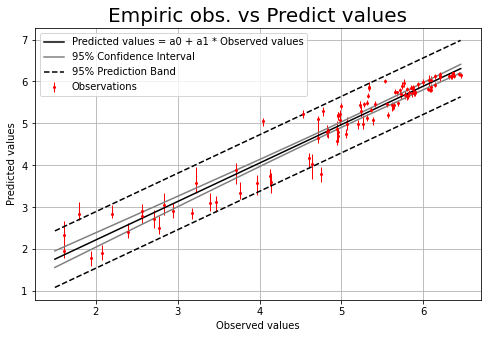

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.271, median - 0.278, CI - [0.232-0.313]

SHAP-values for: contr_g_MAX: mean - 0.036, median - 0.036, CI - [0.023-0.049]

SHAP-values for: g_MAX: mean - 0.013, median - 0.013, CI - [0.001-0.024]

SHAP-values for: mf_chm_MAX: mean - 0.449, median - 0.449, CI - [0.395-0.5]

SHAP-values for: mf_chm_MEAN: mean - 0.376, median - 0.383, CI - [0.345-0.413]



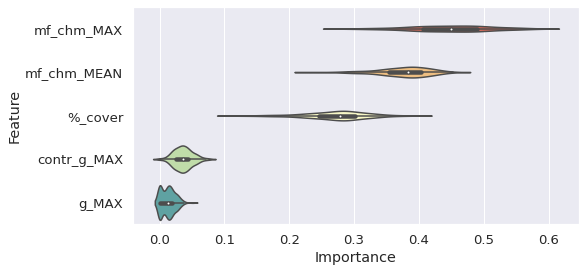

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['mf_chm_MAX', 'mf_chm_MEAN', '%_cover', 'contr_g_MAX', 'g_MAX'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 28.615, median: 22.0,
 pred. interval (P(0.025)-P(0.975)): 10.0-69.025, 
 conf. interval (p-value=0.95): 14.775-42.771 
***
Aggregate bias statistic: 
 mean: -0.028, median: -0.027,
 pred. interval (P(0.025)-P(0.975)): -0.164-0.096, 
 conf. interval (p-value=0.95): -0.086-0.035 
***
Aggregate RMSE statistic: 
 mean: 0.35, median: 0.339, pred. interval (P(0.025)-P(0.975)): 0.215-0.542, 
 conf. interval (p-value=0.95): 0.284-0.404 
***
Aggregate MSE statistic: 
 mean: 0.13, median: 0.115, pred. interval (P(0.025)-P(0.975)): 0.046-0.293, 
 conf. interval (p-value=0.95): 0.081-0.164 
***
Aggregate R^2 statistic: 
 mean: 0.906, median: 0.918, pred. interval (P(0.025)-P(0.975)): 0.79-0.967, 
 conf. interval (p-value=0.95): 0.869-0.948 
***
Aggregate bias(%) statistic: 
 mean: -0.548, median: -0.567, pred. interval (P(0.025)-P(0.975)): -3.287-2.036, 
 conf. interval (p-value=0.95): -1.687-

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

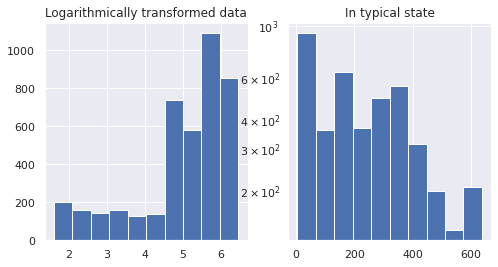

In [29]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [30]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [1, 2, 3, 4, 5, 6])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 10, 50, 100, 200, 600])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

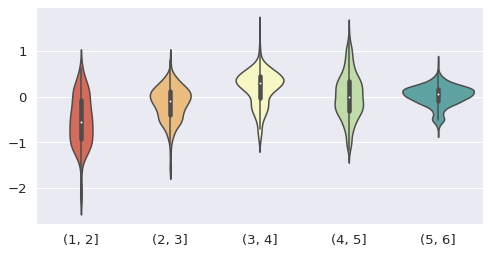

In [31]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

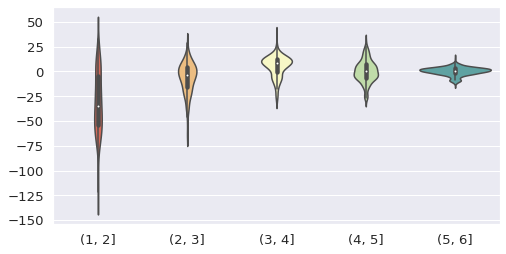

In [32]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

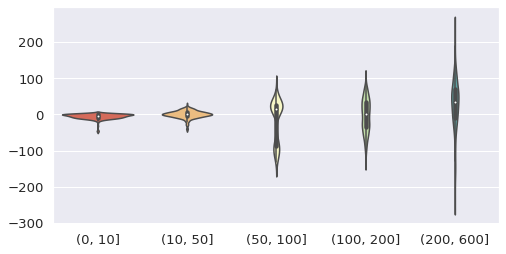

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

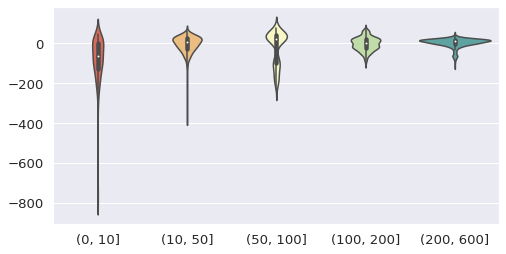

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [35]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [36]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [37]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:3.40132
[1]	validation_0-rmse:2.49907
[2]	validation_0-rmse:1.84627
[3]	validation_0-rmse:1.36786
[4]	validation_0-rmse:1.02525
[5]	validation_0-rmse:0.77382
[6]	validation_0-rmse:0.59140
[7]	validation_0-rmse:0.46549
[8]	validation_0-rmse:0.37818
[9]	validation_0-rmse:0.31413
[10]	validation_0-rmse:0.27451
[11]	validation_0-rmse:0.25605
[12]	validation_0-rmse:0.24231
[13]	validation_0-rmse:0.23154
[14]	validation_0-rmse:0.22843
[15]	validation_0-rmse:0.22655


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[16]	validation_0-rmse:0.22292
[17]	validation_0-rmse:0.21986
[18]	validation_0-rmse:0.21986
[19]	validation_0-rmse:0.21571
[20]	validation_0-rmse:0.21567
[21]	validation_0-rmse:0.21103
[22]	validation_0-rmse:0.21088
[23]	validation_0-rmse:0.20677
[24]	validation_0-rmse:0.20677
[25]	validation_0-rmse:0.20094
[26]	validation_0-rmse:0.20089
[27]	validation_0-rmse:0.20103
[28]	validation_0-rmse:0.19939
[29]	validation_0-rmse:0.19939
[30]	validation_0-rmse:0.19933
[31]	validation_0-rmse:0.19929
[32]	validation_0-rmse:0.19928
[33]	validation_0-rmse:0.19926
[34]	validation_0-rmse:0.19930
[35]	validation_0-rmse:0.19929
[36]	validation_0-rmse:0.19928
[37]	validation_0-rmse:0.19931
[38]	validation_0-rmse:0.19935
[39]	validation_0-rmse:0.19928
[40]	validation_0-rmse:0.19930
[41]	validation_0-rmse:0.19928
[42]	validation_0-rmse:0.19926
[43]	validation_0-rmse:0.19936
[44]	validation_0-rmse:0.19942
[45]	validation_0-rmse:0.19597
[46]	validation_0-rmse:0.19590
[47]	validation_0-rmse:0.19602
[48]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [38]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 75


In [39]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

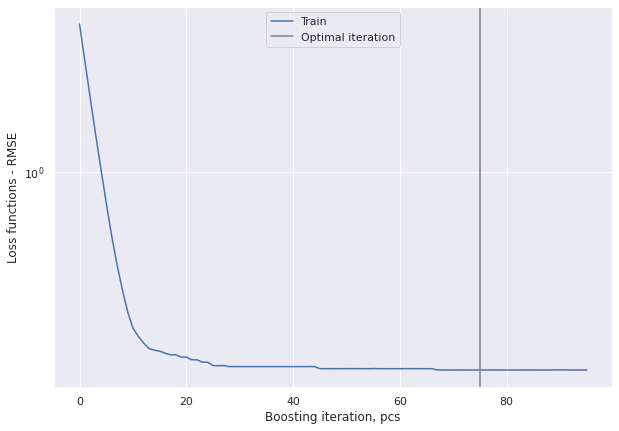

In [40]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [41]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.00
RMSE: 0.2
Relative RMSE(%):  3.890
MSE: 0.0
R square: 97.6%


In [42]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.977
Uncertainty
a0: 0.21+/-0.08
a1: 0.958+/-0.015


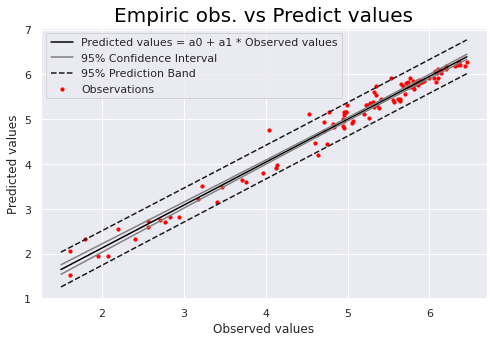

In [43]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

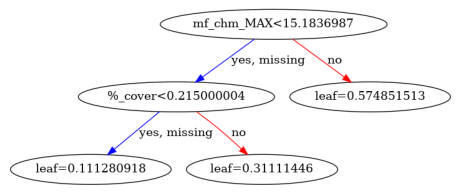

In [44]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

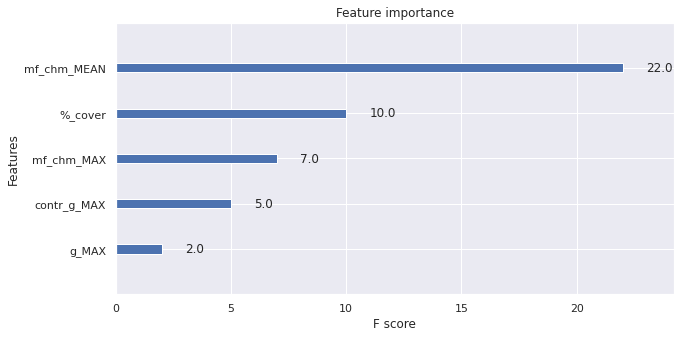

In [46]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

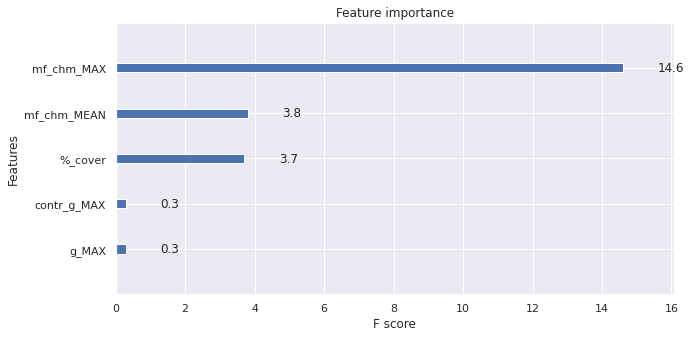

In [47]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

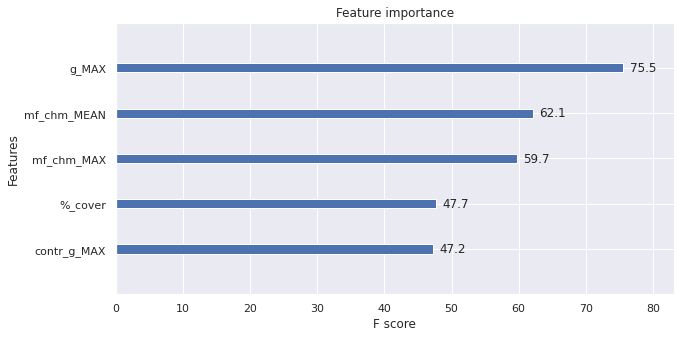

In [48]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [49]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


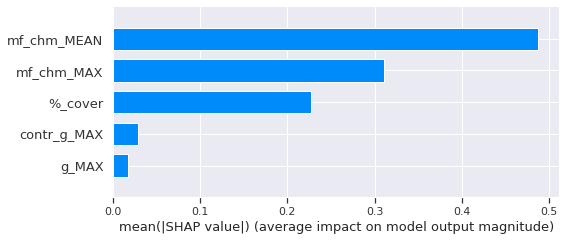

In [50]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

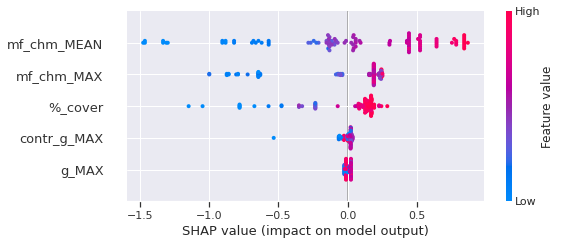

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

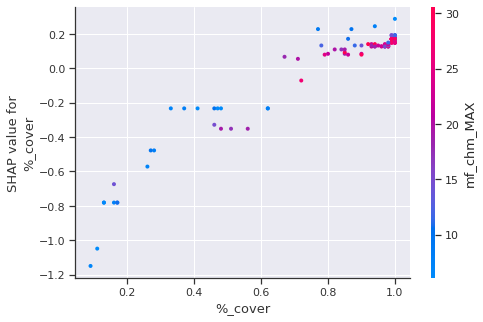

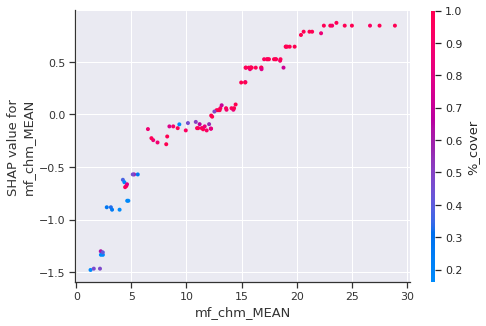

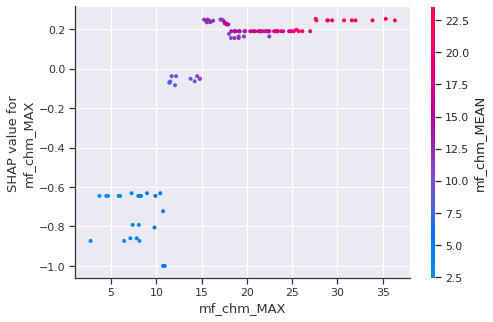

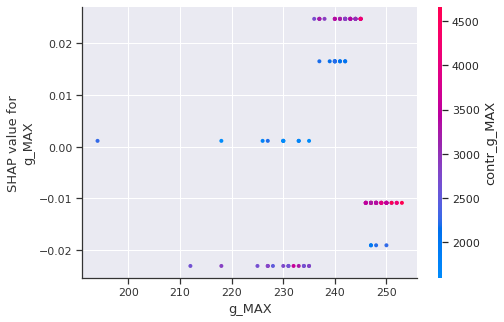

invalid value encountered in true_divide
invalid value encountered in true_divide


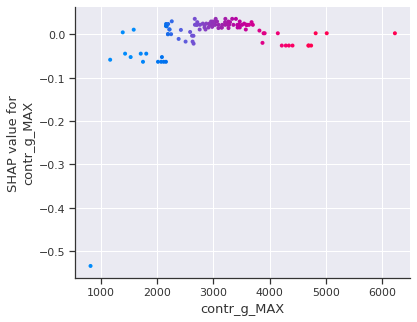

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [53]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/01_LN_GS_CHM_with_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/01_LN_GS_CHM_with_RGB_XGB_model.txt")